# Footnote Visualizations

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
# Import library
from scipy import stats
from scipy.stats import spearmanr, pearsonr, linregress
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import Rbeast as rb 
import piecewise_regression

footnotes_df = pd.read_csv('../../Footnote article/Data Manifests/ECCOFictionTXTLab.csv', encoding='utf-8', parse_dates=True)
#footnotes_df = pd.read_csv('../../../../Dropbox/Footnote article/Data Manifests/ECCOFictionTXTLab.csv', encoding='utf-8', parse_dates=True)

## Table of Contents:
    
1. [Visualizations of ECCOFictionTXTLab.csv (without annotations)](#1.-Visualizations-of-ECCOFictionTXTLab.csv-without-annotations)
    - [Stats on the ECCO corpus](#Stats-on-the-ECCO-corpus)
    - [Genre terms in the main ECCO corpus](#Genre-terms-in-the-ECCO-Corpus-Titles)
2. [One Footnote Subset](#2.-One-Footnote-Subset)
    - [Evaluation of model performance by decade and date](#Evaluation-of-model-performance-by-decade-and-date)
    - [Genre terms in the One Footnote corpus](#Genre-terms-in-the-One-Footnote-Corpus-Titles)
    - [Comparison of genre composition in ECCO corpus vs One Footnote Corpus](#Comparing-Genre-Composition-of-One-Footnote-Corpus-with-ECCO-Corpus)
3. [One Footnote Subset, with tags](#3.-One-Footnote-Subset,-with-tags)
    - [Model metrics: tagged one-footnote subset](#Model-metrics:-tagged-one-footnote-subset)
    - [Visualization of the number of footnoted and unfootnoted pages for each tag](#Visualization-of-the-number-of-footnoted-and-unfootnoted-pages-for-each-tag)
    - [Plot the counts of each combination of tags in our dataset](#Plot-the-counts-of-each-combination-of-tags-in-our-dataset)
    - [Stats on our tagged one-footnote dataset](#Stats-on-our-tagged-one-footnote-dataset)
    - [Analysis of tags and clusters of tags](#Analysis-of-tags-and-clusters-of-tags)
        - [Contextual Footnotes](#Contextual-Footnotes)
        - [Translation Footnotes](#Translation-Footnotes)
        - [Intertextual Footnotes](#Intertextual-Footnotes)
        - [Intratextual Footnotes](#Intratextual-Footnotes)
        - [Metatextual Footnotes](#Metatextual-Footnotes)
            - [Genre breakdown across footnote types](#Genre-breakdown-across-footnote-types)
        - [Multi-tagged pages](#Multi-tagged-pages)
            - [Plot of all tag combinations](#Plot-the-counts-of-each-combination-of-tags-in-our-dataset)
            - [Plot of top 25 tag combinations in multi- and double-tagged footnotes](#Top-25-Tag-Combinations-for-multiple-tags-and-double-tagged-footnotes)
    - [Decade-by-decade breakdown of tags](#Decade-by-decade-breakdown-of-tags)
    - [Decade-level analysis of all tags](#Decade-level-analysis)
    - [Visualizations of where single footnotes appear in our one-footnote dataset](#Visualizations-of-where-single-footnotes-appear-in-our-one-footnote-dataset)
        - [Statistical tests](#Statistical-comparison-of-volume-distribution-in-one-footnote-subset-with-footnotes-not-in-one-footnote-subset)
4. [Footnote positions in END data](#Footnote-positions-in-END-data)
    - [Where are footnotes positioned within volumes?](#Where-are-footnotes-positioned-within-volumes?)
    - [Locations of footnotes within END volumes](#Locations-of-footnotes-within-END-volumes)
    - [Top 25 locations for footnotes in END volumes](#Top-25-locations-for-footnotes-in-END-volumes)
    - [Plotting locations for footnotes in END volumes, binning by 10](#Plotting-locations-for-footnotes-in-END-volumes,-binning-by-10)

## 1. Visualizations of ECCOFictionTXTLab.csv without annotations
This first section of visualizations aim to give an overview of our dataset as a whole. As such, they use only the ECCOFictionTXTLab.csv.

The footnote-detection models were run on an an initial corpus of 8607 volumes of fiction comprising 5686 works of fiction (8607 documents, 5685 ESTC_ids.)  See list in ECCOFictionTXTLab.csv. These works were identifed in ECCO using a classifier built by txtLab collaborators based on the Stanford/Mark Algee-Hewitt list of 1579 works of fiction in ECCO.

### Data Dictionary

`Filename`: name of XML file for volume  	
`DocumentID`: ECCO identifier 	
`ESTC_ID`: EST identifier 	
`Date`: Date of publication 	
`Title`: Title of work 	
`Vol_Number`: Volume number 	
`Author` : Author Name	
`Imprint` : Publication imprint information	
`Field_Headings` : ECCO subject headings 	
`fn_pages`: number of pages with footnotes predicted by the model's four machine learning and classification algorithms
`nofn_pages`: number of pages with no footnotes predicted by the model's four machine learning and classification algorithms 	
`TableName`: Name of metadata table 	
`fn.percent`: percentage of pages with footnotes predicted 	


In [7]:
# Let's look at the first 5 rows of ECCOFictionTXTLab.csv data
footnotes_df.head(5)

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           1  0003900900.xml     3900900  T110586  1753   
1           2  0004700401.xml     4700401  T125094  1748   
2           3  0004700402.xml     4700402  T125094  1748   
3           4  0004700403.xml     4700403  T125094  1748   
4           5  0007901400.xml     7901400  T069692  1782   

                                               Title Vol_Number  \
0  Memoires secrets pour servir <c3><a0> l'histoi...          0   
1  Anecdotes de la cour de Fran<c3><a7>ois I. Par...   Volume 1   
2  Anecdotes de la cour de Fran<c3><a7>ois I. Par...   Volume 2   
3  Anecdotes de la cour de Fran<c3><a7>ois I. Par...   Volume 3   
4  The history of the civil wars in Germany, from...          0   

                        Author  \
0  M. M. C. F., Ecu<c3><a8>ier   
1        Lussan, Marguerite de   
2        Lussan, Marguerite de   
3        Lussan, Marguerite de   
4                Defoe, Daniel   

                                             Imprint  \
0           London : printed for R. Jennys, [1753?].   
1  Londres [i.e. Paris?] : chez Jean Nours [sic],...   
2  Londres [i.e. Paris?] : chez Jean Nours [sic],...   
3  Londres [i.e. Paris?] : chez Jean Nours [sic],...   
4  Newark : printed by James Tomlinson, for the p...   

                                      Field_Headings  fn_pages  nofn_pages  \
0                       French fiction, 18th century         0          30   
1  France, Court and courtiers, France, History, ...         0         304   
2  France, Court and courtiers, France, History, ...         1         343   
3  France, Court and courtiers, France, History, ...         0         309   
4  Thirty Years' War, 1618-1648, Fiction, Great B...         2         379   

             TableName  fn.percent  decade  
0  Manifest_HistAndGeo    0.000000    1750  
1  Manifest_HistAndGeo    0.000000    1740  
2  Manifest_HistAndGeo    0.002907    1740  
3  Manifest_HistAndGeo    0.000000    1740  
4  Manifest_HistAndGeo    0.005249    1780

In [8]:
# Add a new column to the dataframe called "Footnotes_predicted", which will read "True" if fn_pages are not 0
footnotes_df.loc[footnotes_df['fn_pages'] > 0, 'Footnotes_predicted'] = 'True' 

In [9]:
# Fix a date error 
footnotes_df = footnotes_df.replace(to_replace=5480,
                     value=1710)
footnotes_df['Date'].max()

1809

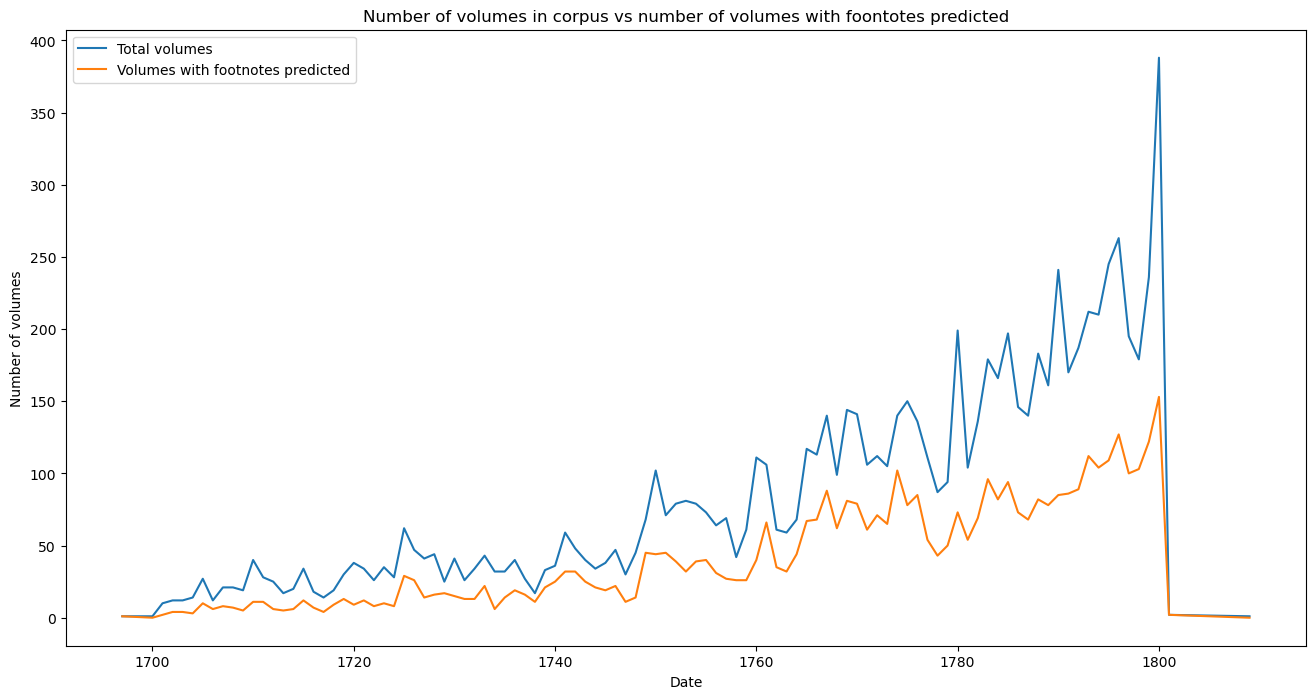

In [10]:
# Plot a time series of the total volumes in our dataset vs. the total volumes identified as having footnotes
# so that we can compare trends
footnotes_df.groupby('Date')[['DocumentID', 'Footnotes_predicted']].count().plot(title="Number of volumes in corpus vs number of volumes with foontotes predicted", figsize=(16,8))\
.set_ylabel("Number of volumes")
plt.legend(["Total volumes", "Volumes with footnotes predicted"])

### Stats on the ECCO corpus

In [11]:
print("Number of volumes in our ECCO corpus:")
footnotes_df['DocumentID'].count()

Number of volumes in our ECCO corpus:


8606

In [12]:
# Calculate the total number of volumes with footnotes present, according to the machine learning classification algorithms
print("Total number of volumes with at least one page of predicted footnotes,")
print("(according to the machine learning and classification algorithms):")
footnotes_df.Footnotes_predicted.count()

Total number of volumes with at least one page of predicted footnotes,
(according to the machine learning and classification algorithms):


4260

Text(0, 0.5, 'Number of pages')

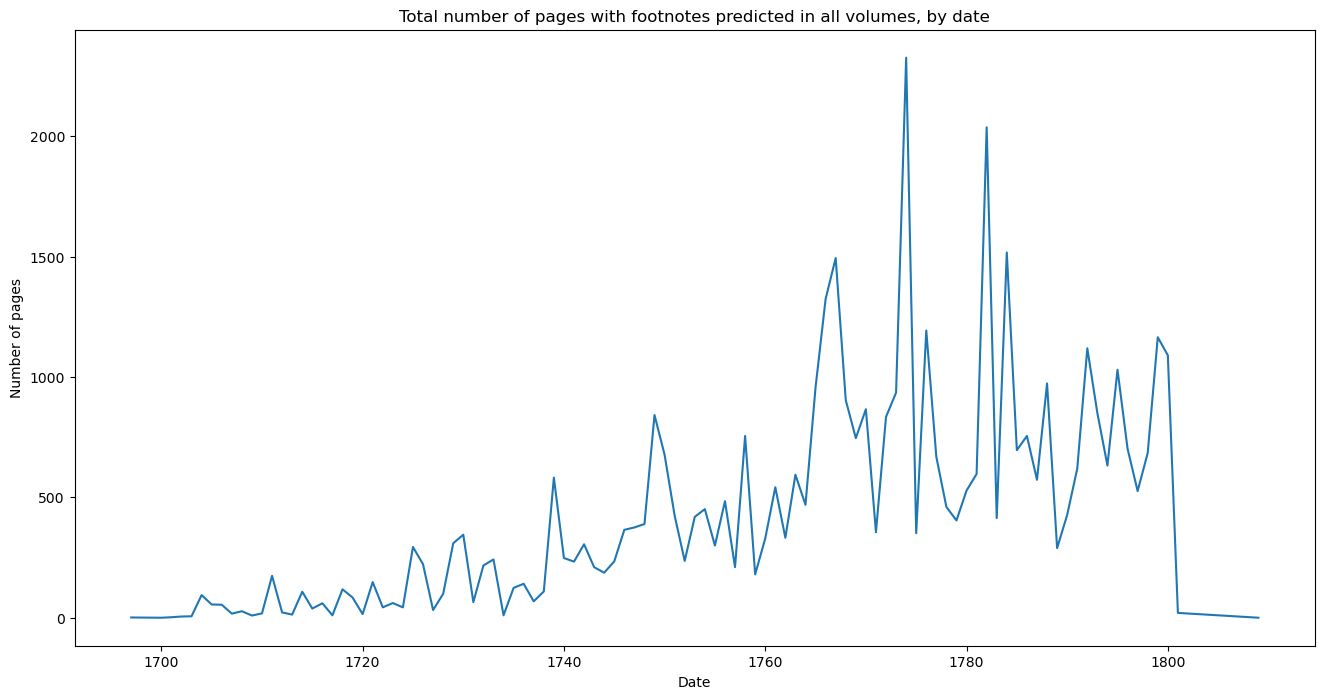

In [13]:
# Plot a time series of the total number of footnoted pages in all volumes
footnotes_df.groupby('Date')['fn_pages'].sum().plot(title="Total number of pages with footnotes predicted in all volumes, by date", figsize=(16,8)).set_ylabel("Number of pages")

Text(0, 0.5, 'Number of pages')

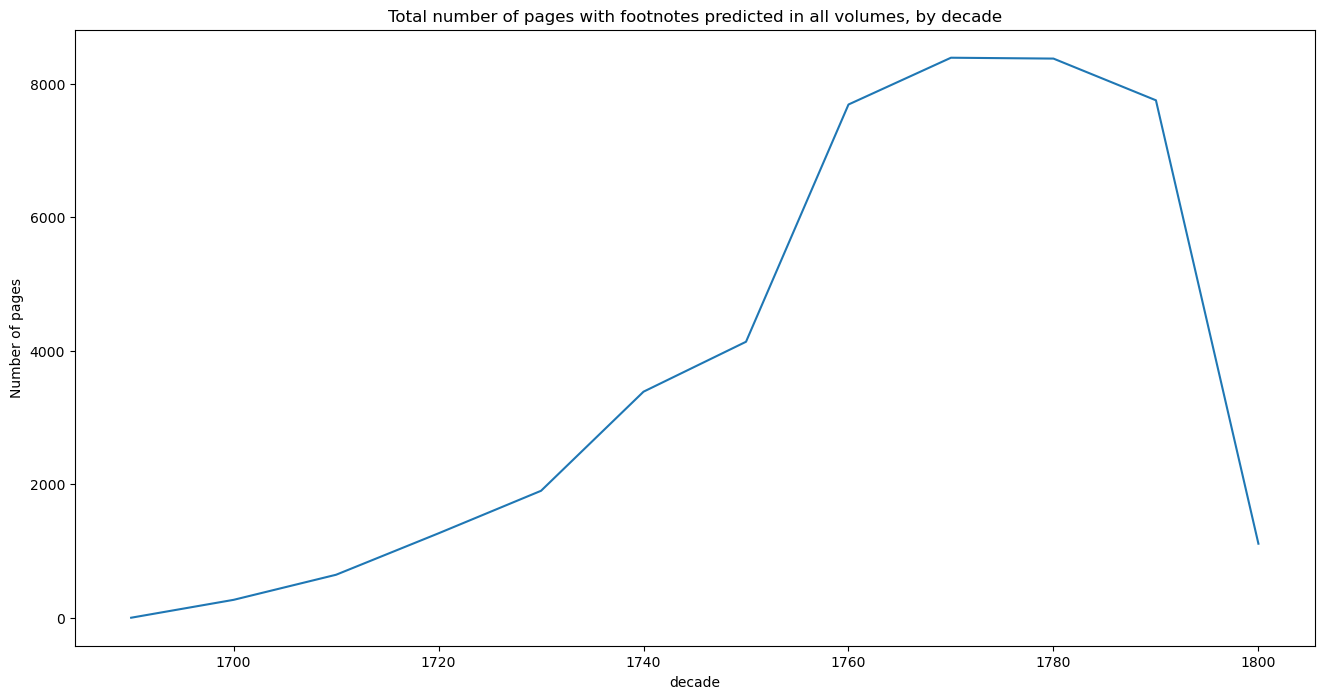

In [14]:
# Plot a time series (by decade, not year), of the total number of footnoted pages in all volumes
footnotes_df.groupby('decade')['fn_pages'].sum().plot(title="Total number of pages with footnotes predicted in all volumes, by decade", figsize=(16,8)).set_ylabel("Number of pages")

In [15]:
footnotes_df.groupby('decade')['DocumentID'].count()

decade
1690       1
1700     149
1710     245
1720     380
1730     325
1740     445
1750     721
1760    1018
1770    1182
1780    1611
1790    2138
1800     391
Name: DocumentID, dtype: int64

<Axes: xlabel='decade'>

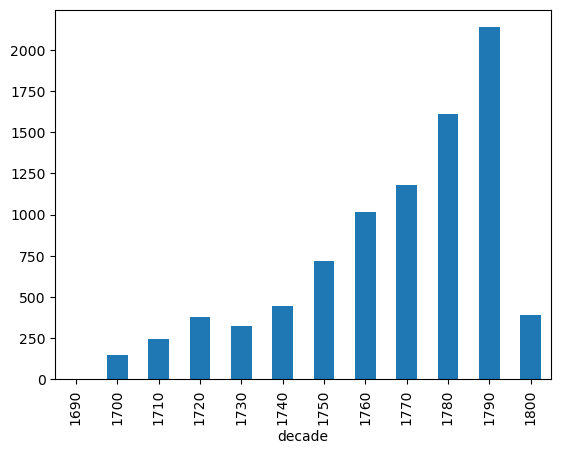

In [16]:
footnotes_df.groupby('decade')['DocumentID'].count().plot(kind='bar')

Text(0, 0.5, 'Percentage (as decimal)')

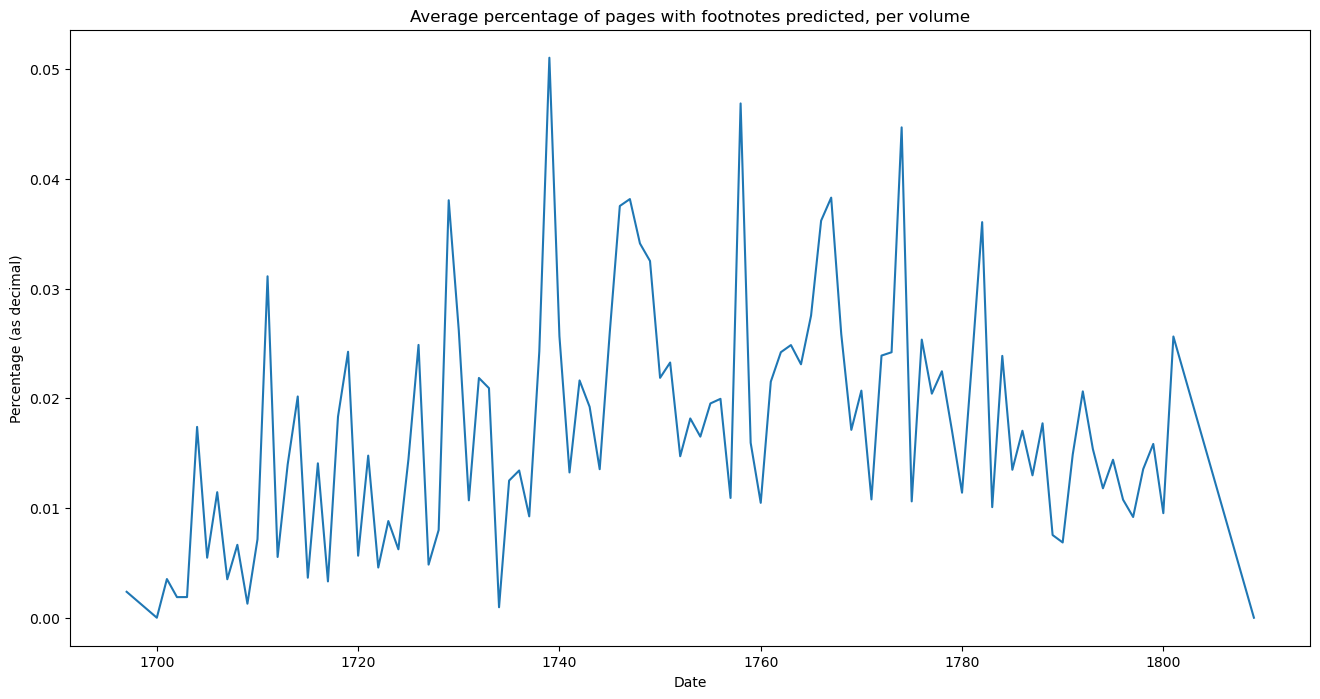

In [17]:
# Plot a time series of the average percentage of footnoted pages, per volume
footnotes_df.groupby('Date')['fn.percent'].mean().plot(title="Average percentage of pages with footnotes predicted, per volume", figsize=(16,8)).set_ylabel("Percentage (as decimal)")

Text(0, 0.5, 'Percentage (as decimal)')

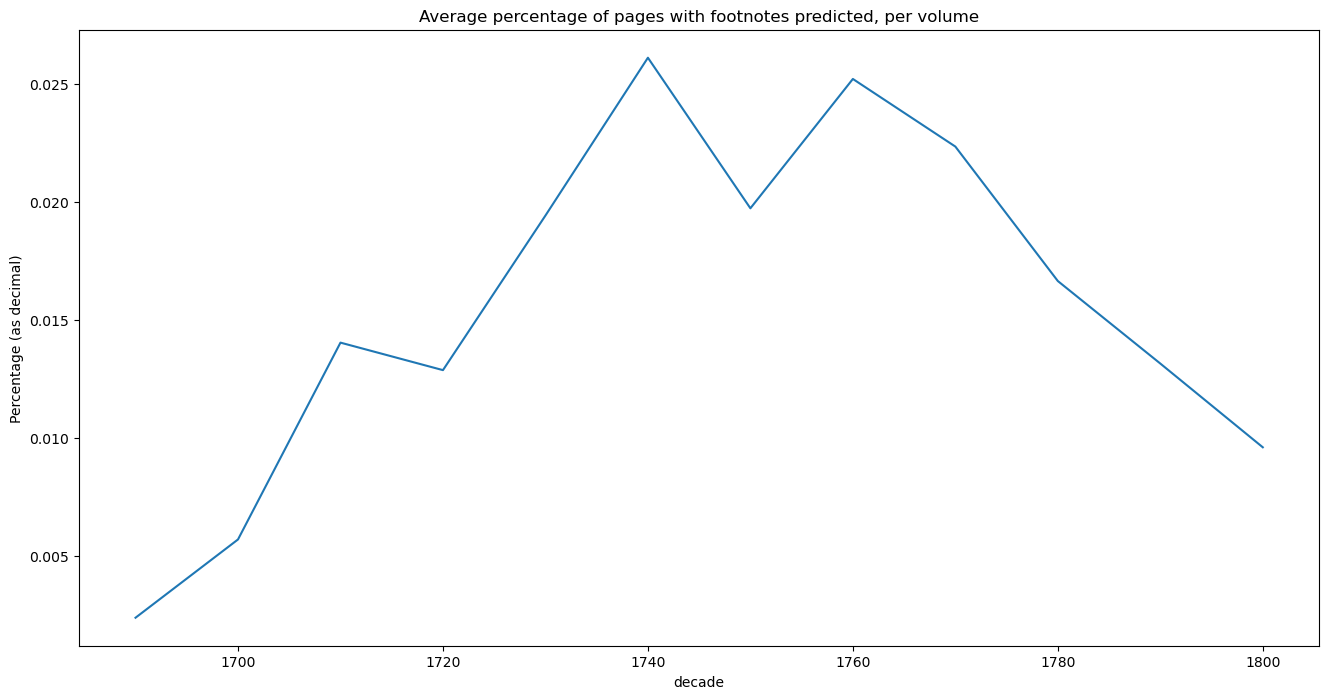

In [18]:
# Plot a time series (by decade) of the average percentage of footnoted pages, per volume
footnotes_df.groupby('decade')['fn.percent'].mean().plot(title="Average percentage of pages with footnotes predicted, per volume", figsize=(16,8)).set_ylabel("Percentage (as decimal)")

Text(0, 0.5, 'Number of volumes')

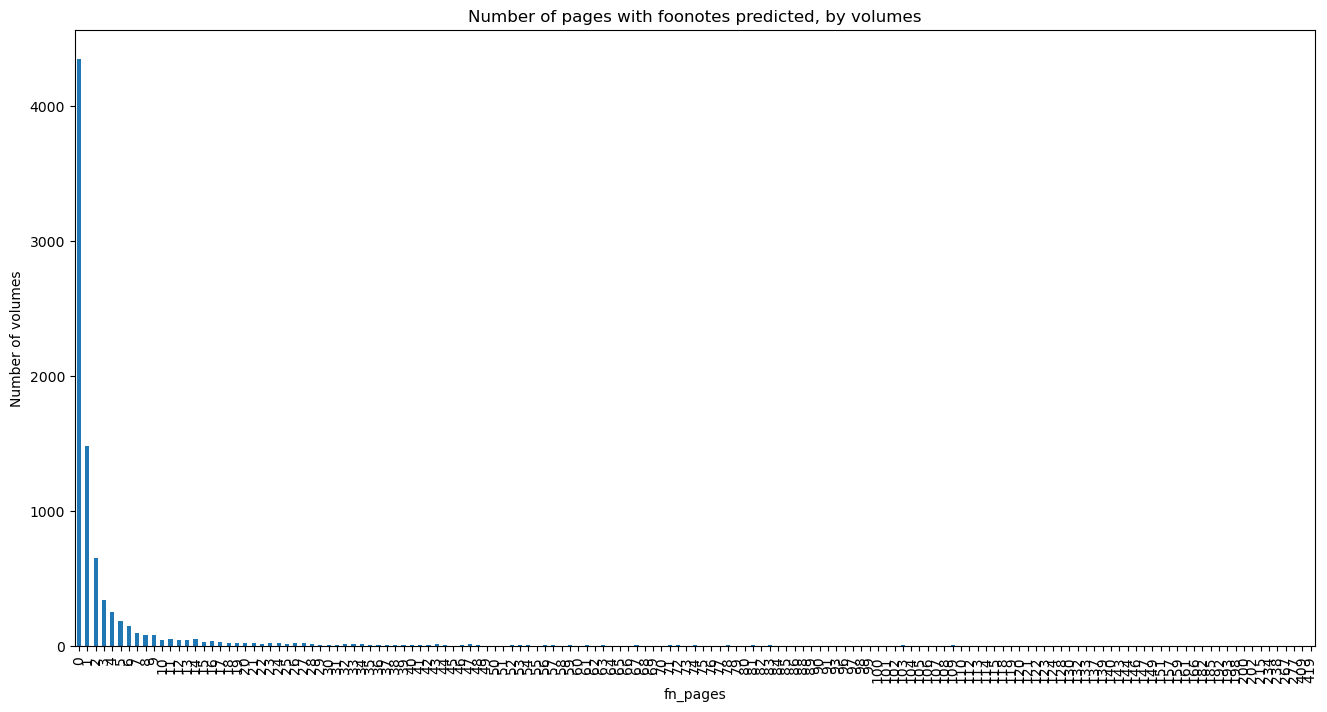

In [19]:
# Plot the number of volumes by respective number of footnoted pages
footnotes_df.groupby('fn_pages')['DocumentID'].count().plot(kind='bar', title="Number of pages with foonotes predicted, by volumes", figsize=(16,8)).set_ylabel("Number of volumes")

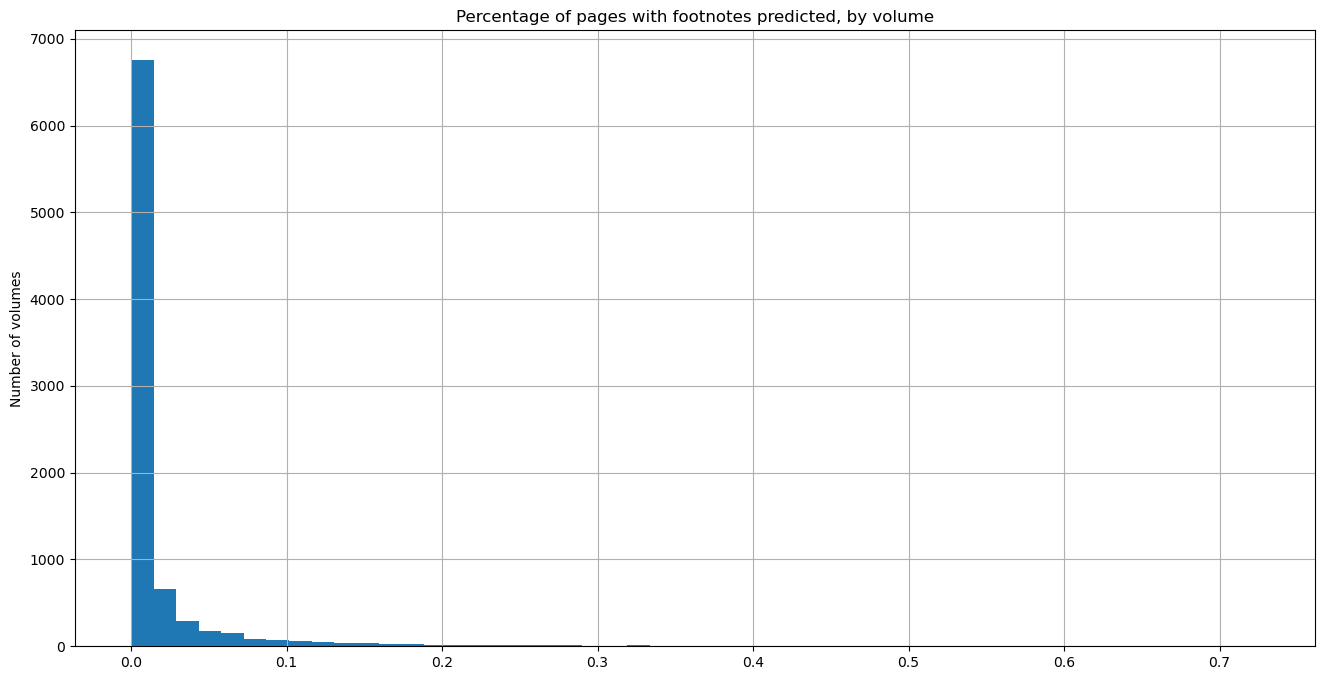

In [20]:
# Plot the number of volumes by percentage of footnoted pages (using a historgram to bin percentages)
fig, ax = plt.subplots(figsize = (6,4))
footnotes_df['fn.percent'].plot(kind = "hist", bins=50, figsize=(16,8), \
                              title="Percentage of pages with footnotes predicted, by volume", \
                             grid=True).set_ylabel("Number of volumes")
plt.show()

Text(0, 0.5, 'Number of volumes')

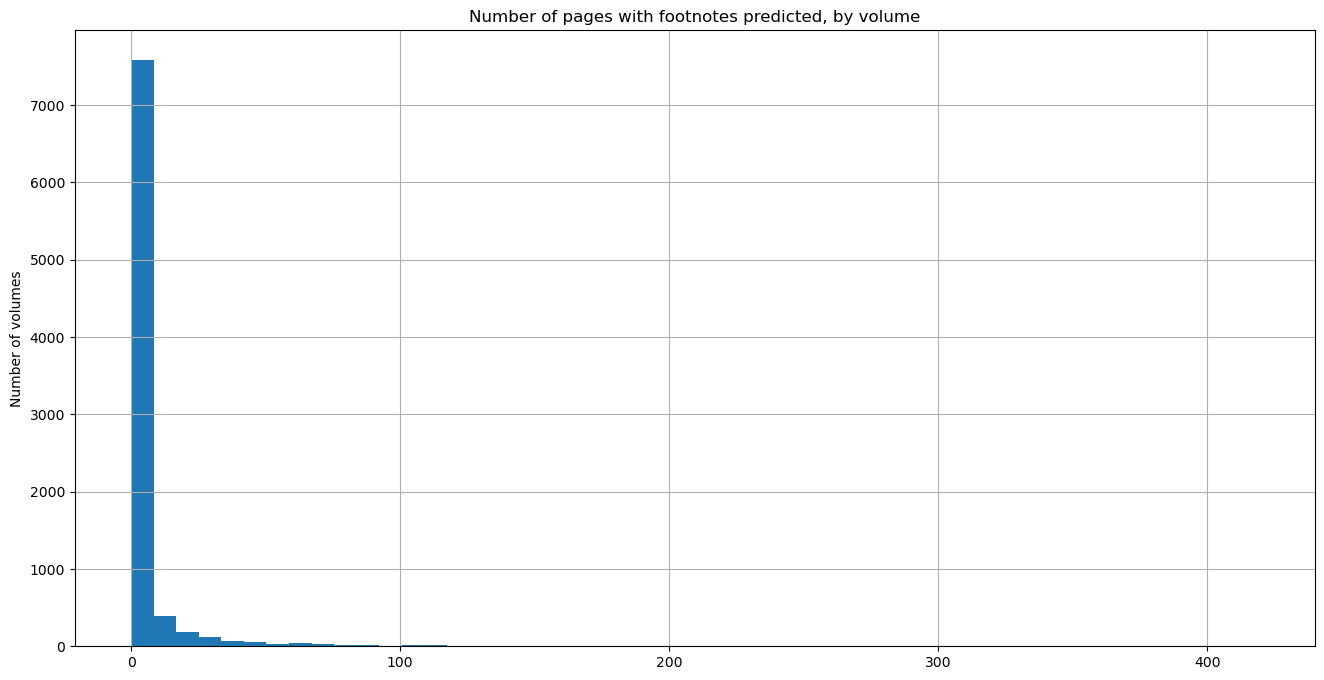

In [21]:
# Plot the number of volumes by number of footnoted pages (using a historgram to bin the number)
footnotes_df['fn_pages'].plot(kind='hist', bins=50, figsize=(16,8), \
                              title="Number of pages with footnotes predicted, by volume", \
                             grid=True).set_ylabel("Number of volumes")


In [22]:
# Write a function to identify only the rows with footnotes present
def just_footnotes(row):
  if row['fn_pages'] > 0:
    return row['fn_pages']
  else:
    return ''

# Use our function to add a new column to our dataframew with just the rows with foonotes
footnotes_df['just_footnotes'] = footnotes_df.apply(just_footnotes, axis=1)

In [23]:
footnotes_df[['just_footnotes']] = footnotes_df[['just_footnotes']].apply(pd.to_numeric)  

In [24]:
footnotes_df['just_footnotes'].dtype

dtype('float64')

Text(0, 0.5, 'Number of volumes')

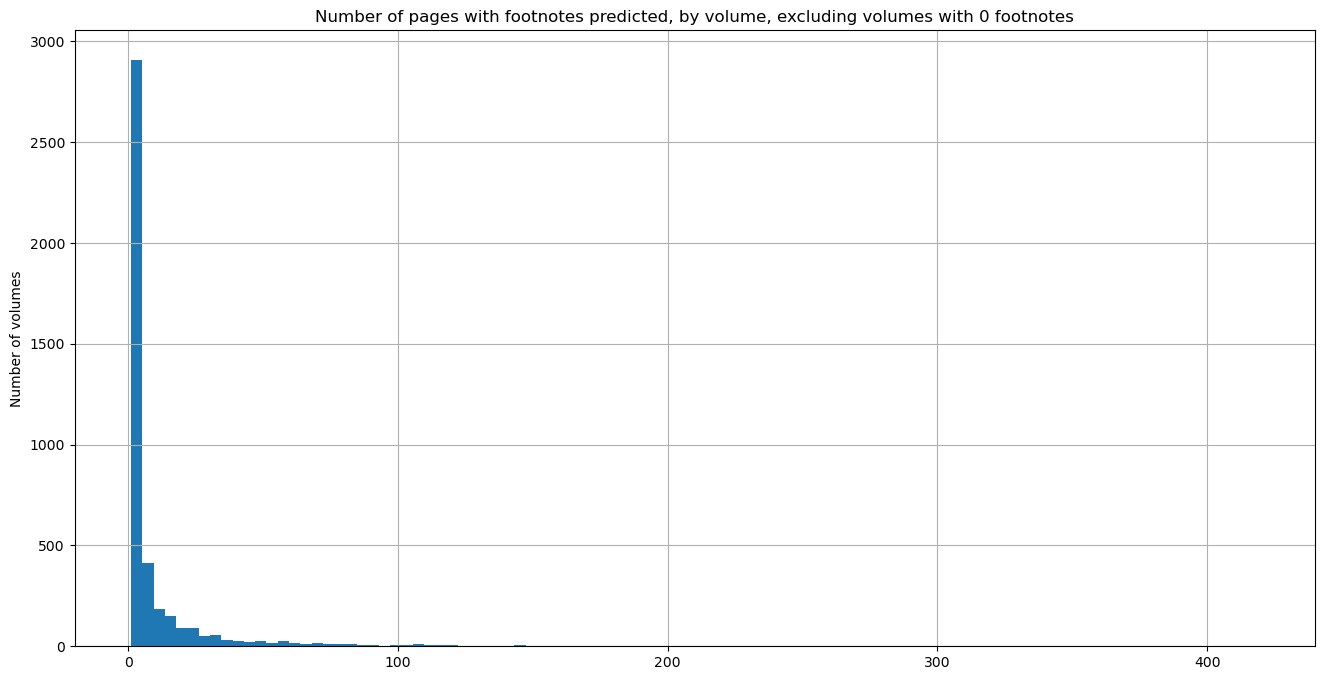

In [25]:
# Using the new column we created
# Plot the distribution of footnoted pages in volumes with footnotes present
footnotes_df['just_footnotes'].plot(kind='hist', bins=100, figsize=(16,8), \
                              title="Number of pages with footnotes predicted, by volume, excluding volumes with 0 footnotes", \
                             grid=True).set_ylabel("Number of volumes")


Text(0.04, 0.5, 'common Y')

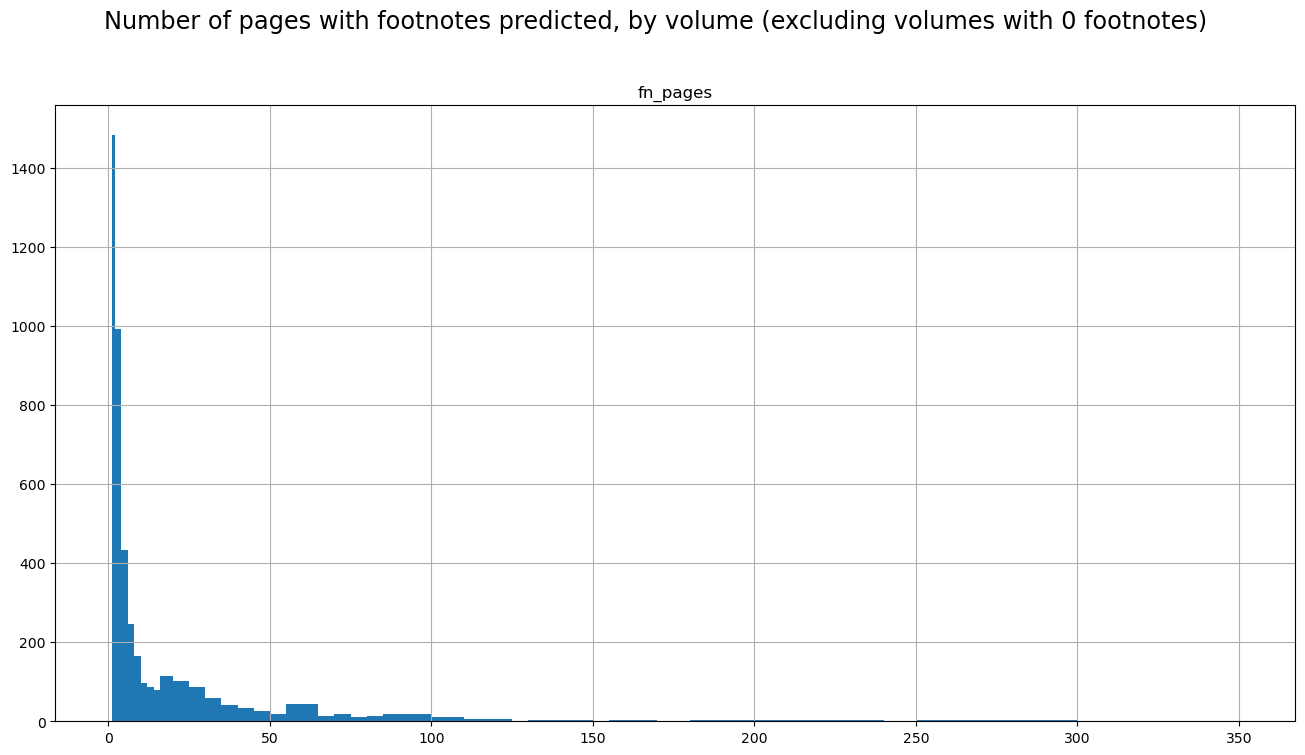

In [26]:
footnotes_df.hist('fn_pages', bins=[1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 75, 80, 85, 100, 105,  110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 170, 180, 190, 200, 220, 240, 250, 300, 350], figsize=(16,8))
plt.suptitle('Number of pages with footnotes predicted, by volume (excluding volumes with 0 footnotes)', x=0.5, y=1.0, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

In [27]:
mean_number_of_pages = np.mean(footnotes_df['fn_pages'])
mean_number_of_pages

5.221240994654892

In [28]:
median_number_of_pages = np.nanmedian(footnotes_df['fn_pages'])
median_number_of_pages

0.0

In [29]:
median_number_of_pages_excluding_0 = np.nanmedian(footnotes_df['just_footnotes'])
median_number_of_pages_excluding_0

2.0

In [30]:
mean_percent_of_pages = np.mean(footnotes_df['fn.percent'])
mean_percent_of_pages

0.017668493307886692

In [31]:
median_percent_of_pages = np.nanmedian(footnotes_df['fn.percent'])
median_percent_of_pages

0.0

In [32]:
mode = stats.mode(footnotes_df['fn_pages'])
print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 0 with a count of 4346


/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_16398/271863990.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(footnotes_df['fn_pages'])


#### Footnote percentage breakdown

In [33]:
# Let's look at the footnote percentage breakdown
footnote_percentages = []
for footnote_percentage in footnotes_df['fn.percent']:
    if footnote_percentage == 0:
        footnote_percentages.append("0% footnotes")
    elif type(footnote_percentage) == float:
        if 0.001 > footnote_percentage > 0:
             footnote_percentages.append("0-0.1% footnotes")
        elif 0.006 > footnote_percentage >= 0.001:
            footnote_percentages.append("0.1-0.6% footnotes")
        elif 0.10 > footnote_percentage >= 0.006:
            footnote_percentages.append("0.6-10% footnotes")
        elif 0.25 > footnote_percentage >= 0.10:
            footnote_percentages.append("10-25% footnotes")
        elif footnote_percentage >= 0.25:
            footnote_percentages.append("25+% footnotes")            
    else:
        footnote_percentages.append("0% footnotes")

In [34]:
all_footnote_percentage_sets_df = pd.DataFrame (footnote_percentages, columns = ['footnote_percentages'])
print("Footnote percentage categories in ECCO data:")
all_footnote_percentage_sets_df['footnote_percentages'].value_counts()


Footnote percentage categories in ECCO data:


0% footnotes          4346
0.6-10% footnotes     2553
0.1-0.6% footnotes    1292
10-25% footnotes       329
25+% footnotes          86
Name: footnote_percentages, dtype: int64

<Axes: title={'center': 'Footnote percentages in general dataset'}, ylabel='footnote_percentages'>

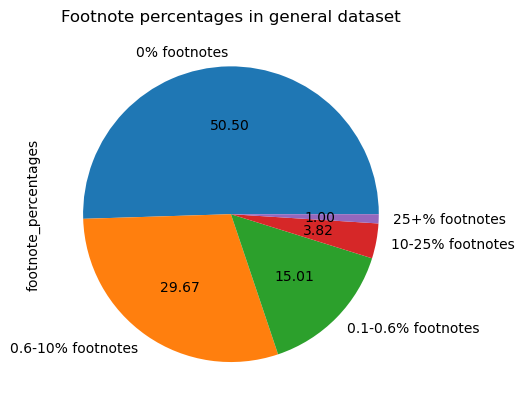

In [35]:
all_footnote_percentage_sets_df['footnote_percentages'].value_counts().plot(kind="pie", autopct='%.2f', title="Footnote percentages in general dataset")

In [36]:
#mean_number_of_pages = np.nanmean(footnotes_df['just_footnotes'])
#mean_number_of_pages

In [37]:
mean_percent_of_pages = np.nanmean(footnotes_df['fn.percent'])
mean_percent_of_pages

0.017668493307886692

In [38]:
median_percent_of_pages = np.nanmedian(footnotes_df['fn.percent'])
median_percent_of_pages

0.0


### Genre terms in the ECCO Corpus Titles
#### "Memoirs"

In [39]:
genre_term = "memoir|Memoir"
dataframe = footnotes_df
print(f"Number of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_ECCO_memoirs = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the ECCO CORPUS whose titles contain the words 'memoir|Memoir':
481
Percent of volumes in the ECCO CORPUS whose titles contain the words 'memoir|Memoir':
0.055891238670694864


#### "Letters"

In [40]:
genre_term = "letter|Letter|lettre|Lettre"
dataframe = footnotes_df
print(f"Number of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_ECCO_letters = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the ECCO CORPUS whose titles contain the words 'letter|Letter|lettre|Lettre':
1144
Percent of volumes in the ECCO CORPUS whose titles contain the words 'letter|Letter|lettre|Lettre':
0.13293051359516617


#### "Tale"

In [41]:
genre_term = "tale|Tale|recit|Recit"
dataframe = footnotes_df
print(f"Number of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_ECCO_tale = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the ECCO CORPUS whose titles contain the words 'tale|Tale|recit|Recit':
663
Percent of volumes in the ECCO CORPUS whose titles contain the words 'tale|Tale|recit|Recit':
0.0770392749244713


#### "Novel"

In [42]:
genre_term = "novel|Novel|roman|Roman"
dataframe = footnotes_df
print(f"Number of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_ECCO_novel = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the ECCO CORPUS whose titles contain the words 'novel|Novel|roman|Roman':
1046
Percent of volumes in the ECCO CORPUS whose titles contain the words 'novel|Novel|roman|Roman':
0.12154310945851732


#### "Romance"

In [43]:
genre_term = "romance|Romance"
dataframe = footnotes_df
print(f"Number of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_ECCO_romance = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the ECCO CORPUS whose titles contain the words 'romance|Romance':
157
Percent of volumes in the ECCO CORPUS whose titles contain the words 'romance|Romance':
0.018243086218917036


#### "History"

In [44]:
genre_term = "history|History|histories|Histories|histoire|Histoire"
dataframe = footnotes_df
print(f"Number of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_ECCO_history = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the ECCO CORPUS whose titles contain the words 'history|History|histories|Histories|histoire|Histoire':
1632
Percent of volumes in the ECCO CORPUS whose titles contain the words 'history|History|histories|Histories|histoire|Histoire':
0.18963513827562167


#### "Adventure"

In [45]:
genre_term = "adventure|Adventures"
dataframe = footnotes_df
print(f"Number of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the ECCO CORPUS whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_ECCO_adventure = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the ECCO CORPUS whose titles contain the words 'adventure|Adventures':
976
Percent of volumes in the ECCO CORPUS whose titles contain the words 'adventure|Adventures':
0.113409249360911


In [46]:
# Proportions of Memoirs, Letters, Tales
proportions_ECCO = [proportion_ECCO_memoirs, proportion_ECCO_letters, proportion_ECCO_tale]
proportions_ECCO

[0.055891238670694864, 0.13293051359516617, 0.0770392749244713]

In [47]:
proportions_ECCO_full = [proportion_ECCO_memoirs, proportion_ECCO_letters, proportion_ECCO_tale, \
                         proportion_ECCO_novel, proportion_ECCO_romance, proportion_ECCO_history, \
                         proportion_ECCO_adventure]
genre_titles = ["Memoirs", "Letters", "Tales", "Novel", "Romance", "History", "Adventure"]
proportions_ECCO_full= pd.DataFrame(zip(proportions_ECCO_full, genre_titles), columns = ['Proportion in Corpus', 'Genre'])
proportions_ECCO_full

Proportion in Corpus      Genre
0              0.055891    Memoirs
1              0.132931    Letters
2              0.077039      Tales
3              0.121543      Novel
4              0.018243    Romance
5              0.189635    History
6              0.113409  Adventure

## 2. One Footnote Subset

This data subset represents all volumes in ECCOFictionTXTLab.csv that contain one page with footnotes predicted. The individual page images for each of these pages was subsequently human-verified to validate the footnote prediction and count the number of footnotes present.

The subset was created from the ECCO-Footnote-Manifest-volumes-with-one-footnote.csv, using the human-verification data from researcehers. 



### Data Dictionary

`fn_pages`: number of pages with footnotes predicted by the model's four machine learning and classification algorithms
`nofn_pages`: number of pages with no footnotes predicted by the model's four machine learning and classification algorithms 	
`TableName`: Name of metadata table 	
`fn.percent`: percentage of pages with footnotes predicted 	
**`footnotes_present`**: number of footnotes present (human-verified) 

In [48]:
# Create a new dataframe with the annotated footnotes
one_footnote_df = pd.read_csv('Human-Verified-ECCO-Footnote-Manifest-volumes-with-one-footnote.csv', encoding='utf-8', parse_dates=True)

In [49]:
# Let's look at the first 5 rows of our one-foonote subset
one_footnote_df.head(5)

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0        5098  0000100701.xml      100701  T134638  1779   
1        5099  0000100702.xml      100702  T134638  1779   
2        5100  0000100800.xml      100800  T112791  1788   
3         450  0000200500.xml      200500  T128705  1791   
4         453  0000200700.xml      200700  T128696  1741   

                                               Title Vol_Number  \
0  Prince Arthur: an allegorical romance. The sto...   Volume 1   
1  Prince Arthur: an allegorical romance. The sto...   Volume 2   
2  Ismene and Ismenias, a novel translated from t...          0   
3  Scelta di novelle di Giovanni Boccaccio, fatta...          0   
4  The decameron, or ten days entertainment of Bo...          0   

                      Author  \
0        Bicknell, Alexander   
1        Bicknell, Alexander   
2  Eustathius, Macrembolites   
3        Boccaccio, Giovanni   
4        Boccaccio, Giovanni   

                                             Imprint  \
0  London : printed for G. Riley; and sold by F. ...   
1  London : printed for G. Riley; and sold by F. ...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
3  In Londra : presso Francesco Wingrave, success...   
4  London : printed for R. Dodsley, at Tully's He...   

                                      Field_Headings  fn_pages  nofn_pages  \
0          Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1          Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
3                      Italian fiction, 18th century         1         306   
4   Wood-engraving, English, Specimens, 17th century         1         600   

              TableName  fn.percent  decade  footnotes_present  
0  Manifest_LitAndLang2    0.003846    1770                  1  
1  Manifest_LitAndLang2    0.003817    1770                  0  
2  Manifest_LitAndLang2    0.004717    1780                  0  
3  Manifest_LitAndLang1    0.003257    1790                  0  
4  Manifest_LitAndLang1    0.001664    1740                  2

In [50]:
one_footnote_df['footnotes_present'] = one_footnote_df['footnotes_present'].astype(int)

### Visualizing the one footnote subset 

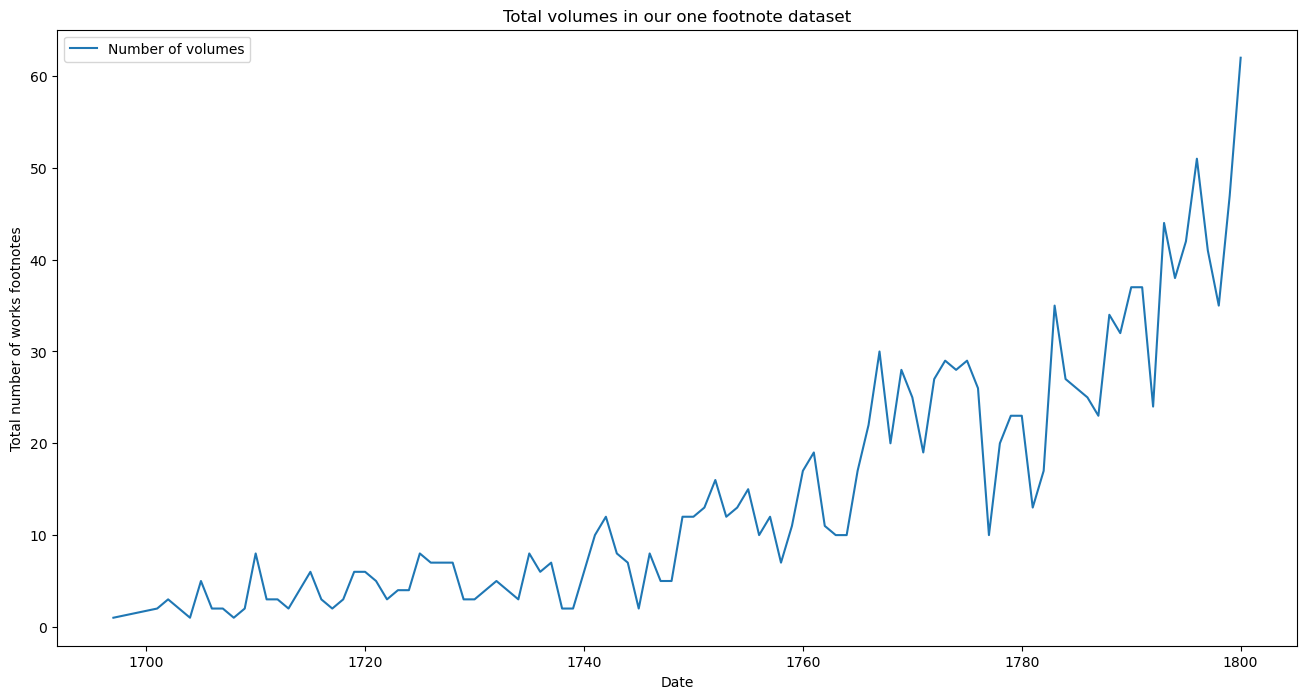

In [51]:
one_footnote_df.groupby('Date')[['footnotes_present']].count().plot(title="Total volumes in our one footnote dataset", figsize=(16,8))\
.set_ylabel("Total number of works footnotes")
plt.legend(["Number of volumes"])

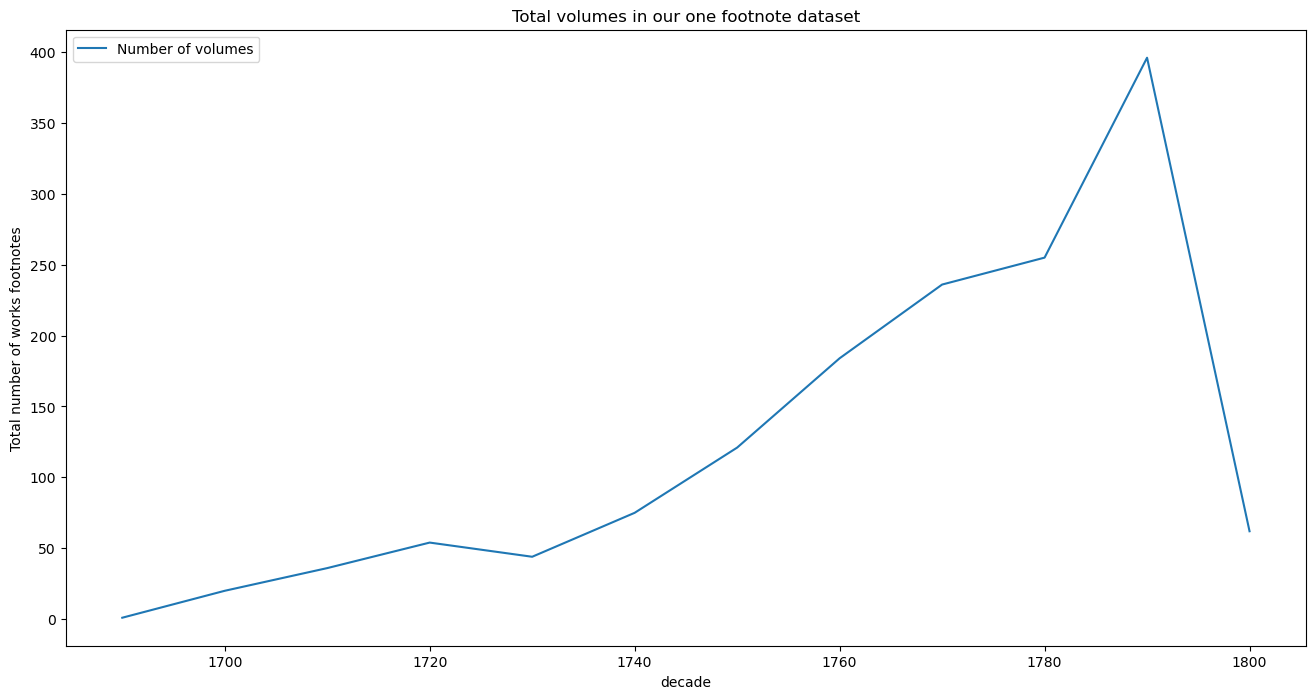

In [52]:
one_footnote_df.groupby('decade')[['footnotes_present']].count().plot(title="Total volumes in our one footnote dataset", figsize=(16,8))\
.set_ylabel("Total number of works footnotes")
plt.legend(["Number of volumes"])

Text(0, 0.5, 'Total number of works footnotes')

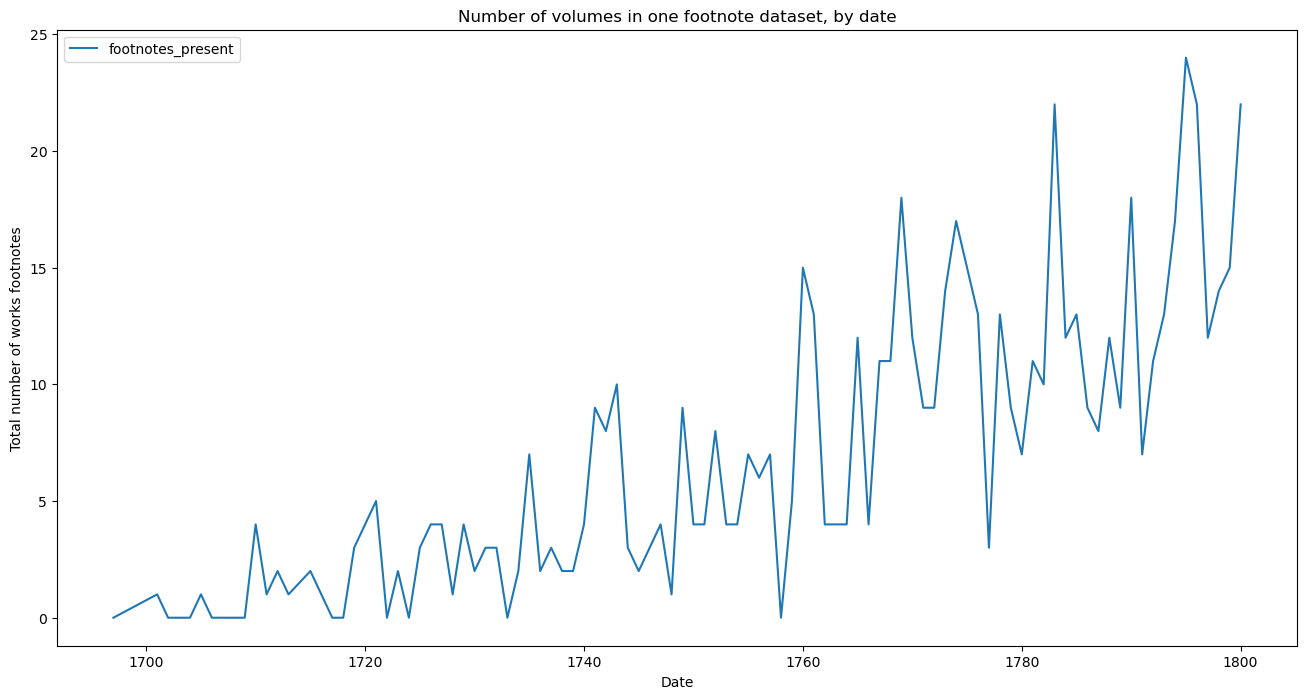

In [53]:
one_footnote_df.groupby('Date')[['footnotes_present']].sum().plot(title="Number of volumes in one footnote dataset, by date", figsize=(16,8))\
.set_ylabel("Total number of works footnotes")

Text(0, 0.5, 'Number of footnotes')

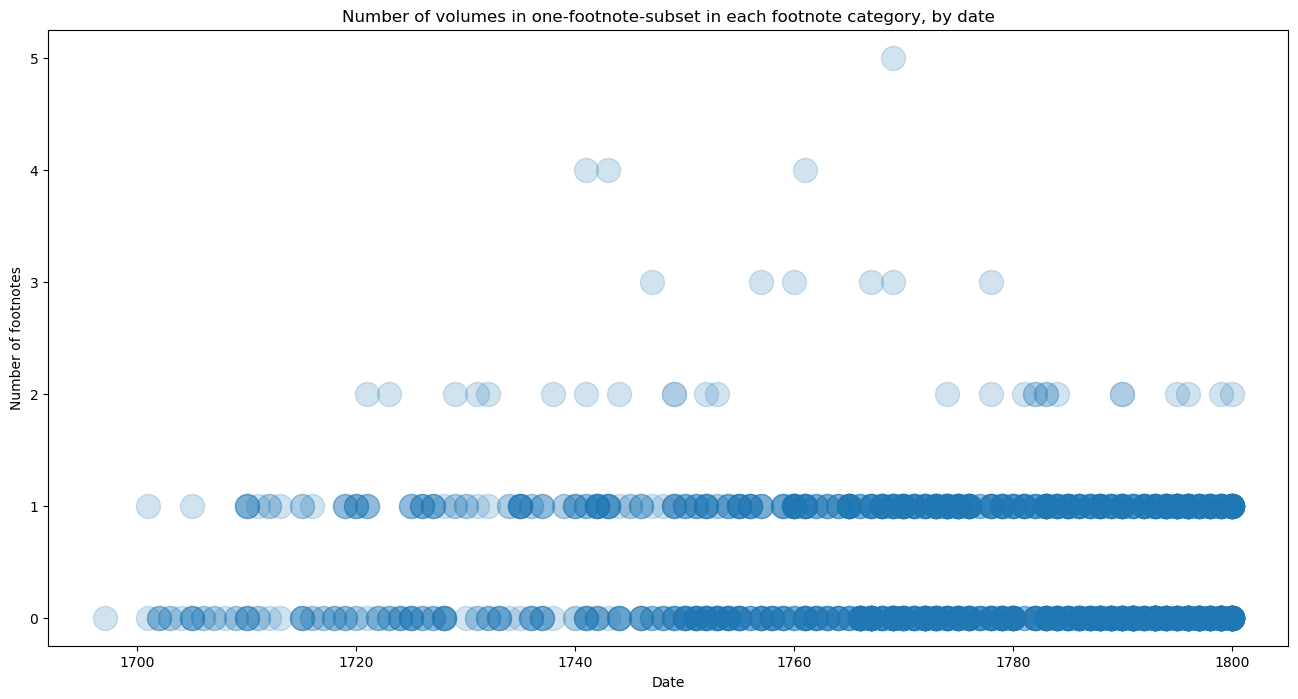

In [54]:
one_footnote_df.plot.scatter(x = 'Date', y = 'footnotes_present',  s=300, alpha=0.2, title="Number of volumes in one-footnote-subset in each footnote category, by date", figsize=(16,8)).set_ylabel("Number of footnotes")

In [55]:
one_footnote_df['fn_pages'].dtype

dtype('int64')

Text(0, 0.5, 'Number of footnotes')

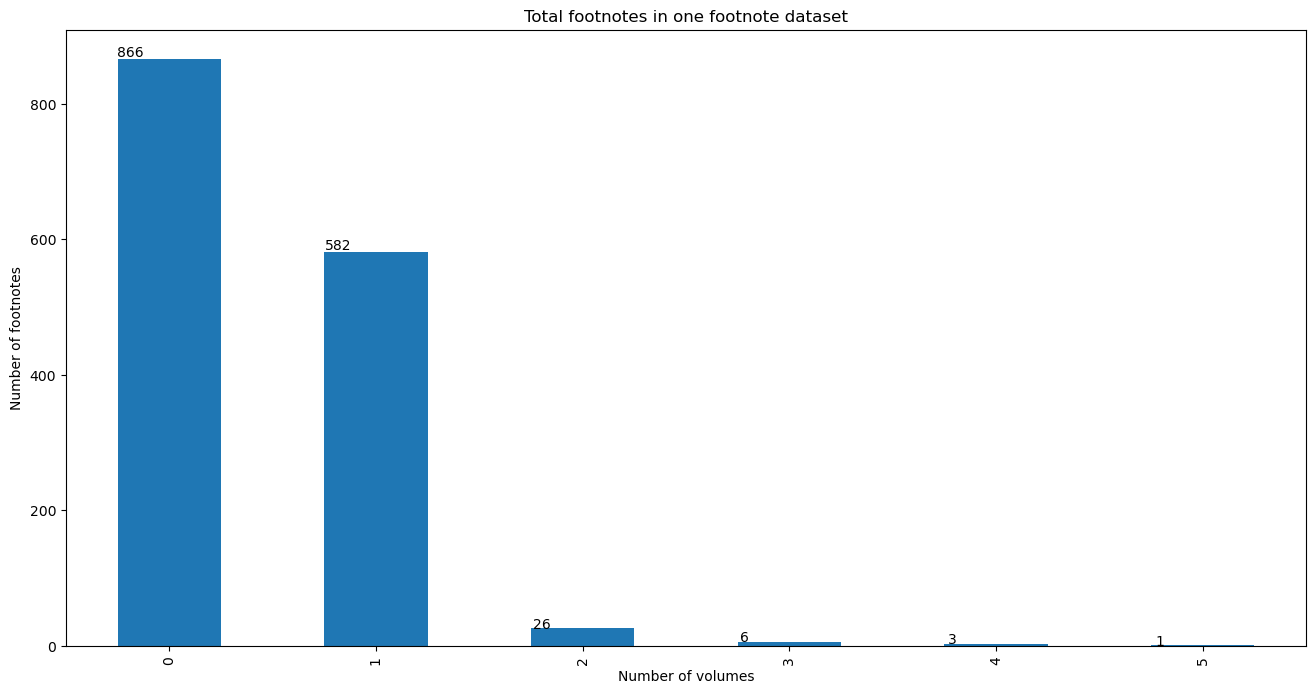

In [56]:
ax = one_footnote_df.groupby('footnotes_present')['DocumentID'].count().plot(kind='bar', title="Total footnotes in one footnote dataset", figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Number of volumes")
ax.set_ylabel("Number of footnotes")

In [57]:
footnote_percentages_in_one_footnote_set = []
for footnote_percentage in one_footnote_df['fn.percent']:
    if footnote_percentage == 0:
        footnote_percentages_in_one_footnote_set.append("0% footnotes")
    elif type(footnote_percentage) == float:
        if 0.001 > footnote_percentage > 0:
             footnote_percentages_in_one_footnote_set.append("0-0.1% footnotes")
        elif 0.006 > footnote_percentage >= 0.001:
            footnote_percentages_in_one_footnote_set.append("0.1-0.6% footnotes")
        elif 0.10 > footnote_percentage >= 0.006:
            footnote_percentages_in_one_footnote_set.append("0.6-10% footnotes")
        elif 0.25 > footnote_percentage >= 0.10:
            footnote_percentages_in_one_footnote_set.append("10-25% footnotes")
        elif footnote_percentage >= 0.25:
            footnote_percentages_in_one_footnote_set.append("25+% footnotes")            
    else:
        footnote_percentages_in_one_footnote_set.append("0% footnotes")

one_footnote_percentage_sets_df = pd.DataFrame (footnote_percentages_in_one_footnote_set, columns = ['footnote_percentages'])
print("Footnote percentage categories in one-footnote subset data:")
one_footnote_percentage_sets_df['footnote_percentages'].value_counts()

Footnote percentage categories in one-footnote subset data:


0.1-0.6% footnotes    1156
0.6-10% footnotes      320
10-25% footnotes         8
Name: footnote_percentages, dtype: int64

<Axes: title={'center': 'Breakdown of footnoted pages in one-footnote subset'}, ylabel='footnote_percentages'>

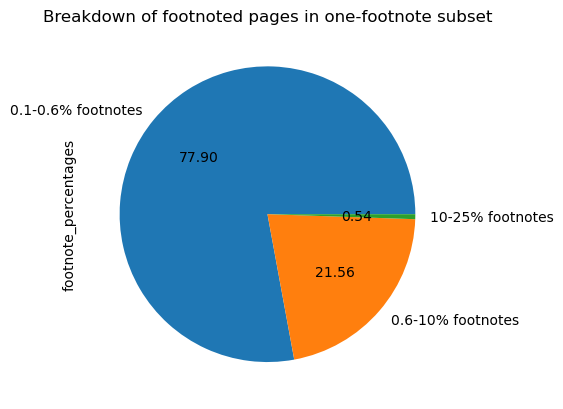

In [58]:
one_footnote_percentage_sets_df['footnote_percentages'].value_counts().plot(kind='pie', autopct='%.2f', title="Breakdown of footnoted pages in one-footnote subset",)

Text(0, 0.5, 'Categories of foonoted pages (from 0 to 5 footnotes)')

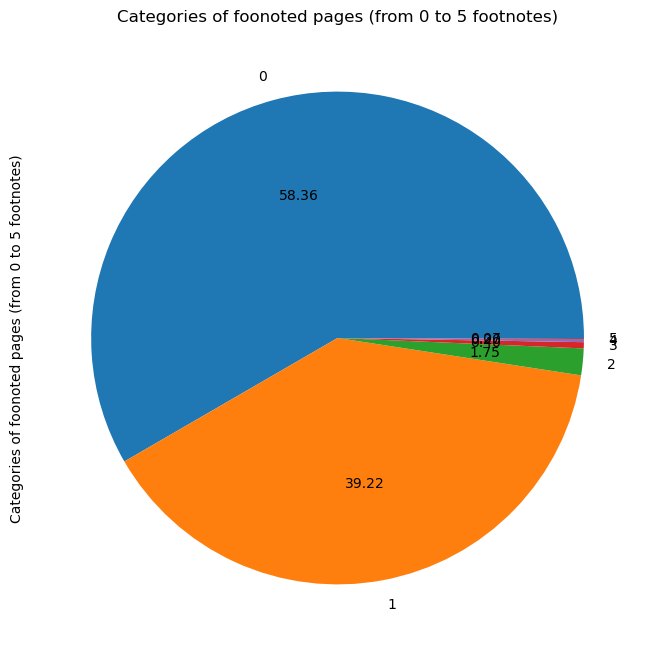

In [59]:
one_footnote_df['footnotes_present'].value_counts().plot(kind='pie',autopct='%.2f', title="Categories of foonoted pages (from 0 to 5 footnotes)", figsize=(16,8))\
.set_ylabel("Categories of foonoted pages (from 0 to 5 footnotes)")

In [60]:
#Print the number of each footnote type
one_footnote_df['footnotes_present'].value_counts()

0    866
1    582
2     26
3      6
4      3
5      1
Name: footnotes_present, dtype: int64

In [61]:
one_footnote_df['footnotes_present'].count()

1484

### Percentage of each footnote category in our one footnote dataset:

In [62]:
# Print the percentage of each footnote category in our one footnote dataset
one_footnote_df['footnotes_present'].value_counts() / one_footnote_df['footnotes_present'].count() * 100

0    58.355795
1    39.218329
2     1.752022
3     0.404313
4     0.202156
5     0.067385
Name: footnotes_present, dtype: float64

In [63]:
one_footnote_df['Title'].value_counts()

The life and opinions of Tristram Shandy, gentleman. |...                                                                                                                                                                                                                                                                                                                                                               11
A sentimental journey through France and Italy. By Mr. Yorick. ...                                                                                                                                                                                                                                                                                                                                                       8
The adventures of Roderick Random. In two volumes. ...                                                                                                                            

In [64]:
one_footnote_df.describe()

Unnamed: 0    DocumentID         Date  fn_pages   nofn_pages  \
count  1484.000000  1.484000e+03  1484.000000    1484.0  1484.000000   
mean   4058.925876  5.871330e+08  1772.935984       1.0   239.410377   
std    2501.738625  4.469581e+08    23.377850       0.0   106.881887   
min       3.000000  1.007010e+05  1697.000000       1.0     6.000000   
25%    1840.750000  3.280028e+07  1761.000000       1.0   177.000000   
50%    3931.000000  6.603501e+08  1778.000000       1.0   241.000000   
75%    6069.500000  9.898002e+08  1792.000000       1.0   302.000000   
max    8606.000000  1.294101e+09  1800.000000       1.0   776.000000   

        fn.percent       decade  footnotes_present  
count  1484.000000  1484.000000        1484.000000  
mean      0.007124  1768.463612           0.450809  
std       0.012219    23.369226           0.587237  
min       0.001287  1690.000000           0.000000  
25%       0.003300  1760.000000           0.000000  
50%       0.004132  1770.000000           0.000000  
75%       0.005618  1790.000000           1.000000  
max       0.142857  1800.000000           5.000000

In [65]:
# Slice to include only volumes with more than 1 footnote per page
many_footnotes_one_page = one_footnote_df[one_footnote_df['footnotes_present'] > 1]

Text(0, 0.5, 'Categories of foonoted pages (from 2 to 5 footnotes)')

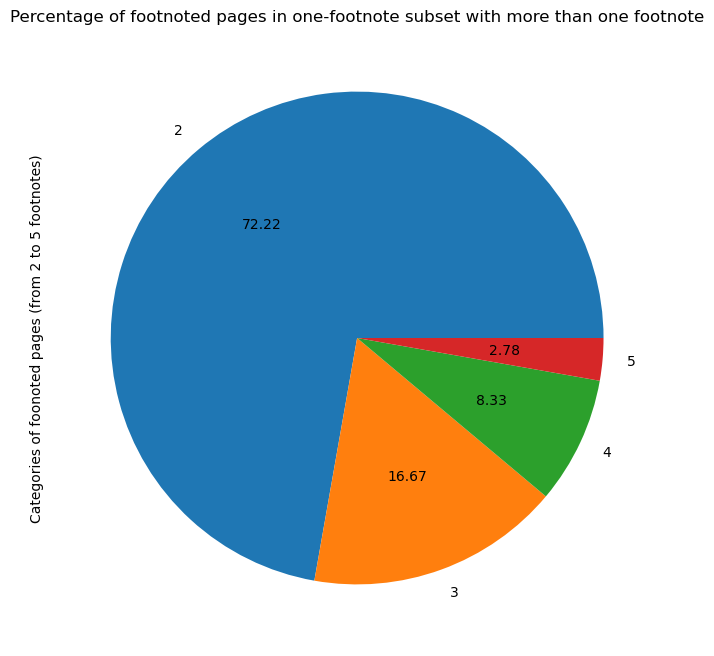

In [66]:
many_footnotes_one_page['footnotes_present'].value_counts().plot(kind='pie',autopct='%.2f', title="Percentage of footnoted pages in one-footnote subset with more than one footnote", figsize=(16,8))\
.set_ylabel("Categories of foonoted pages (from 2 to 5 footnotes)")

Text(0, 0.5, 'Number of volumes')

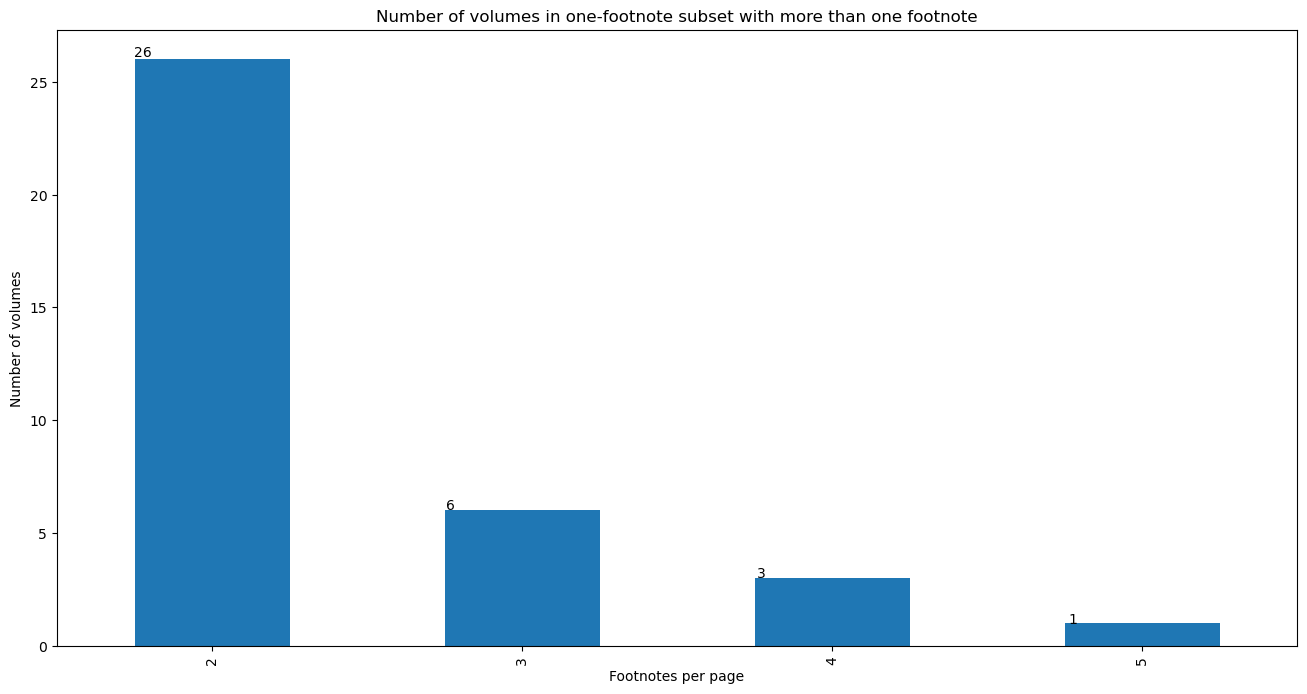

In [67]:
ax = many_footnotes_one_page['footnotes_present'].value_counts().plot(kind='bar', title="Number of volumes in one-footnote subset with more than one footnote", figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Footnotes per page")
ax.set_ylabel("Number of volumes")

In [68]:
print(one_footnote_df['Title'])

0       Prince Arthur: an allegorical romance. The sto...
1       Prince Arthur: an allegorical romance. The sto...
2       Ismene and Ismenias, a novel translated from t...
3       Scelta di novelle di Giovanni Boccaccio, fatta...
4       The decameron, or ten days entertainment of Bo...
                              ...                        
1479    The tatler. By the Right Honourable Joseph Add...
1480    Olivia; or, deserted bride. By the author of H...
1481    The fables of Ph<c3><a6>drus in Latin and Engl...
1482    The observer: being a collection of moral, lit...
1483    The guardian. In two volumes. To which is adde...
Name: Title, Length: 1484, dtype: object


### Pages misclassified by the model as having footnotes

In [69]:
miscategorized_pages = one_footnote_df[one_footnote_df['footnotes_present'] == 0]

In [70]:
miscategorized_pages.to_csv('miscategorized_pages_in_one_footnote_dataset.csv', encoding='utf-8', index=False)

In [71]:
miscategorized_pages['Title'].value_counts()[:50]

The adventures of Peregrine Pickle. In which are included, Memoirs of a lady of quality. In four volumes. ...                                                                                                                                                                                                                                                                                                                  7
The rambler. In four volumes. ...                                                                                                                                                                                                                                                                                                                                                                                              7
The spectator. ...                                                                                                                                                    

In [72]:
miscategorized_pages['Author'].value_counts()[:20]

Anon                                                        162
Smollett, Tobias George                                      29
Defoe, Daniel                                                28
Johnson, Samuel                                              22
Burney, Fanny                                                18
Haywood, Eliza Fowler                                        13
F<c3><a9>nelon, Fran<c3><a7>ois de Salignac de La Mothe-     11
Sterne, Laurence                                             10
Lady                                                         10
Richardson, Samuel                                           10
Reeve, Clara                                                  9
Bennett, Mrs. (Agnes Maria)                                   8
Steele, Richard, Sir                                          8
Fielding, Sarah                                               8
Brooke, Henry                                                 8
Fielding, Henry                         

In [73]:
miscategorized_pages_in_one_fn_set = pd.read_csv('miscategorized_pages_in_one_footnote_dataset.csv', encoding='utf-8')

In [74]:
one_footnote_miscategorized_date_dist = miscategorized_pages_in_one_fn_set['Date'].value_counts()


In [75]:
one_footnote_date_dist = one_footnote_df['Date'].value_counts()


### Genre terms in the One Footnote Corpus Titles
#### "Memoirs"

In [76]:
genre_term = "memoir|Memoir"
dataframe = one_footnote_df
corpus_name = "One-Footnote Corpus"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_memoirs = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus that contain the words 'memoir|Memoir':
97
Percent of volumes in the One-Footnote Corpus that contain the words 'memoir|Memoir':
0.06536388140161725


#### "Letters"

In [77]:
genre_term = "letter|Letter|lettre|Lettre"
dataframe = one_footnote_df
corpus_name = "One-Footnote Corpus"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_letters = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus that contain the words 'letter|Letter|lettre|Lettre':
186
Percent of volumes in the One-Footnote Corpus that contain the words 'letter|Letter|lettre|Lettre':
0.12533692722371967


#### "Tale"

In [78]:
genre_term = "tale|Tale|recit|Recit"
dataframe = one_footnote_df
corpus_name = "One-Footnote Corpus"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_tale = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus that contain the words 'tale|Tale|recit|Recit':
119
Percent of volumes in the One-Footnote Corpus that contain the words 'tale|Tale|recit|Recit':
0.08018867924528301


#### "Novel"

In [79]:
genre_term = "novel|Novel|roman|Roman"
dataframe = one_footnote_df
corpus_name = "One-Footnote Corpus"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_novel =dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus that contain the words 'novel|Novel|roman|Roman':
242
Percent of volumes in the One-Footnote Corpus that contain the words 'novel|Novel|roman|Roman':
0.16307277628032346


#### "Romance"

In [80]:
genre_term = "romance|Romance"
dataframe = one_footnote_df
corpus_name = "One-Footnote Corpus"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_romance = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus that contain the words 'romance|Romance':
40
Percent of volumes in the One-Footnote Corpus that contain the words 'romance|Romance':
0.026954177897574125


#### "History"

In [81]:
genre_term = "history|History|histories|Histories|histoire|Histoire"
dataframe = one_footnote_df
corpus_name = "One-Footnote Corpus"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_history = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus that contain the words 'history|History|histories|Histories|histoire|Histoire':
290
Percent of volumes in the One-Footnote Corpus that contain the words 'history|History|histories|Histories|histoire|Histoire':
0.1954177897574124


#### "Adventure"

In [82]:
genre_term = "adventure|Adventures"
dataframe = one_footnote_df
corpus_name = "One-Footnote Corpus"
print(f"Number of volumes in the {corpus_name} whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} whose titles contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_adventure = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus whose titles contain the words 'adventure|Adventures':
183
Percent of volumes in the One-Footnote Corpus whose titles contain the words 'adventure|Adventures':
0.12331536388140162


In [83]:
# Proportions of Memoirs, Letters, Tales
proportions_one_fn = [proportion_one_fn_memoirs, proportion_one_fn_letters, proportion_one_fn_tale]
proportions_one_fn

[0.06536388140161725, 0.12533692722371967, 0.08018867924528301]

In [84]:
proportions_one_fn_full = [proportion_one_fn_memoirs, proportion_one_fn_letters, proportion_one_fn_tale, \
                         proportion_one_fn_novel, proportion_one_fn_romance, proportion_one_fn_history, \
                         proportion_one_fn_adventure]
genre_titles = ["Memoirs", "Letters", "Tales", "Novel", "Romance", "History", "Adventure"]
proportions_one_fn_full = pd.DataFrame(zip(proportions_one_fn_full, genre_titles), columns = ['Proportion in Corpus', 'Genre'])
proportions_one_fn_full

Proportion in Corpus      Genre
0              0.065364    Memoirs
1              0.125337    Letters
2              0.080189      Tales
3              0.163073      Novel
4              0.026954    Romance
5              0.195418    History
6              0.123315  Adventure

### Comparing Genre Composition of One Footnote Corpus with ECCO Corpus


In [85]:
print("ECCO Corpus")
proportions_ECCO_full

ECCO Corpus


Proportion in Corpus      Genre
0              0.055891    Memoirs
1              0.132931    Letters
2              0.077039      Tales
3              0.121543      Novel
4              0.018243    Romance
5              0.189635    History
6              0.113409  Adventure

In [86]:
print("One Footnote Corpus")
proportions_one_fn_full

One Footnote Corpus


Proportion in Corpus      Genre
0              0.065364    Memoirs
1              0.125337    Letters
2              0.080189      Tales
3              0.163073      Novel
4              0.026954    Romance
5              0.195418    History
6              0.123315  Adventure

In [87]:
# Determine correlation coefficent (the strength of the similarity/association between the two and the p-value)
pearson_test = stats.pearsonr(proportions_ECCO_full['Proportion in Corpus'], proportions_one_fn_full['Proportion in Corpus'])
pearson_test

PearsonRResult(statistic=0.9656445215548639, pvalue=0.00041248063606768947)

In [88]:
# Test to deterime if distribitutions are statistically signifcantly different
# Null hypothesis assumes the distributions are the same, so p value of under 0.05 would indicate a difference in distribtution
stats.ks_2samp(proportions_ECCO_full['Proportion in Corpus'], proportions_one_fn_full['Proportion in Corpus'])

KstestResult(statistic=0.2857142857142857, pvalue=0.9627039627039629, statistic_location=0.12154310945851732, statistic_sign=1)


### Genre terms in the One Footnote Corpus (with footnotes)  Titles
#### "Memoirs"

In [89]:
genre_term = "memoir|Memoir"
dataframe = one_footnote_df[one_footnote_df['footnotes_present'] != 0]
corpus_name = "One-Footnote Corpus, with footnotes)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_footnoted_memoirs = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'memoir|Memoir':
30
Percent of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'memoir|Memoir':
0.04854368932038835


#### "Letters"

In [90]:
genre_term = "letter|Letter|lettre|Lettre"
dataframe = one_footnote_df[one_footnote_df['footnotes_present'] != 0]
corpus_name = "One-Footnote Corpus, with footnotes)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_footnoted_letters = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'letter|Letter|lettre|Lettre':
84
Percent of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'letter|Letter|lettre|Lettre':
0.13592233009708737


#### "Novel"

In [91]:
genre_term = "novel|Novel|roman|Roman"
dataframe = one_footnote_df[one_footnote_df['footnotes_present'] != 0]
corpus_name = "One-Footnote Corpus, with footnotes)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'novel|Novel|roman|Roman':
66
Percent of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'novel|Novel|roman|Roman':
0.10679611650485436


#### "Tale"

In [92]:
genre_term = "tale|Tale|recit|Recit"
dataframe = one_footnote_df[one_footnote_df['footnotes_present'] != 0]
corpus_name = "One-Footnote Corpus, with footnotes)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_one_fn_footnoted_tale = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'tale|Tale|recit|Recit':
54
Percent of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'tale|Tale|recit|Recit':
0.08737864077669903


#### "Romance"

In [93]:
genre_term = "romance|Romance"
dataframe = one_footnote_df[one_footnote_df['footnotes_present'] != 0]
corpus_name = "One-Footnote Corpus, with footnotes)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'romance|Romance':
18
Percent of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'romance|Romance':
0.02912621359223301


#### "History"

In [94]:
genre_term = "history|History|histories|Histories|histoire|Histoire"
dataframe = one_footnote_df[one_footnote_df['footnotes_present'] != 0]
corpus_name = "One-Footnote Corpus, with footnotes)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'history|History|histories|Histories|histoire|Histoire':
127
Percent of volumes in the One-Footnote Corpus, with footnotes) that contain the words 'history|History|histories|Histories|histoire|Histoire':
0.20550161812297735


In [95]:
# Proportions of Memoirs, Letters, Tales
proportions_one_fn_footnoted = [proportion_one_fn_footnoted_memoirs, proportion_one_fn_footnoted_letters, proportion_one_fn_footnoted_tale]
proportions_one_fn_footnoted

[0.04854368932038835, 0.13592233009708737, 0.08737864077669903]

## Evaluation of model performance by decade and date 

In [96]:
# Calcuate the proportion of footnotes in the onefootnotes
proportion_of_miscategorized_footnotes_by_date = one_footnote_miscategorized_date_dist / one_footnote_date_dist
proportion_of_miscategorized_footnotes_by_date = proportion_of_miscategorized_footnotes_by_date.reset_index()
proportion_of_miscategorized_footnotes_by_date.rename(columns = {'index':'Date', 'Date':'Proportion miscategroized'}, inplace=True)
proportion_of_miscategorized_footnotes_by_date

Date  Proportion miscategroized
0   1697                   1.000000
1   1701                   0.500000
2   1702                   1.000000
3   1703                   1.000000
4   1704                   1.000000
..   ...                        ...
95  1796                   0.588235
96  1797                   0.707317
97  1798                   0.600000
98  1799                   0.702128
99  1800                   0.661290

[100 rows x 2 columns]

### Does the model perform better for later dates in the dataset?

In [97]:
## Test if there's a correlation between the number of miscategorized footnotes and the date
## If the number is close to 1 (between 1 and 0.8), we would expect to see a strong positive correlation, ie 
# the later decades are more often misclassified. If the nubmer is between 0.6 - 0.8, moderate correation
# If the number  is between -1 and -0.8, that would mean a strong negative correlation.
proportion_of_miscategorized_footnotes_by_date.corr()

Date  Proportion miscategroized
Date                       1.000000                  -0.265123
Proportion miscategroized -0.265123                   1.000000

If the model performed better, we would expect there to be a strong negative correlation (ie, as the date goes up, the proporition of miscategorized footnotes goes down). In the case above, a Pearson's value of -0.265 is under -0.6, which tells us there's no correlation between the date and the

In [98]:
one_footnote_miscategorized_decade_dist = miscategorized_pages_in_one_fn_set['decade'].value_counts()
one_footnote_miscategorized_decade_dist

1790    248
1780    148
1770    126
1760    101
1750     76
1800     41
1740     34
1720     30
1710     22
1730     21
1700     18
1690      1
Name: decade, dtype: int64

In [99]:
one_footnote_decade_dist = one_footnote_df['decade'].value_counts()
one_footnote_decade_dist

1790    396
1780    255
1770    236
1760    184
1750    121
1740     75
1800     62
1720     54
1730     44
1710     36
1700     20
1690      1
Name: decade, dtype: int64

In [100]:
# Calcuate the proportion of footnotes in the onefootnotes
proportion_of_miscategorized_footnotes_by_decade = one_footnote_miscategorized_decade_dist / one_footnote_decade_dist
proportion_of_miscategorized_footnotes_by_decade = proportion_of_miscategorized_footnotes_by_decade.reset_index()
proportion_of_miscategorized_footnotes_by_decade.rename(columns = {'index':'decade', 'decade':'Proportion miscategroized'}, inplace=True)
proportion_of_miscategorized_footnotes_by_decade

decade  Proportion miscategroized
0     1690                   1.000000
1     1700                   0.900000
2     1710                   0.611111
3     1720                   0.555556
4     1730                   0.477273
5     1740                   0.453333
6     1750                   0.628099
7     1760                   0.548913
8     1770                   0.533898
9     1780                   0.580392
10    1790                   0.626263
11    1800                   0.661290

### Does the model perform better for later decades in the dataset?

In [101]:
proportion_of_miscategorized_footnotes_by_decade.corr()

decade  Proportion miscategroized
decade                     1.00000                   -0.47584
Proportion miscategroized -0.47584                    1.00000

In [102]:
#one_footnote_decade_dist
footnotes_df.groupby('decade')['decade'].count()

decade
1690       1
1700     149
1710     245
1720     380
1730     325
1740     445
1750     721
1760    1018
1770    1182
1780    1611
1790    2138
1800     391
Name: decade, dtype: int64

In [103]:
print("Number of volumes per decade, ECCO Corpus")
vols_count_footnotes_df = footnotes_df['decade'].value_counts().sort_index()
#vols_count_footnotes_df 

Number of volumes per decade, ECCO Corpus


In [104]:
vols_count_footnotes_df = vols_count_footnotes_df.reset_index()

In [105]:
vols_count_footnotes_df.rename(columns={'decade': 'Number_of_Total_Volumes', 'index': 'decade'}, inplace=True)
vols_count_footnotes_df

decade  Number_of_Total_Volumes
0     1690                        1
1     1700                      149
2     1710                      245
3     1720                      380
4     1730                      325
5     1740                      445
6     1750                      721
7     1760                     1018
8     1770                     1182
9     1780                     1611
10    1790                     2138
11    1800                      391

In [106]:
print("Number of volumes per decade, one-footnnote corpus")
vols_count_one_footnote_df = one_footnote_decade_dist.sort_index()
#vols_count_one_footnote_df 

Number of volumes per decade, one-footnnote corpus


In [107]:
vols_count_one_footnote_df  = vols_count_one_footnote_df.reset_index()

In [108]:
vols_count_one_footnote_df.rename(columns={'decade': 'Number_of_Volumes_One_footnote_Corpus', 'index': 'decade'}, inplace=True)
vols_count_one_footnote_df

decade  Number_of_Volumes_One_footnote_Corpus
0     1690                                      1
1     1700                                     20
2     1710                                     36
3     1720                                     54
4     1730                                     44
5     1740                                     75
6     1750                                    121
7     1760                                    184
8     1770                                    236
9     1780                                    255
10    1790                                    396
11    1800                                     62

In [109]:
vols_count_footnotes_df['One_footnote_Corpus_Volumes'] = vols_count_one_footnote_df['Number_of_Volumes_One_footnote_Corpus']

In [110]:
vols_count_footnotes_df

decade  Number_of_Total_Volumes  One_footnote_Corpus_Volumes
0     1690                        1                            1
1     1700                      149                           20
2     1710                      245                           36
3     1720                      380                           54
4     1730                      325                           44
5     1740                      445                           75
6     1750                      721                          121
7     1760                     1018                          184
8     1770                     1182                          236
9     1780                     1611                          255
10    1790                     2138                          396
11    1800                      391                           62

In [111]:
vols_count_footnotes_df['one_footnote_proportion'] = vols_count_footnotes_df['One_footnote_Corpus_Volumes'] / vols_count_footnotes_df['Number_of_Total_Volumes']

In [112]:
vols_count_footnotes_df['one_footnote_proportion'][1:].mean()

0.1615910158156099

In [113]:
vols_count_footnotes_df['one_footnote_proportion']

0     1.000000
1     0.134228
2     0.146939
3     0.142105
4     0.135385
5     0.168539
6     0.167822
7     0.180747
8     0.199662
9     0.158287
10    0.185220
11    0.158568
Name: one_footnote_proportion, dtype: float64

In [114]:
vols_count_footnotes_df['One_footnote_Corpus_Volumes']

0       1
1      20
2      36
3      54
4      44
5      75
6     121
7     184
8     236
9     255
10    396
11     62
Name: One_footnote_Corpus_Volumes, dtype: int64

In [115]:
stats.ks_2samp(vols_count_footnotes_df['One_footnote_Corpus_Volumes']*(vols_count_footnotes_df['one_footnote_proportion'][1:].mean()), vols_count_footnotes_df['One_footnote_Corpus_Volumes'][1:])

KstestResult(statistic=0.7348484848484849, pvalue=0.002215848493947834, statistic_location=41.20570903298052, statistic_sign=1)

<Axes: title={'center': 'Volumes in one-footnote corpus, as proportion of larger coprus, by decade'}, xlabel='decade', ylabel='one_footnote_proportion'>

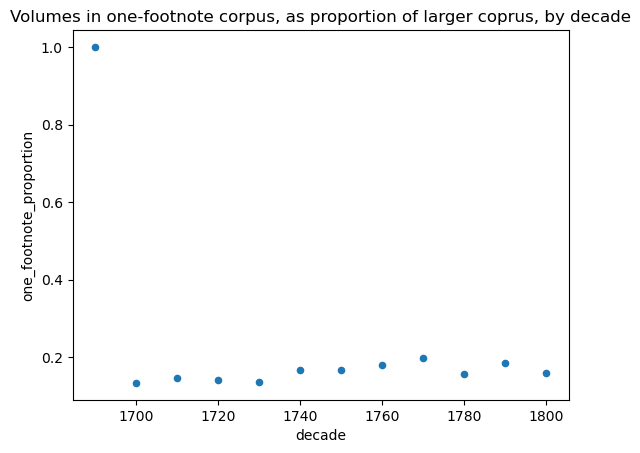

In [116]:
vols_count_footnotes_df.plot.scatter('decade', 'one_footnote_proportion', title="Volumes in one-footnote corpus, as proportion of larger coprus, by decade")

In [117]:
result = stats.linregress(vols_count_footnotes_df['decade'][1:], vols_count_footnotes_df['one_footnote_proportion'][1:])
print(result)
print(f"The slope of the line measuring proportion of footnotes/decade is:{result.slope}")

LinregressResult(slope=0.00042193444687323124, intercept=-0.5767942662125448, rvalue=0.6588285658948222, pvalue=0.027480872398679062, stderr=0.0001605973556495961, intercept_stderr=0.2810912536004507)
The slope of the line measuring proportion of footnotes/decade is:0.00042193444687323124


In [118]:
# Let's perform Pearson's test for correlation between number of volumes in one footnote corpus and total corpus
# We assume the null hypthoesis: there is no association between the variables
rho, p = pearsonr(vols_count_footnotes_df['One_footnote_Corpus_Volumes'],vols_count_footnotes_df['Number_of_Total_Volumes'])

#print Pearson rank correlation and p-value
print("CORRELATION BETWEEN NUMBER OF VOLUMES (TOTAL) AND NUMBER OF ONE-FOOTNOTE VOLUMES")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

CORRELATION BETWEEN NUMBER OF VOLUMES (TOTAL) AND NUMBER OF ONE-FOOTNOTE VOLUMES
Pearson rank correlation:
0.993118033900296
p-value:
1.2017810023725311e-10


## 3. One Footnote Subset, with tags

This data subset represents all volumes in ECCOFictionTXTLab.csv that contain one page with footnotes predicted. The individual page images for each of these pages was subsequently human-verified to validate the footnote prediction and count the number of footnotes present.

This subset is created from the ECCO-Footnote-Manifest-volumes-with-one-footnote.csv, using the data from two sets of researcher data, both updated as of April 9, 2021. We have concatenated the two sets here.

### Data Dictionary

`fn_pages`: number of pages with footnotes predicted by the model's four machine learning and classification algorithms
`nofn_pages`: number of pages with no footnotes predicted by the model's four machine learning and classification algorithms 	
`TableName`: Name of metadata table 	
`fn.percent`: percentage of pages with footnotes predicted 	
**`footnotes_present`**: number of footnotes present (human-verified) 
`tags`: controlled vocabular of tags describing the type of footnote or non-footnote typoraphic features


In [119]:
# Create a new dataframe with the annotated footnotes
one_footnote_tagged_df = pd.read_csv('Human-Verified-ECCO-Footnote-Manifest-volumes-with-one-footnote-with-tags.csv', encoding='utf-8', parse_dates=True)

In [120]:
one_footnote_tagged_df.head()

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0        5098  0000100701.xml      100701  T134638  1779   
1        5099  0000100702.xml      100702  T134638  1779   
2        5100  0000100800.xml      100800  T112791  1788   
3         450  0000200500.xml      200500  T128705  1791   
4         453  0000200700.xml      200700  T128696  1741   

                                               Title Vol_Number  \
0  Prince Arthur: an allegorical romance. The sto...   Volume 1   
1  Prince Arthur: an allegorical romance. The sto...   Volume 2   
2  Ismene and Ismenias, a novel translated from t...          0   
3  Scelta di novelle di Giovanni Boccaccio, fatta...          0   
4  The decameron, or ten days entertainment of Bo...          0   

                      Author  \
0        Bicknell, Alexander   
1        Bicknell, Alexander   
2  Eustathius, Macrembolites   
3        Boccaccio, Giovanni   
4        Boccaccio, Giovanni   

                                             Imprint  \
0  London : printed for G. Riley; and sold by F. ...   
1  London : printed for G. Riley; and sold by F. ...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
3  In Londra : presso Francesco Wingrave, success...   
4  London : printed for R. Dodsley, at Tully's He...   

                                      Field_Headings  fn_pages  nofn_pages  \
0          Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1          Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
3                      Italian fiction, 18th century         1         306   
4   Wood-engraving, English, Specimens, 17th century         1         600   

              TableName  fn.percent  decade  footnotes_present           tags  \
0  Manifest_LitAndLang2    0.003846    1770                  1          C, IT   
1  Manifest_LitAndLang2    0.003817    1770                  0             CW   
2  Manifest_LitAndLang2    0.004717    1780                  0  BQ, P, TY, TE   
3  Manifest_LitAndLang1    0.003257    1790                  0             SE   
4  Manifest_LitAndLang1    0.001664    1740                  2            NaN   

  Unnamed: 17 Unnamed: 18  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

## How many VERIFIED FOOTNOTES are there in the one-footnote-subset?

In [121]:
one_footnote_tagged_df['footnotes_present'].sum()

675

----

### Model metrics: tagged one-footnote subset

**Terminology**  
TP (True Positives): known  
TN (True Negatives): unknown  
FP (False Posiives): known  
FN (False Negatives): unknown 


Because we don't have the TIFF files for pages that the machine learning and classification algorithms predicted to contain no footnotes, we can't compute false negative and true metrics. This also means  so we can't comput the full classification accuracy, recall, or specificity 
>(**Classification accuracy**: percentage of correct predictions in the one footnote subset, or overall, how often is the classifier correct? `classification_accuracy = (TP + TN) / float(TP + TN + FP + FN))`)

>**Recall** (or "sensitivity"): When the actual value is positive, how often is the prediction correct? `recall = TP / float(FN + TP)`

But what we do have is the number of false positives for the subset.

### Precision
**Precision**:  When a positive value is predicted, how often is the prediction correct?
`precision = TP / float(TP + FP)`

In [122]:
#Calculate the number of true positives
TP = one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] != 0]['DocumentID'].count()
print("True Positives:", TP)

True Positives: 624


In [123]:
#Calculate the number of false positives
FP = one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] == 0]['DocumentID'].count()
print("False Positives:", FP)

False Positives: 860


Let's calculate the **precision score**

In [124]:
#Calculate the precision score
precision = TP / float(TP + FP)
print("Precision score:", precision)
print("Precision score:", precision * 100, "%")

Precision score: 0.42048517520215634
Precision score: 42.04851752021563 %


-----

### Data parsing: Cleaning and parsing our multi-value tags

In [125]:
# splitting multivalue cells into rows by delimiter ','
tags_list = one_footnote_tagged_df.tags.str.split(',')
one_footnote_tagged_df.tags = tags_list

In [126]:
one_footnote_tagged_mr_df = one_footnote_tagged_df.explode('tags')

In [127]:
one_footnote_tagged_mr_df.head(10)

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0        5098  0000100701.xml      100701  T134638  1779   
0        5098  0000100701.xml      100701  T134638  1779   
1        5099  0000100702.xml      100702  T134638  1779   
2        5100  0000100800.xml      100800  T112791  1788   
2        5100  0000100800.xml      100800  T112791  1788   
2        5100  0000100800.xml      100800  T112791  1788   
2        5100  0000100800.xml      100800  T112791  1788   
3         450  0000200500.xml      200500  T128705  1791   
4         453  0000200700.xml      200700  T128696  1741   
5         458  0000300202.xml      300202  T102664  1789   

                                               Title Vol_Number  \
0  Prince Arthur: an allegorical romance. The sto...   Volume 1   
0  Prince Arthur: an allegorical romance. The sto...   Volume 1   
1  Prince Arthur: an allegorical romance. The sto...   Volume 2   
2  Ismene and Ismenias, a novel translated from t...          0   
2  Ismene and Ismenias, a novel translated from t...          0   
2  Ismene and Ismenias, a novel translated from t...          0   
2  Ismene and Ismenias, a novel translated from t...          0   
3  Scelta di novelle di Giovanni Boccaccio, fatta...          0   
4  The decameron, or ten days entertainment of Bo...          0   
5  Zelia in the desert. From the French. By the l...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
3           Boccaccio, Giovanni   
4           Boccaccio, Giovanni   
5  Daubenton, Mme. (Marguerite)   

                                             Imprint  \
0  London : printed for G. Riley; and sold by F. ...   
0  London : printed for G. Riley; and sold by F. ...   
1  London : printed for G. Riley; and sold by F. ...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
3  In Londra : presso Francesco Wingrave, success...   
4  London : printed for R. Dodsley, at Tully's He...   
5  London : printed for G. and T. Wilkie, No 71, ...   

                                      Field_Headings  fn_pages  nofn_pages  \
0          Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0          Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1          Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
3                      Italian fiction, 18th century         1         306   
4   Wood-engraving, English, Specimens, 17th century         1         600   
5            Voyages, Imaginary, Early works to 1800         1         257   

              TableName  fn.percent  decade  footnotes_present tags  \
0  Manifest_LitAndLang2    0.003846    1770                  1    C   
0  Manifest_LitAndLang2    0.003846    1770                  1   IT   
1  Manifest_LitAndLang2    0.003817    1770                  0   CW   
2  Manifest_LitAndLang2    0.004717    1780                  0   BQ   
2  Manifest_LitAndLang2    0.004717    1780                  0    P   
2  Manifest_LitAndLang2    0.004717    1780                  0   TY   
2  Manifest_LitAndLang2    0.004717    1780                  0   TE   
3  Manifest_LitAndLang1    0.003257    1790                  0   SE   
4  Manifest_LitAndLang1    0.001664    1740                  2  NaN   
5  Manifest_LitAndLang1    0.003

In [128]:
one_footnote_tagged_mr_df['tags'].dtype

dtype('O')

In [129]:
# splitting multi-valued cells by delimiter '/'
tags_list = one_footnote_tagged_mr_df.tags.str.split('/')
one_footnote_tagged_mr_df.tags = tags_list

In [130]:
one_footnote_tagged_MR_df = one_footnote_tagged_mr_df.explode('tags')

In [131]:
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
...                                                 ...       ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present tags  \
0     Manifest_LitAndLang2    0.003846    1770                  1    C   
0     Manifest_LitAndLang2    0.003846    1770                  1   IT   
1     Manifest_LitAndLang2    0.003817    1770                  0   CW   
2     Man

In [132]:
# Removing whitespaces
one_footnote_tagged_MR_df.tags = one_footnote_tagged_MR_df.tags.str.replace(' ', '')
one_footnote_tagged_MR_df['tags'].value_counts()

CW       600
TY       411
C        235
FN       226
SM       203
P        175
PB       167
BQ       161
IT       122
LB       118
T         93
O         90
TE        87
IN        82
SE        65
MT        50
LS        44
PO        41
RQ        22
D         12
M         10
PE         4
SD         3
I          2
P.LB       1
TY.CW      1
CW.TY      1
RQ.CW      1
BP         1
LP         1
NY         1
LD         1
CH         1
TE.LS      1
Name: tags, dtype: int64

In [133]:
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
...                                                 ...       ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present tags  \
0     Manifest_LitAndLang2    0.003846    1770                  1    C   
0     Manifest_LitAndLang2    0.003846    1770                  1   IT   
1     Manifest_LitAndLang2    0.003817    1770                  0   CW   
2     Man

In [134]:
# Adding a new column called "tag" concatenating the results from "tags" and
# "Unanamed: 17" the secondary tag column. We'll split these up later
one_footnote_tagged_MR_df['tag'] = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df.columns[16:]].apply(
    lambda x: '/'.join(x.dropna().astype(str)),
    axis=1
)
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
...                                                 ...       ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present tags  \
0     Manifest_LitAndLang2    0.003846    1770                  1    C   
0     Manifest_LitAndLang2    0.003846    1770                  1   IT   
1     Manifest_LitAndLang2    0.003817    1770                  0   CW   
2     Man

In [135]:
# Now, splitting multi-valued cells in "tag" by /
tag_list = one_footnote_tagged_MR_df.tag.str.split('/')
one_footnote_tagged_MR_df.tag = tag_list

In [136]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [137]:
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
...                                                 ...       ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present tags  \
0     Manifest_LitAndLang2    0.003846    1770                  1    C   
0     Manifest_LitAndLang2    0.003846    1770                  1   IT   
1     Manifest_LitAndLang2    0.003817    1770                  0   CW   
2     Man

In [138]:
# Now, splitting multi-valued cells in "tag" by .
tag_list = one_footnote_tagged_MR_df.tag.str.split('.')
one_footnote_tagged_MR_df.tag = tag_list

In [139]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [140]:
one_footnote_tagged_MR_df.tag

0        C
0       IT
1       CW
2       BQ
2        P
        ..
1482    LB
1483    LB
1483     P
1483    TY
1483    CW
Name: tag, Length: 3359, dtype: object

In [141]:
# Now, splitting multi-valued cells in "tag" by ,
tag_list = one_footnote_tagged_MR_df.tag.str.split(',')
one_footnote_tagged_MR_df.tag = tag_list

In [142]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [143]:
one_footnote_tagged_MR_df.tag

0        C
0       IT
1       CW
2       BQ
2        P
        ..
1482    LB
1483    LB
1483     P
1483    TY
1483    CW
Name: tag, Length: 3385, dtype: object

In [144]:
# Removing whitespaces
one_footnote_tagged_MR_df.tag = one_footnote_tagged_MR_df.tag.str.replace(' ', '')
one_footnote_tagged_MR_df['tag'].value_counts()

CW    603
TY    413
C     367
FN    226
SM    203
IT    185
P     176
PB    167
BQ    161
LB    119
IN    116
T     109
O      90
TE     88
SE     65
NN     57
MT     55
LS     45
PO     41
       39
RQ     23
D      12
M      10
PE      4
SD      3
I       2
NY      1
R       1
LD      1
BP      1
CH      1
LP      1
Name: tag, dtype: int64

In [145]:
# Create two new new column with a Boolean True/False for whether footnotes present
one_footnote_tagged_MR_df.loc[one_footnote_tagged_MR_df['footnotes_present'] > 0, 'fn_present_bool'] = 'True' 

In [146]:
one_footnote_tagged_MR_df.loc[one_footnote_tagged_MR_df['footnotes_present'] == 0, 'fn_present_bool'] = 'False' 

In [147]:
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  ...  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations  ...         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations  ...         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations  ...         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...  ...         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...  ...         211   
...                                                 ...  ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...  ...         303   
1483  Great Britain, Politics and government, 1702-1...  ...         412   
1483  Great Britain, Politics and government, 1702-1...  ...         412   
1483  Great Britain, Politics and government, 1702-1...  ...         412   
1483  Great Britain, Politics and government, 1702-1...  ...         412   

                 TableName fn.percent  decade  footnotes_present  tags  \
0     Manifest_LitAndLang2   0.003846    1770                  1     C   
0     Manifest_LitAndLang2   0.003846    1770                  1    IT   
1     Manifest_LitAndLang2   0.003817    1770                  0    CW   
2     Manifest_LitAndLang2   0.004717    1780                  0    B

In [148]:
# Group tags using our boolean column, "fn_present"
one_footnote_tagged_MR_df.groupby(['tag','fn_present_bool'])['footnotes_present'].count()

tag  fn_present_bool
     False               12
     True                27
BP   False                1
BQ   False              159
     True                 2
C    False                8
     True               359
CH   False                1
CW   False              593
     True                10
D    False               12
FN   False                9
     True               217
I    False                2
IN   False                6
     True               110
IT   False                4
     True               181
LB   False              118
     True                 1
LD   False                1
LP   False                1
LS   False               45
M    False                9
     True                 1
MT   True                55
NN   False               41
     True                16
NY   False                1
O    False               87
     True                 3
P    False              174
     True                 2
PB   False              165
     True                 2

In [149]:
# Assign this groupby object to variable 
tags_df = one_footnote_tagged_MR_df.groupby(['tag','fn_present_bool'])['footnotes_present'].count()

In [150]:
# Unstack so that we have two new columns for our boolean True, False
tags_unstacked_df = tags_df.unstack(level=-1)

In [151]:
print("Tag counts, sorted by whether or not footnotes present:")
tags_unstacked_df

Tag counts, sorted by whether or not footnotes present:


fn_present_bool  False   True
tag                          
                  12.0   27.0
BP                 1.0    NaN
BQ               159.0    2.0
C                  8.0  359.0
CH                 1.0    NaN
CW               593.0   10.0
D                 12.0    NaN
FN                 9.0  217.0
I                  2.0    NaN
IN                 6.0  110.0
IT                 4.0  181.0
LB               118.0    1.0
LD                 1.0    NaN
LP                 1.0    NaN
LS                45.0    NaN
M                  9.0    1.0
MT                 NaN   55.0
NN                41.0   16.0
NY                 1.0    NaN
O                 87.0    3.0
P                174.0    2.0
PB               165.0    2.0
PE                 4.0    NaN
PO                41.0    NaN
R                  1.0    NaN
RQ                23.0    NaN
SD                 3.0    NaN
SE                64.0    1.0
SM               201.0    2.0
T                  2.0  107.0
TE                88.0    NaN
TY               408.0    5.0

### Visualization of the number of footnoted and unfootnoted pages for each tag
Note that these counts are *pages* not footnotes. There are a few pages that have more than one footnote.

Text(0, 0.5, 'Number of pages')

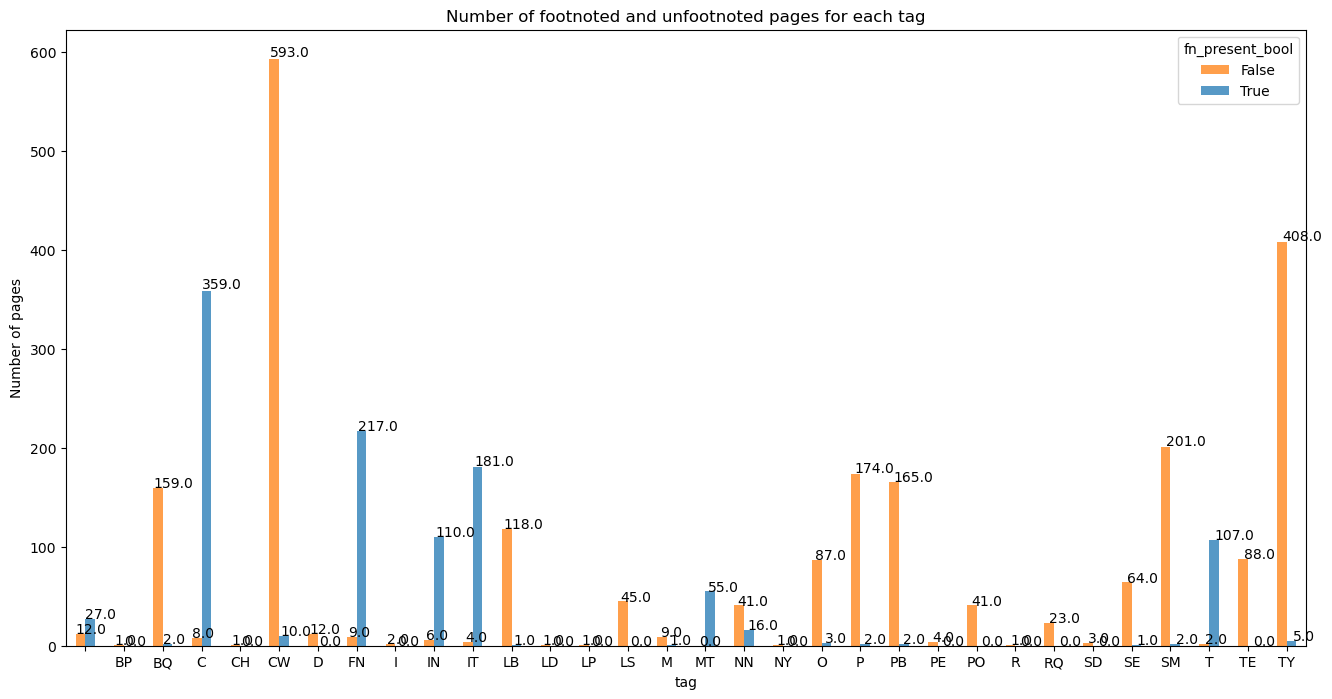

In [152]:
# Plot our tags
ax = tags_unstacked_df.plot(kind='bar', color=['tab:orange','tab:blue'], title="Number of footnoted and unfootnoted pages for each tag", figsize=(16,8), alpha=0.75, rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel("Number of pages")

In [153]:
just_footnotes = one_footnote_tagged_MR_df.loc[((one_footnote_tagged_MR_df['tag'] == 'C') | (one_footnote_tagged_MR_df['tag'] == 'T') | (one_footnote_tagged_MR_df['tag'] == 'IT') | (one_footnote_tagged_MR_df['tag'] == 'IN') | (one_footnote_tagged_MR_df['tag'] == 'MT'))]

### Visualization of the proportion of footnote types in one-footnote-subset
Note that the number of tags is larger than the number of footnotes (675 footnotes) because many footnotes have been tagged to belog to both category.

In [154]:
just_footnotes.groupby(['tag'])['footnotes_present'].value_counts()

tag  footnotes_present
C    1                    346
     2                     12
     0                      8
     3                      1
IN   1                    110
     0                      6
IT   1                    176
     0                      4
     2                      3
     3                      1
     4                      1
MT   1                     55
T    1                    105
     0                      2
     2                      2
Name: footnotes_present, dtype: int64

### How many TAGS do we have for the 675 footnotes?

In [155]:
just_footnotes['footnotes_present'].sum()

836

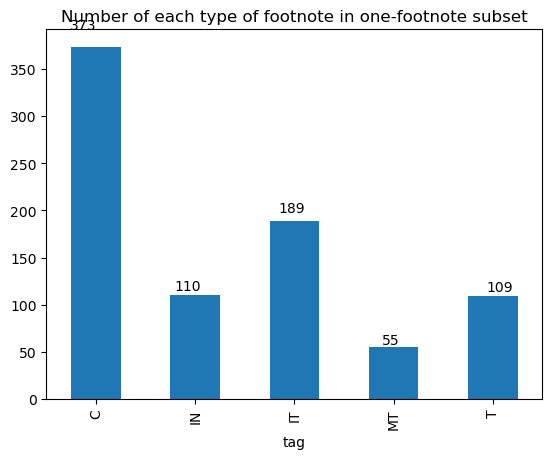

In [156]:
# Group tags using our boolean column, "fn_present"
#just_footnotes = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['footnotes_present'] == 1]
ax =just_footnotes.groupby(['tag'])['footnotes_present'].sum().plot(kind='bar', title="Number of each type of footnote in one-footnote subset")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.05))

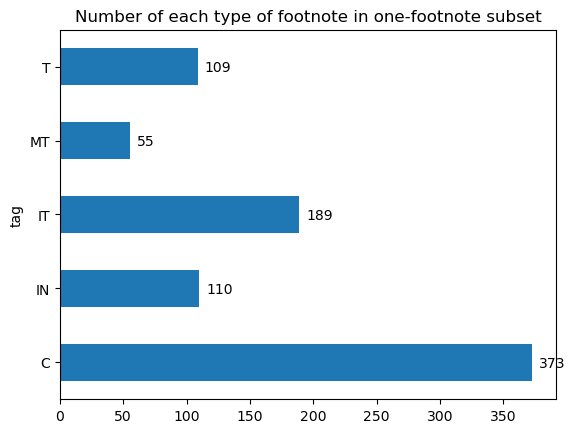

In [157]:
ax = just_footnotes.groupby(['tag'])['footnotes_present'].sum().plot(kind='barh', title="Number of each type of footnote in one-footnote subset")
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

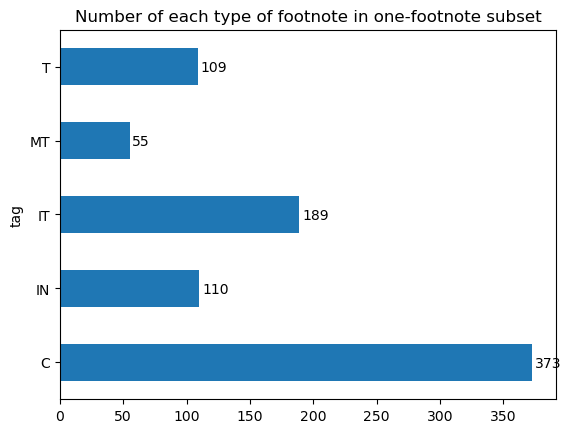

In [158]:
# Group tags using our boolean column, "fn_present"
#just_footnotes = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['footnotes_present'] == 1]
ax =just_footnotes.groupby(['tag'])['footnotes_present'].sum().plot(kind='barh', title="Number of each type of footnote in one-footnote subset")
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(2, 10), textcoords='offset points')

## What tags appear together?
### First, process our tag data


In [159]:
# Adding a new column called "tag" concatenating the results from "tags" and
# "Unanamed: 17" the secondary tag columns. 
one_footnote_tagged_new_df = one_footnote_tagged_df
one_footnote_tagged_new_df['tag'] = one_footnote_tagged_df[one_footnote_tagged_df.columns[16:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
one_footnote_tagged_new_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
3            450  0000200500.xml      200500  T128705  1791   
4            453  0000200700.xml      200700  T128696  1741   
...          ...             ...         ...      ...   ...   
1479        8371  1293500800.xml  1293500800  N063224  1754   
1480        8379  1293700602.xml  1293700602  N069021  1787   
1481        8385  1293900700.xml  1293900700  N031640  1761   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
3     Scelta di novelle di Giovanni Boccaccio, fatta...          0   
4     The decameron, or ten days entertainment of Bo...          0   
...                                                 ...        ...   
1479  The tatler. By the Right Honourable Joseph Add...          0   
1480  Olivia; or, deserted bride. By the author of H...   Volume 2   
1481  The fables of Ph<c3><a6>drus in Latin and Engl...          0   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
3           Boccaccio, Giovanni   
4           Boccaccio, Giovanni   
...                         ...   
1479            Addison, Joseph   
1480  Bonhote, Mrs. (Elizabeth)   
1481                   Phaedrus   
1482        Cumberland, Richard   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
3     In Londra : presso Francesco Wingrave, success...   
4     London : printed for R. Dodsley, at Tully's He...   
...                                                 ...   
1479  Glasgow : printed by Robert Urie, MDCCLIV. [17...   
1480  Dublin : printed for Messrs. W. Watson, Gilber...   
1481            Dublin : printed for John Exshaw, 1761.   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
3                         Italian fiction, 18th century         1         306   
4      Wood-engraving, English, Specimens, 17th century         1         600   
...                                                 ...       ...         ...   
1479        Short stories, English, Early works to 1800         1         262   
1480                      English fiction, 18th century         1         273   
1481                                             Fables         1         142   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present  \
0     Manifest_LitAndLang2    0.003846    1770                  1   
1     Manifest_LitAndLang2    0.003817    1770                  0   
2     Manifest_LitAndLang2    0.004717    1780                  0   
3     Manifest_LitAndLang1   

In [160]:
one_footnote_tagged_new_df['tag'].value_counts().to_csv('multi-tag-categories.csv')

In [161]:
## Exported to Open-Refine, where I used k-means clustering to match different sequences of tag combinations 
## eg a footnote tagged CW, PB is the same as PB, CW
## Re-importing cleaned data below

In [162]:
multi_tagged_footnotes = pd.read_csv('multi-tag-categories-cleaned.csv', encoding='utf-8')

### Plot the counts of each combination of tags in our dataset

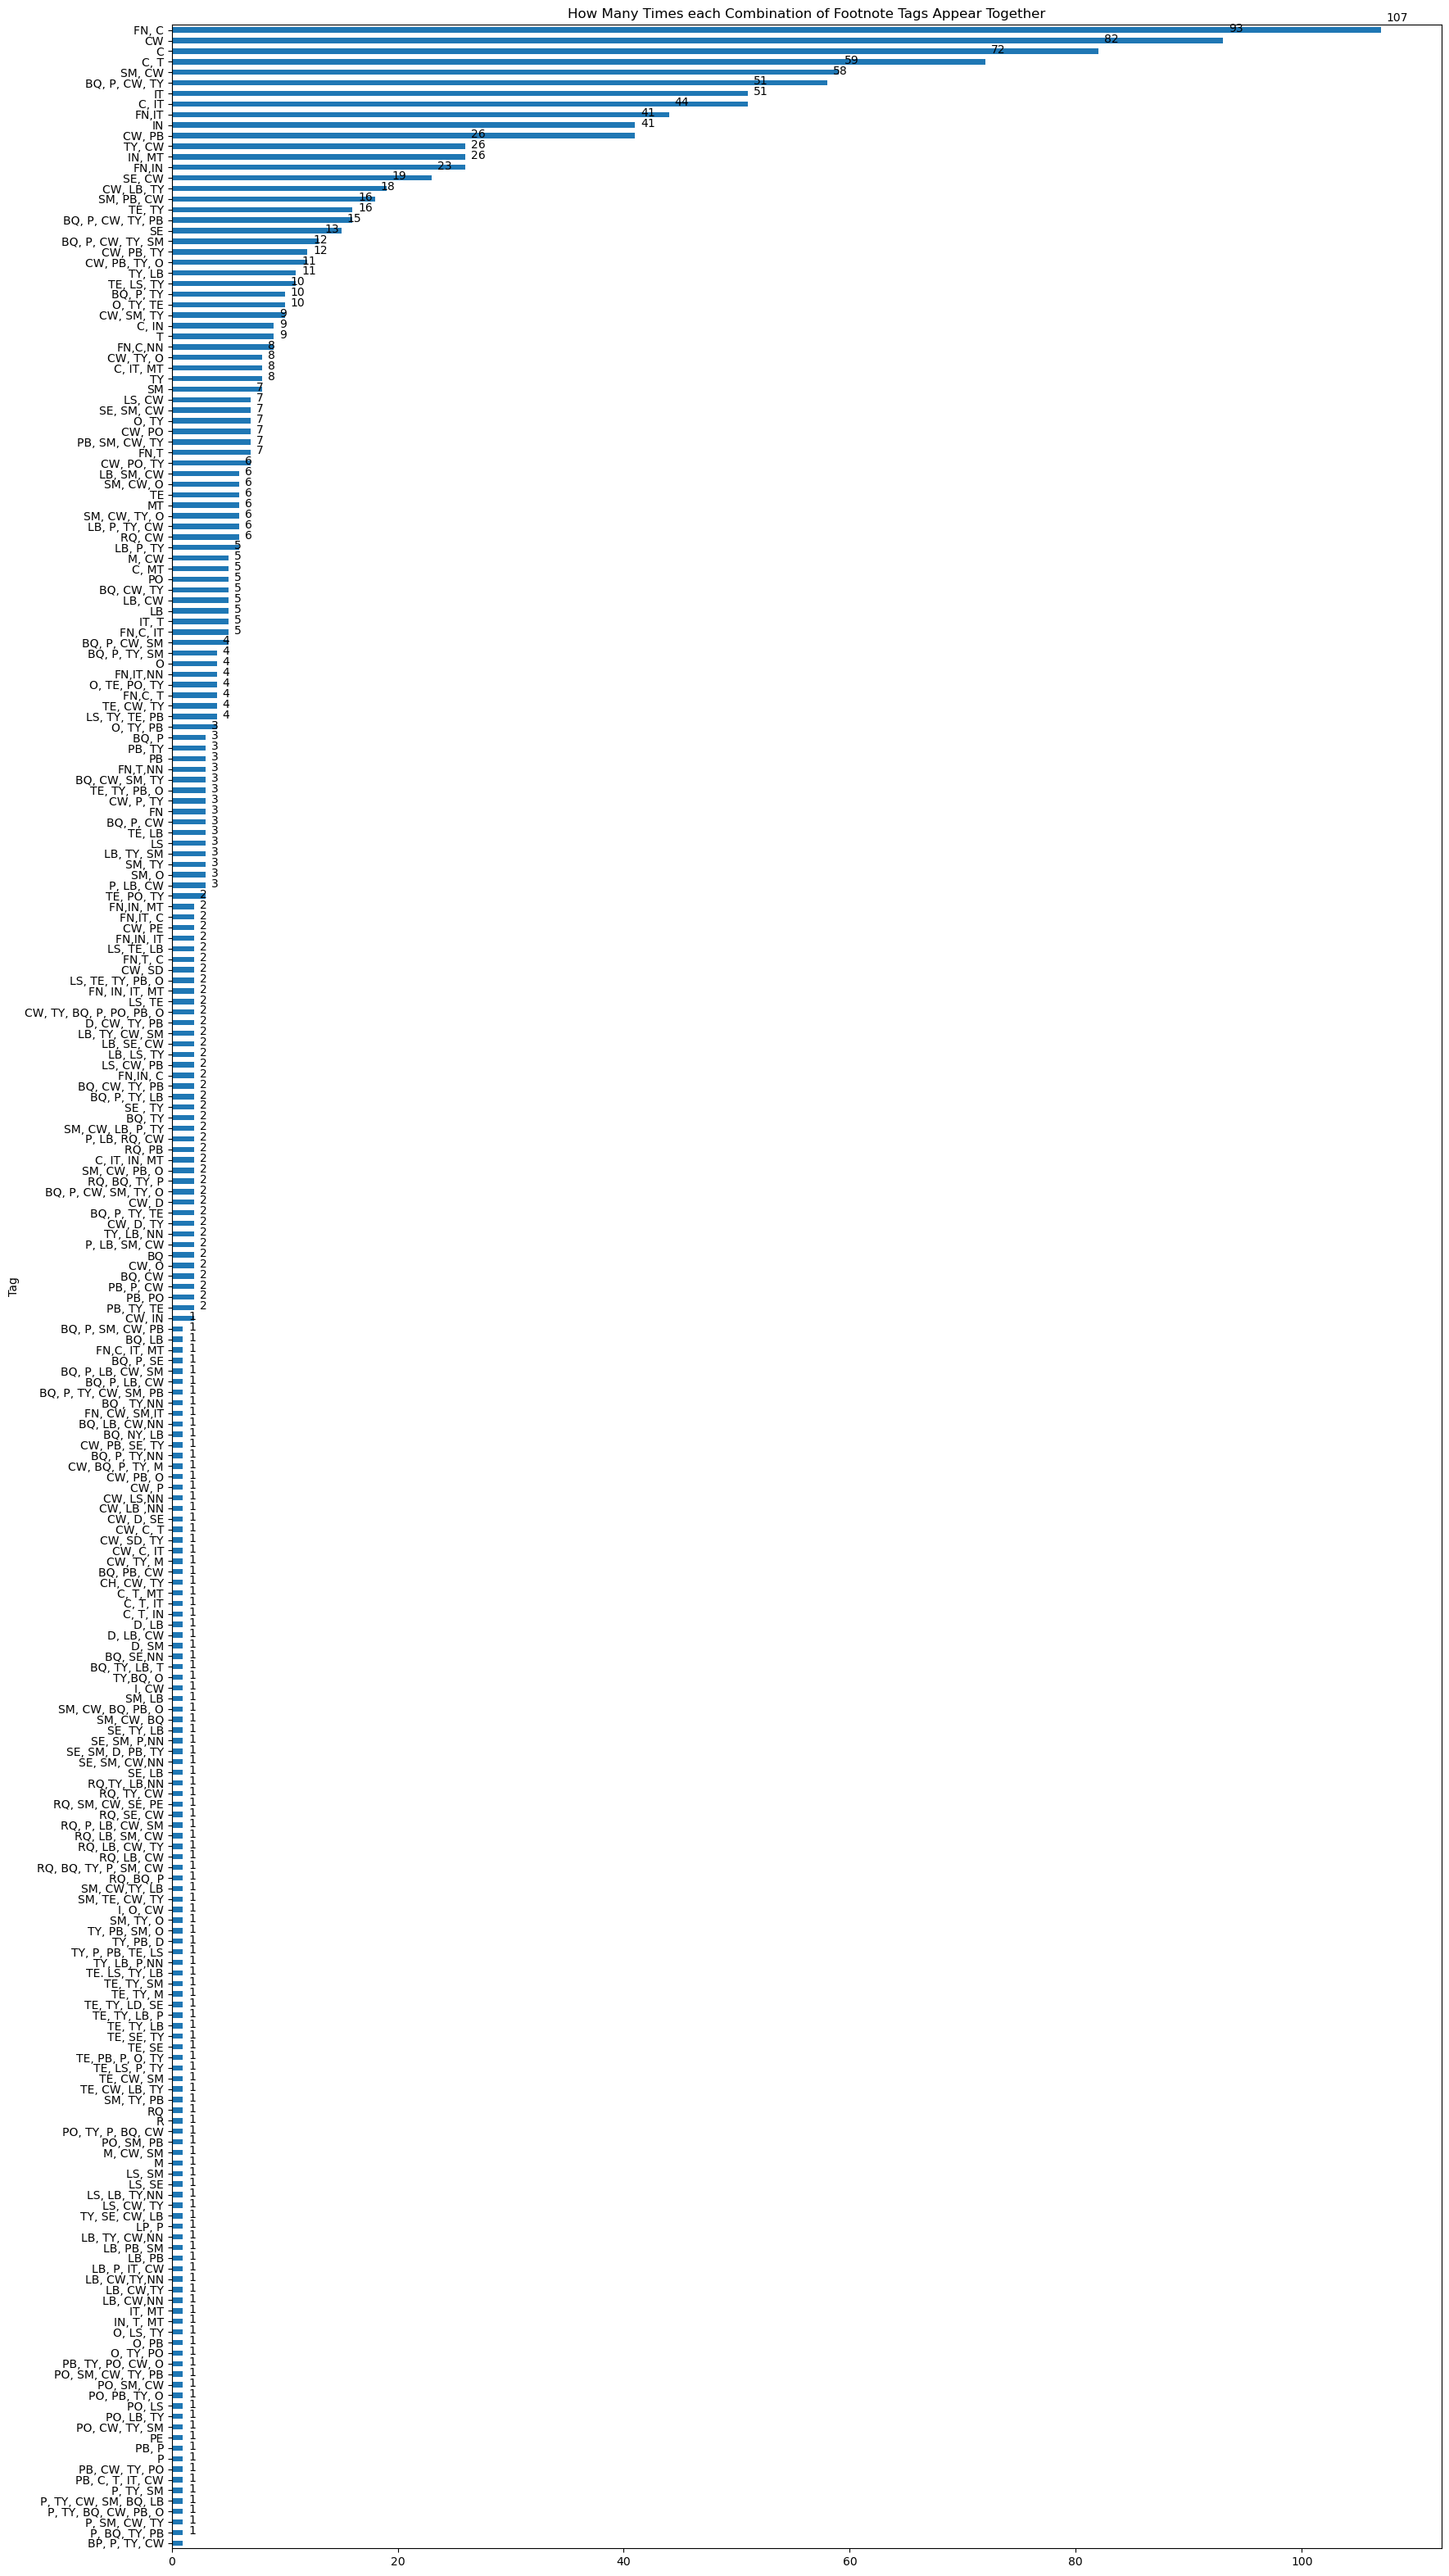

In [163]:
# Plot the combinations of tags
ax = multi_tagged_footnotes.groupby('Tag')['Count'].sum().sort_values(ascending=True)\
.plot(kind='barh', figsize=(20,40), title="How Many Times each Combination of Footnote Tags Appear Together")
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

In [164]:
multi_tagged_footnotes

Count                Tag
0      103              FN, C
1       91                 CW
2       82                  C
3       64               C, T
4       51                 IT
..     ...                ...
404      1             LB, CW
405      1             CW, PO
406      1     LB, TY, CW, SM
407      1  BQ, P, CW, TY, PB
408      1      C, IT, IN, MT

[409 rows x 2 columns]

### Top 25 Tag Combinations for multiple tags and double-tagged footnotes

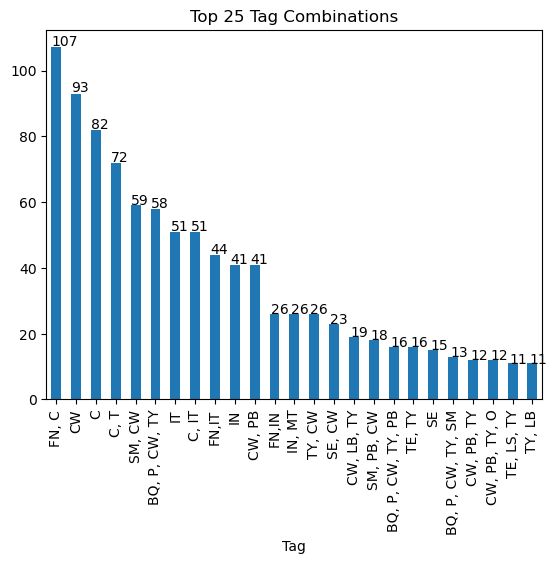

In [165]:
ax = multi_tagged_footnotes.groupby('Tag')['Count'].sum().sort_values(ascending=False).head(25).plot(kind='bar', title="Top 25 Tag Combinations")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Stats on our tagged one-footnote dataset 
### Number of total footnotes in the one-footnote subset

In [166]:
print("Number of total volumes in our one-footnote subset:")
one_footnote_tagged_df['footnotes_present'].count()

Number of total volumes in our one-footnote subset:


1484

### How many volumes in this subset actually have foonotes: 

In [167]:
print("Number of volumes in subset WITH footnotes:")
one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] != 0]['tag'].count()

Number of volumes in subset WITH footnotes:


624

### How many novels in this subset actually have foonotes: 

In [168]:
print("Number of novels (i.e. unique ESTC_C) in subset WITH footnotes:")
one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] != 0]["ESTC_ID"].nunique()

Number of novels (i.e. unique ESTC_C) in subset WITH footnotes:


571

### How many volumes in this subset DO NOT have foonotes: 

In [169]:
print("Number of volumes in subset WITHOUT footnotes:")
one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] == 0]['tag'].count()

Number of volumes in subset WITHOUT footnotes:


860

### How many volumes in this subset are tagged "Not a Novel"

In [170]:
print('Number of volumes in subset tagged "Not a Novel"')
one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'NN']['tag'].count() # note the difference n dataframe

Number of volumes in subset tagged "Not a Novel"


57

### What are the top tags in this dataset?

In [171]:
# Print out the number of times each tag appears in our dataset
print('Tags in our dataset, by count:')
one_footnote_tagged_MR_df['tag'].value_counts()

Tags in our dataset, by count:


CW    603
TY    413
C     367
FN    226
SM    203
IT    185
P     176
PB    167
BQ    161
LB    119
IN    116
T     109
O      90
TE     88
SE     65
NN     57
MT     55
LS     45
PO     41
       39
RQ     23
D      12
M      10
PE      4
SD      3
I       2
NY      1
R       1
LD      1
BP      1
CH      1
LP      1
Name: tag, dtype: int64

## Analysis of tags and clusters of tags

We classified each footnote in the one-footnote corpus by function:

**Context (C)**: footnotes that provide historical or cultural context (C)  
**Translation (T**, which is a subset of, and thus also tagged as, C): footnotes that provide translations  
**Intertextual (IT)**: footnotes that make an intertextual reference to another work  
**Intratextual (IN)**: footnotes that make an intratextual  reference to another point in the text or the narrative  
**Metatextual (MT)** footnotes that offer a metatextual commentary on the narrative or print form of the fictional work

Note: We allowed ourselves give footnotes multiple tags if relevant.

Click on the links below for more in-depth descriptive statistics for each of the following footnote categories:

- [Contextual Footnotes](#Contextual-Footnotes)
    - [Contextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade](#Contextual-footnotes-in-one-footnote-dataset-vs-all-volumes-in-one-footnote-dataset,-by-decade)
    - [Ratios of contextual footnotes to all volumes](#Ratios-of-contextual-footnotes-to-all-volumes)
- [Translation Footnotes](#Translation-Footnotes)
    - [Translation footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade](#Translation-footnotes-in-one-footnote-dataset-vs-all-volumes-in-one-footnote-dataset,-by-decade)
    - [Ratios of translation footnotes to all volumes](#Ratios-of-translation-footnotes-to-all-volumes)
- [Intertextual Footnotes](#Intertextual-Footnotes)
    - [Intertextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade](#Intertextual-footnotes-in-one-footnote-dataset-vs-all-volumes-in-one-footnote-dataset,-by-decade)
    - [Ratios of intertextual footnotes to all volumes](#Ratios-of-intertextual-footnotes-to-all-volumes)
- [Intratextual Footnotes](#Intratextual-Footnotes)
    - [Intratextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade](#Intratextual-footnotes-in-one-footnote-dataset-vs-all-volumes-in-one-footnote-dataset,-by-decade)
    - [Ratios of intratextual footnotes to all volumes](#Ratios-of-intratextual-footnotes-to-all-volumes)
- [Metatextual Footnotes](#Metatextual-Footnotes)
    - [Metatextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade](#Metatextual-footnotes-in-one-footnote-dataset-vs-all-volumes-in-one-footnote-dataset,-by-decade)
    - [Ratios of metatextual footnotes to all volumes](#Ratios-of-metatextual-footnotes-to-all-volumes)

We also include links to the tags assigned to pages misclassified as having a footnote. Descriptive statistics on those pages can be found here:
- [Multi-tagged pages](#Multi-tagged-pages): 

### Contextual Footnotes

In [172]:
# Let's look at the 'C' tag
contextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'C']

In [173]:
contextual_footnotes_df['footnotes_present'].value_counts()

1    346
2     12
0      8
3      1
Name: footnotes_present, dtype: int64

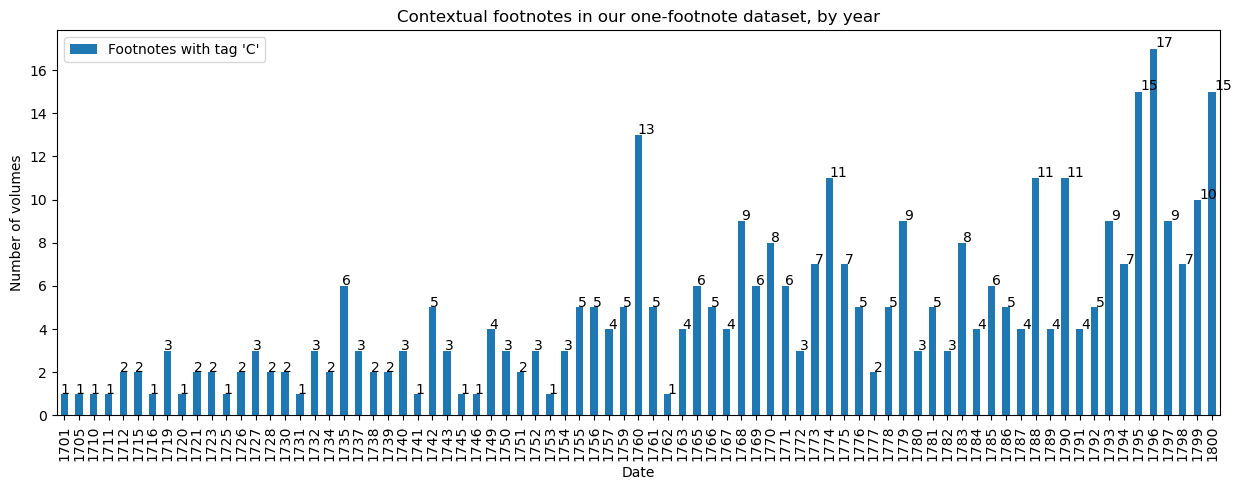

In [174]:
# Plot the number of C tagged footnotes in each year
ax = contextual_footnotes_df.groupby('Date')[['footnotes_present']].sum().plot(kind="bar", figsize=(15, 5), title="Contextual footnotes in our one-footnote dataset, by year")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Footnotes with tag 'C'"])

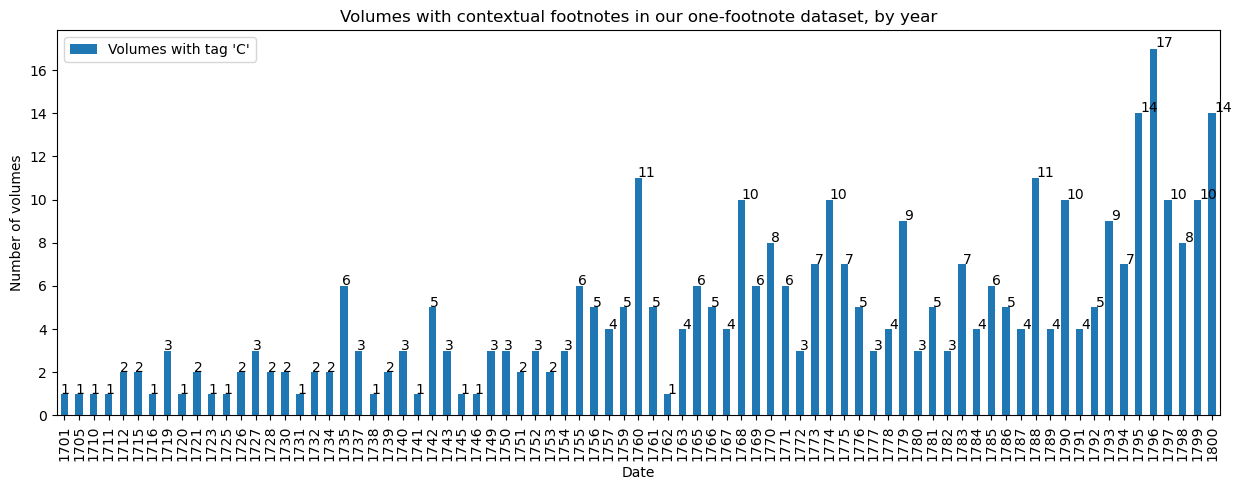

In [175]:
# Plot the number of C tagged volumes in each year
ax = contextual_footnotes_df.groupby('Date')[['tag']].count().plot(kind="bar", figsize=(15, 5), title="Volumes with contextual footnotes in our one-footnote dataset, by year")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'C'"])

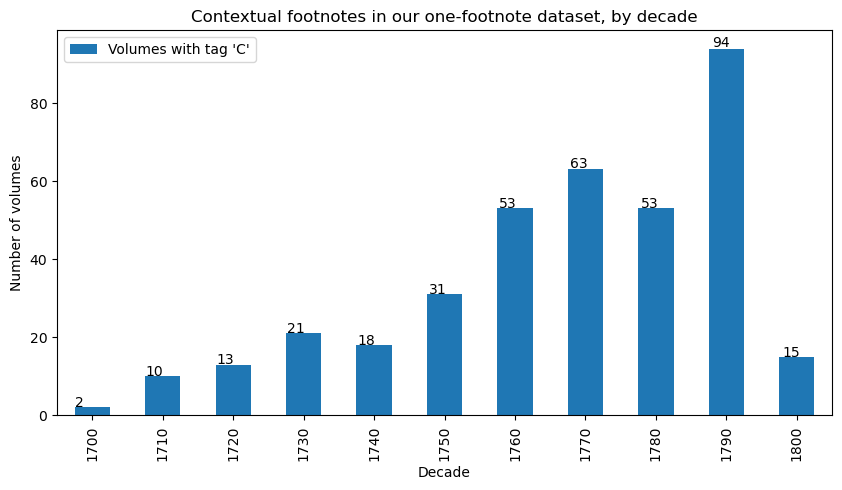

In [176]:
# Plot the nubmer of C tagged footnotes in each decade

ax = contextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Contextual footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'C'"])

### Let's run a statistical test on these results

In [177]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dateset)
all_footnotes_by_decade = one_footnote_tagged_new_df.groupby('decade')[['tag']].count().reset_index()
#contextual_footnotes_by_decade = contextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
contextual_footnotes_by_decade = contextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_C = pd.merge_ordered(all_footnotes_by_decade,contextual_footnotes_by_decade, on='decade').fillna(0)


In [178]:
merged_C

decade  tag  footnotes_present
0     1690    1                0.0
1     1700   20                2.0
2     1710   36               10.0
3     1720   54               13.0
4     1730   44               21.0
5     1740   75               18.0
6     1750  121               31.0
7     1760  184               53.0
8     1770  236               63.0
9     1780  255               53.0
10    1790  396               94.0
11    1800   62               15.0

In [179]:
#merged_C['volumes_with_footnotes/all_volumes'] = merged_C['tag_y'] / merged_C['tag_x'] 
merged_C['volumes_with_footnotes/all_volumes'] = merged_C['footnotes_present'] / merged_C['tag'] 
merged_C

decade  tag  footnotes_present  volumes_with_footnotes/all_volumes
0     1690    1                0.0                            0.000000
1     1700   20                2.0                            0.100000
2     1710   36               10.0                            0.277778
3     1720   54               13.0                            0.240741
4     1730   44               21.0                            0.477273
5     1740   75               18.0                            0.240000
6     1750  121               31.0                            0.256198
7     1760  184               53.0                            0.288043
8     1770  236               63.0                            0.266949
9     1780  255               53.0                            0.207843
10    1790  396               94.0                            0.237374
11    1800   62               15.0                            0.241935

In [180]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dateset)
all_footnotes_by_date = one_footnote_tagged_new_df.groupby('Date')[['tag']].count().reset_index()
#contextual_footnotes_by_date = contextual_footnotes_df.groupby('Date')[['tag']].count().reset_index()
contextual_footnotes_by_date = contextual_footnotes_df.groupby('Date')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_C_date = pd.merge_ordered(all_footnotes_by_date,contextual_footnotes_by_date, on='Date').fillna(0)
merged_C_date['volumes_with_footnotes/all_volumes'] = merged_C_date['footnotes_present'] / merged_C_date['tag'] 
merged_C_date

Date  tag  footnotes_present  volumes_with_footnotes/all_volumes
0   1697    1                0.0                            0.000000
1   1701    2                1.0                            0.500000
2   1702    3                0.0                            0.000000
3   1703    2                0.0                            0.000000
4   1704    1                0.0                            0.000000
..   ...  ...                ...                                 ...
95  1796   51               17.0                            0.333333
96  1797   41                9.0                            0.219512
97  1798   35                7.0                            0.200000
98  1799   47               10.0                            0.212766
99  1800   62               15.0                            0.241935

[100 rows x 4 columns]

In [181]:
# Let's perform Pearson's test for correlation between number of volumes and number of footnotes
# We assume the null hypthoesis: there is no association between the variables
rho, p = pearsonr(merged_C_date['tag'], merged_C_date['footnotes_present'])

#print Pearson rank correlation and p-value
print("CORRELATION BETWEEN NUMBER OF VOLUMES AND NUMBER OF CONTEXTUAL FOOTNOTES (by year)")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

CORRELATION BETWEEN NUMBER OF VOLUMES AND NUMBER OF CONTEXTUAL FOOTNOTES (by year)
Pearson rank correlation:
0.8473261035742256
p-value:
1.0979638673677108e-28


In [182]:
# Let's perform Pearson's test for correlation between number of volumes and number of footnotes
# We assume the null hypthoesis: there is no association between the variables
rho, p = pearsonr(merged_C['tag'], merged_C['footnotes_present'])

#print Pearson rank correlation and p-value
print("CORRELATION BETWEEN NUMBER OF VOLUMES AND NUMBER OF CONTEXTUAL FOOTNOTES (by decade)")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

CORRELATION BETWEEN NUMBER OF VOLUMES AND NUMBER OF CONTEXTUAL FOOTNOTES (by decade)
Pearson rank correlation:
0.9842877224397641
p-value:
7.345801582116839e-09


This indicates that there is a strong (statistically significant) positive correlation between the number of volumes and the number of footnotes.

The p-value of 5.087400861535177e-09 is lower than 0.05, indicating that the correlation is statistically significant. The correlation coefficient of 0.9854062253339878 indicates a strong positive correlation

CORRELATION BETWEEN NUMBER OF VOLUMES AND NUMBER OF CONTEXTUAL FOOTNOTES (by decade)
Pearson rank correlation:
0.9854062253339878
p-value:
5.087400861535177e-09

The distribution of contextual footnotes is correlated, as we would expect.

In [183]:
# Figure out what proportion of the larger population our subset is
merged_C['tag'].sum() / merged_C['footnotes_present'].sum()

3.9785522788203753

In [184]:
# ALT Figure out what proportion of the larger population our subset is
merged_C['footnotes_present'].sum() / merged_C['tag'].sum()

0.25134770889487873

In [185]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_C['decade'], merged_C['volumes_with_footnotes/all_volumes'])

#print Pearson rank correlation and p-value
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Pearson rank correlation:
0.33495174672369576
p-value:
0.28721119933081807


Now that we've confimred the correlation between footnotes and volumes, we've normalized our footnotes by the number of volumes that year. 

What we're testing now is whether there is a clear linear increase in the proportion of contextual footnotes over time:

The correlation coefficient is 0.33495174672369576 indicates that there is a **weak positive correlation between the normalized number of footnotes** and the decade. 

**However p-value of 0.28721119933081807 is higher than 0.05, indicating that the correlation is not necessarily statistically significant.**

Here, the null test has failed to be rejected. This does not mean that contextual footnotes keep pace with the number of volumes per year. See below for our piecewise analysis of the trend.


In [186]:
result = stats.linregress(merged_C['decade'], merged_C['volumes_with_footnotes/all_volumes'])
print(result)
print(f"The slope of the line measuring proportion of footnotes/decade is:{result.slope}")

LinregressResult(slope=0.0010446378092182436, intercept=-1.5867150952357072, rvalue=0.33495174672369576, pvalue=0.2872111993308181, stderr=0.0009292720096870338, intercept_stderr=1.6218969274357433)
The slope of the line measuring proportion of footnotes/decade is:0.0010446378092182436


In [187]:
#esult = stats.linregress(merged_C['tag_y'], merged_C['tag_x'])
#print(result)


In [188]:
# Let's run a chi2 goodness of fit test
#ratio_of_footnotes = merged_C['tag_y'].sum() / merged_C['tag_x'].sum()
#stats.chisquare(f_obs=merged_C['tag_y'], f_exp=(merged_C['tag_x']*(ratio_of_footnotes)))


### Contextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade

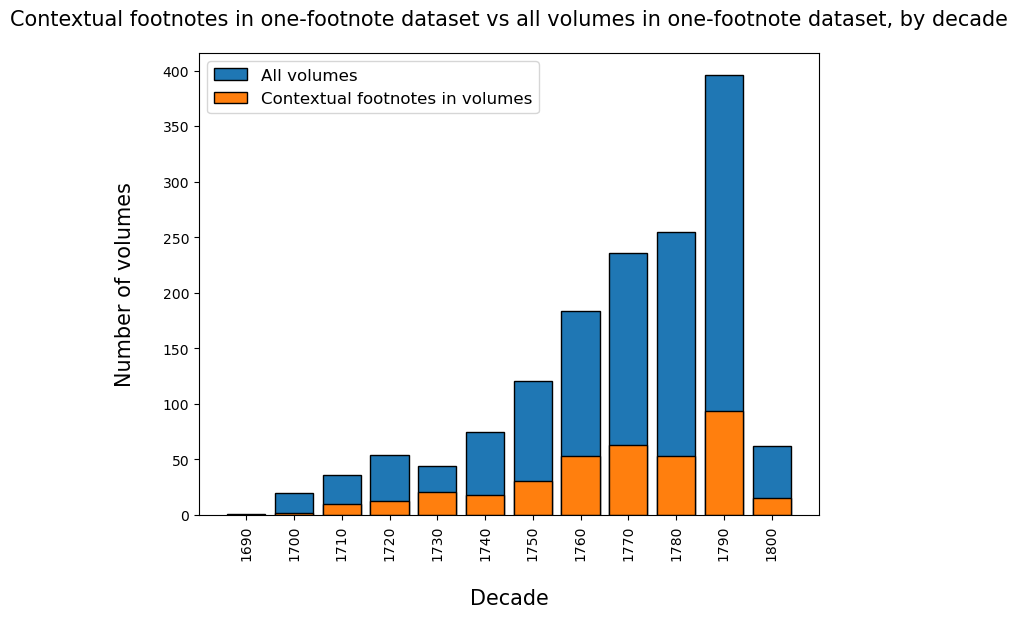

In [189]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

label = merged_C["decade"]

x = np.arange(len(label))

rect2 = ax.bar(x,
              merged_C["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax.bar(x,
              merged_C["footnotes_present"],
              label = "Contextual footnotes in volumes",
              edgecolor = "black")

#add the labels to the axis
ax.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax.set_title("Contextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)#add the legend
#using the labels of the bars
ax.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 10)


### Ratios of contextual footnotes to all volumes

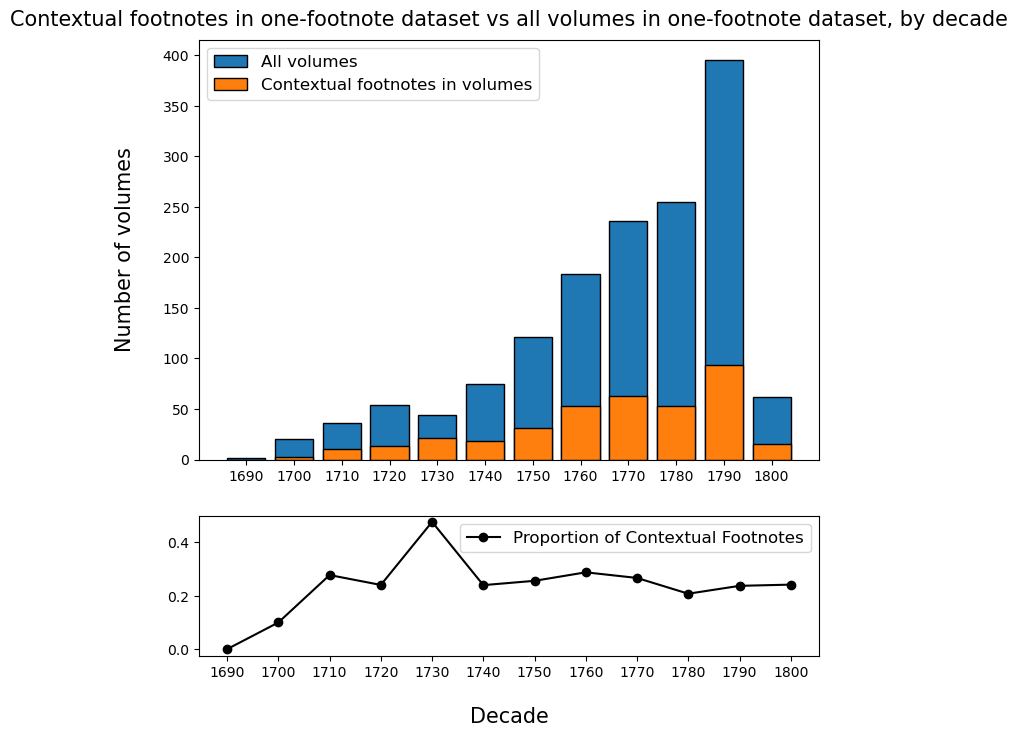

In [190]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (8,8))

label = merged_C["decade"]

x = np.arange(len(label))

rect2 = ax1.bar(x,
              merged_C["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax1.bar(x,
              merged_C["footnotes_present"],
              #label = "Volumes with contextual footnotes",
              label = "Contextual footnotes in volumes",
              edgecolor = "black")

rect3 = ax2.plot(x,
              merged_C["footnotes_present"]/merged_C["tag"],
              label = "Proportion of Contextual Footnotes",
              marker="o",
              color="black",
              markeredgecolor="black")


#add the labels to the axis
ax1.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax2.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax1.set_title("Contextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 10)
#set the ticks
ax1.set_xticks(x)
ax1.set_xticklabels(label)#add the legend
#using the labels of the bars
ax1.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax1.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)
ax1.tick_params(axis = "y",
              which = "both",
              labelsize = 10)

#add the labels to the axis

#set the ticks
ax2.set_xticks(x)
ax2.set_xticklabels(label)#add the legend

#using the labels of the bars
ax2.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax2.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)



In [191]:
# Creating a Linear Regression model on our data
#lin = LinearRegression()
#lin.fit(merged_C[['decade']], merged_C['tag_x'])
# Creating a plot
#ax = merged_C.plot.scatter(x='decade', y='tag_x', alpha=1)
#ax.plot(merged_C['decade'], lin.predict(merged_C[['decade']]), c='r')
#lin.coef_


In [192]:
# Creating a Linear Regression model on our data
#lin = LinearRegression()
#lin.fit(merged_C[['decade']], merged_C['tag_y'])
# Creating a plot
#ax = merged_C.plot.scatter(x='decade', y='tag_y', alpha=1)
#ax.plot(merged_C['decade'], lin.predict(merged_C[['decade']]), c='r')
#lin.coef_

In [193]:
#from sklearn.linear_model import LinearRegression, BayesianRidge
# Creating a Linear Regression model on our data
#lin = BayesianRidge()
#lin.fit(merged_C_date[['Date']], merged_C_date['tag_x'])
# Creating a plot
#ax = merged_C_date.plot.scatter(x='Date', y='tag_x', alpha=1)
#ax.plot(merged_C_date['Date'], lin.predict(merged_C_date[['Date']]), c='r')
#lin.score(merged_C_date[['Date']], merged_C_date['tag_x'])

#print(lin.coef_)

In [194]:
#model = BayesianRidge()
#model.fit(merged_C_date[['Date']], merged_C_date['tag_y'])
# Creating a plot
#ax = merged_C_date.plot.scatter(x='Date', y='tag_y', alpha=1)
#ax.plot(merged_C_date['Date'], model.predict(merged_C_date[['Date']]), c='r')
#model.score(merged_C_date[['Date']], merged_C_date['tag_x'])

#print(model.coef_)

In [195]:
#model = BayesianRidge()
#model.fit(merged_C_date[['Date']], merged_C_date['volumes_with_footnotes/all_volumes'])
# Creating a plot
#ax = merged_C_date.plot.scatter(x='Date', y='volumes_with_footnotes/all_volumes', alpha=1)
#ax.plot(merged_C_date['Date'], model.predict(merged_C_date[['Date']]), c='r')
#model.score(merged_C_date[['Date']], merged_C_date['volumes_with_footnotes/all_volumes'])

#print(model.coef_)

In [196]:
# Fitting a Linear Regression model to our data (binning by year, rather than decade)
#lin = LinearRegression()
#lin.fit(merged_C_date[['Date']], merged_C_date['volumes_with_footnotes/all_volumes'])

# Creating a scatterplot of our data (in blue)
#ax = merged_C_date.plot.scatter(x='Date', y='volumes_with_footnotes/all_volumes')

# Adding our plotted linear regression model (in orange)
#ax.plot(merged_C_date['Date'], lin.predict(merged_C_date[['Date']]), c='orange')

In [197]:
lin.score(merged_C_date[['Date']], merged_C_date['volumes_with_footnotes/all_volumes'])

NameError: name 'lin' is not defined

0.11219267263325494

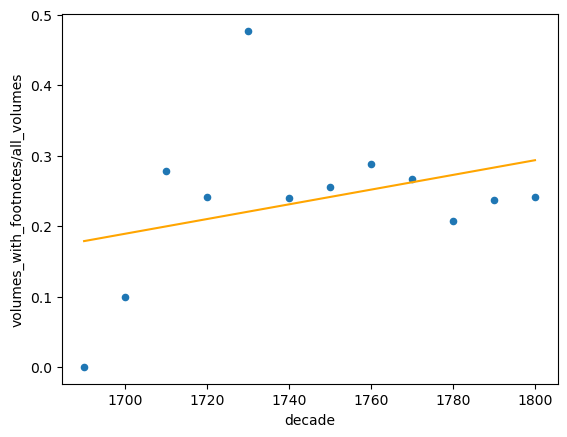

In [198]:
# Fitting a Linear Regression model to our data (binning by decade)
linear = LinearRegression()
linear.fit(merged_C[['decade']], merged_C['volumes_with_footnotes/all_volumes'])

# Creating a scatterplot of our data (in blue)
ax = merged_C.plot.scatter(x='decade', y='volumes_with_footnotes/all_volumes')

# Adding our plotted linear regression model (in orange)
ax.plot(merged_C['decade'], linear.predict(merged_C[['decade']]), c='orange')
linear.score(merged_C[['decade']], merged_C['volumes_with_footnotes/all_volumes'])

In [199]:
xtrain = merged_C['decade']
ytrain = merged_C['volumes_with_footnotes/all_volumes']
model = sm.Logit(ytrain, xtrain).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.438753
         Iterations 4


/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 -

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                   
==============================================================================================
Dep. Variable:     volumes_with_footnotes/all_volumes   No. Observations:                   12
Model:                                          Logit   Df Residuals:                       11
Method:                                           MLE   Df Model:                            0
Date:                                Fri, 28 Mar 2025   Pseudo R-squ.:                     inf
Time:                                        17:09:38   Log-Likelihood:                -5.2650
converged:                                       True   LL-Null:                        0.0000
Covariance Type:                            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
decade        -0.0007      0.000     -1.723      0.085      -0.001    9.24e-05
==============================================================================
"""

In [200]:
#!pip install Rbeast

Here, again, we have a non-robust model and a pvalue greater than 0.05.

In [201]:
#o          = rb.beast(merged_C['volumes_with_footnotes/all_volumes'], start=1690, deltat= 10, season='none')  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of Contextual Footnotes per Decade')
#rb.print(o)

In [202]:
#o          = rb.beast( merged_C_date['volumes_with_footnotes/all_volumes'], start=1690, season='none', period=1.0)  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of contextual footnotes per year')
#rb.print(o)

In [203]:
x= list(merged_C['decade'])
y= list(merged_C['volumes_with_footnotes/all_volumes'])
pw_fit = piecewise_regression.Fit(x, y, n_breakpoints=1)
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       12
No. Model Parameters                    4
Degrees of Freedom                      8
Res. Sum of Squares             0.0388305
Total Sum of Squares             0.139092
R Squared                        0.720829
Adjusted R Squared               0.561303
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -15.1904         5.31      -2.8594        0.0212      -27.441        -2.94
alpha1                 0.009      0.00312       2.8886        0.0202    0.0018152     0.016185
beta1             -0.0111746       0.0033      -3.3904             -    -0.018775   -0.0035741
breakpoint1          1727.62          8.2            -             -       1708.7       1746.5
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       12\nNo. Model Parameters                    4\nDegrees of Freedom                      8\nRes. Sum of Squares             0.0388305\nTotal Sum of Squares             0.139092\nR Squared                        0.720829\nAdjusted R Squared               0.561303\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst               -15.1904         5.31      -2.8594        0.0212      -27.

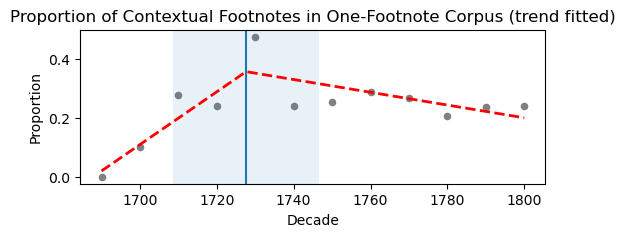

In [204]:
# Plot the data, fit, breakpoints and confidence intervals
plt.subplots(figsize=(6, 2))
pw_fit.plot_data(color="grey",  s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linestyle='dashed', linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Decade")
plt.ylabel("Proportion")
plt.title("Proportion of Contextual Footnotes in One-Footnote Corpus (trend fitted)")
plt.show()
plt.close()

In [205]:
pw_results = pw_fit.get_results()
pw_estimates = pw_results["estimates"]
pw_results

{'davies': 3.3256113579359773e-10,
 'estimates': {'const': {'estimate': -15.190370370370555,
   'se': 5.312394529946293,
   'confidence_interval': (-27.440774123355368, -2.9399666173857444),
   't_stat': -2.8594206030334357,
   'p_t': 0.021170250807808898},
  'beta1': {'estimate': -0.011174585681214946,
   'se': 0.003295952045581334,
   'confidence_interval': (-0.0187750647271972, -0.003574106635232695),
   't_stat': -3.3903969252817188,
   'p_t': '-'},
  'breakpoint1': {'estimate': 1727.6225406843107,
   'se': 8.203198611199161,
   'confidence_interval': (1708.7059307663853, 1746.539150602236),
   't_stat': '-',
   'p_t': '-'},
  'alpha1': {'estimate': 0.009000000000000126,
   'se': 0.0031157069319900812,
   'confidence_interval': (0.0018151669312788622, 0.01618483306872139),
   't_stat': 2.888590036371488,
   'p_t': 0.020242900344263008},
  'alpha2': {'estimate': -0.0021745856812148204,
   'se': 0.0010750210233854667,
   'confidence_interval': (-0.004653588606389512, 0.00030441724395

### What are the titles of the works with contextual footnotes?

In [206]:
print('Number of volumes with contextual footnotes in our one-footnote dataset:')
contextual_footnotes_df['Title'].count()

Number of volumes with contextual footnotes in our one-footnote dataset:


367

In [207]:
print('Titles of volumes with contextual footnotes (in our one-footnote dataset):')
contextual_footnotes_df[['Title','Vol_Number']]

Titles of volumes with contextual footnotes (in our one-footnote dataset):


Title Vol_Number
0     Prince Arthur: an allegorical romance. The sto...   Volume 1
10    Lettres de Sophie et du Chevalier de **, pour ...   Volume 2
12    Female banishment: or, the woman hater. Origin...   Volume 1
13    Female banishment: or, the woman hater. Origin...   Volume 2
14    The illustrious French lovers; being the true ...   Volume 1
...                                                 ...        ...
1463  Short rules for attaining the Italian language...          0
1468  The vicar of Wakefield, a tale supposed to be ...          0
1471  The expedition of Humphry Clinker. By Tobias S...   Volume 1
1472  Beauties in prose and verse: or, the new, plea...          0
1475  Ben Johnson's jests: or the wit's pocket compa...          0

[367 rows x 2 columns]

#### Export the list of filenames for contextual footnotes

In [208]:
contextual_footnotes_df['Filename'].to_csv('../contextual_footnotes_filenames.csv')


### Genre terms in the Contextual Footnote Titles
#### "Memoirs"

In [209]:
genre_term = "memoir|Memoir"
dataframe = contextual_footnotes_df
corpus_name = "Contextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_contextual_memoirs = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir':
12
Percent of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir':
0.0326975476839237


#### "Letters"

In [210]:
genre_term = "letter|Letter|lettre|Lettre"
dataframe = contextual_footnotes_df
corpus_name = "Contextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_contextual_letters = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
34
Percent of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
0.09264305177111716


#### "Novel"

In [211]:
genre_term = "novel|Novel|roman|Roman"
dataframe = contextual_footnotes_df
corpus_name = "Contextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
36
Percent of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
0.09809264305177112


#### "Tale"

In [212]:
genre_term = "tale|Tale|recit|Recit"
dataframe = contextual_footnotes_df
corpus_name = "Contextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_contextual_tale = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
36
Percent of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
0.09809264305177112


#### "Romance"

In [213]:
genre_term = "romance|Romance"
dataframe = contextual_footnotes_df
corpus_name = "Contextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
9
Percent of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
0.02452316076294278


#### "History"

In [214]:
genre_term = "history|History|histories|Histories|histoire|Histoire"
dataframe = contextual_footnotes_df
corpus_name = "Contextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
78
Percent of volumes in the Contextual Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
0.2125340599455041


In [215]:
# Proportions of Memoirs, Letters, Tales
proportions_contextual = [proportion_contextual_memoirs, proportion_contextual_letters, proportion_contextual_tale]
proportions_contextual

[0.0326975476839237, 0.09264305177111716, 0.09809264305177112]

### Translation Footnotes

In [216]:
# Let's look at the 'T' tag
translation_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'T']

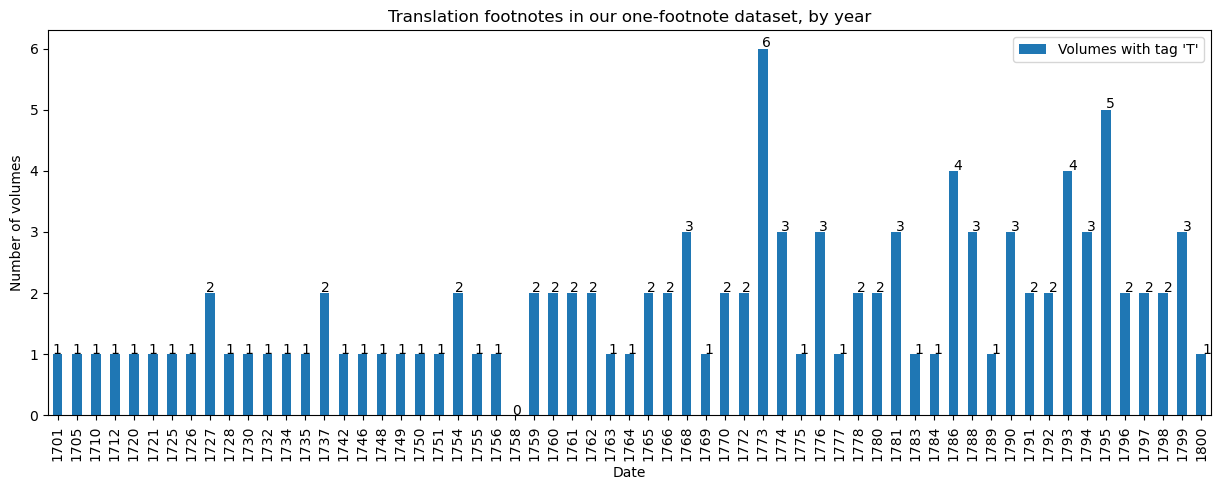

In [217]:
# Plot the nubmer of T tagged footnotes in each year
ax = translation_footnotes_df.groupby('Date')[['footnotes_present']].sum().plot(kind="bar", figsize=(15, 5), title="Translation footnotes in our one-footnote dataset, by year")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'T'"])

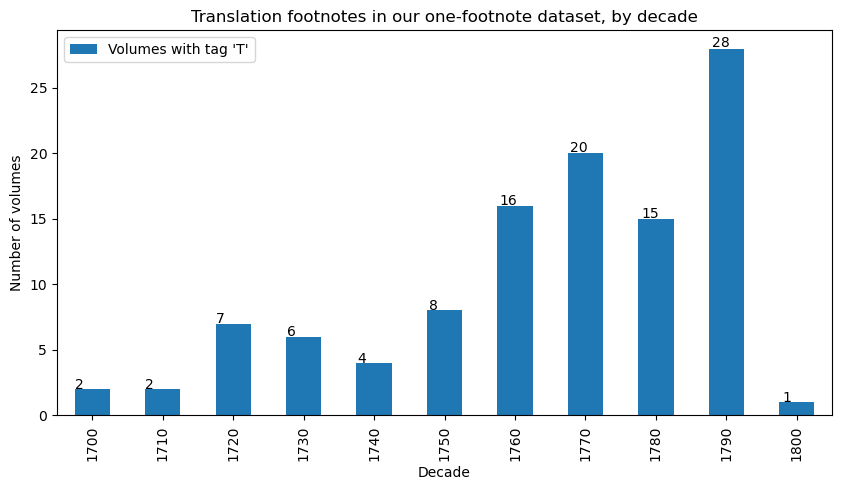

In [218]:
# Plot the nubmer of T tagged footnotes in each decade

ax = translation_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Translation footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'T'"])

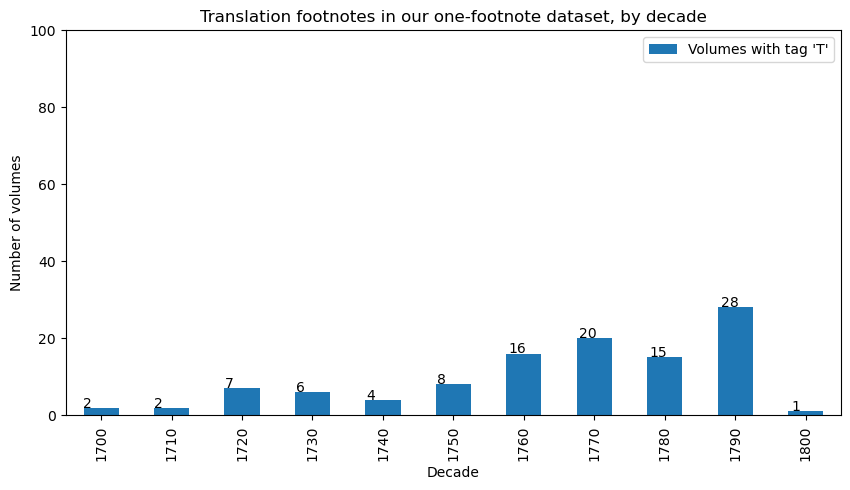

In [219]:
# Redo chart so that the axis range matches contextual footnotes
ax = translation_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Translation footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
ax.set_ylim(0, 100)
plt.legend(["Volumes with tag 'T'"])


### Statistical tests!

In [220]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dataset)
all_footnotes_by_decade = one_footnote_tagged_new_df.groupby('decade')[['tag']].count().reset_index()
#not_translation_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'T']
#not_translation_footnotes_by_decade = not_translation_footnotes_df.groupby('decade')[['tag']].count().reset_index()
translation_footnotes_by_decade = translation_footnotes_df.groupby('decade')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_T = pd.merge_ordered(all_footnotes_by_decade,translation_footnotes_by_decade, on='decade').fillna(0)


In [221]:
merged_T['ratio'] = merged_T['footnotes_present'] / merged_T['tag']
merged_T['volumes_with_footnotes/all_volumes'] = merged_T['footnotes_present'] / merged_T['tag']
merged_T

decade  tag  footnotes_present     ratio  \
0     1690    1                0.0  0.000000   
1     1700   20                2.0  0.100000   
2     1710   36                2.0  0.055556   
3     1720   54                7.0  0.129630   
4     1730   44                6.0  0.136364   
5     1740   75                4.0  0.053333   
6     1750  121                8.0  0.066116   
7     1760  184               16.0  0.086957   
8     1770  236               20.0  0.084746   
9     1780  255               15.0  0.058824   
10    1790  396               28.0  0.070707   
11    1800   62                1.0  0.016129   

    volumes_with_footnotes/all_volumes  
0                             0.000000  
1                             0.100000  
2                             0.055556  
3                             0.129630  
4                             0.136364  
5                             0.053333  
6                             0.066116  
7                             0.086957  
8                             0.084746  
9                             0.058824  
10                            0.070707  
11                            0.016129

In [222]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dateset)
all_footnotes_by_date = one_footnote_tagged_new_df.groupby('Date')[['tag']].count().reset_index()
translation_footnotes_by_date = translation_footnotes_df.groupby('Date')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_T_date = pd.merge_ordered(all_footnotes_by_date,translation_footnotes_by_date, on='Date').fillna(0)
merged_T_date['volumes_with_footnotes/all_volumes'] = merged_T_date['footnotes_present'] / merged_T_date['tag'] 
merged_T_date

Date  tag  footnotes_present  volumes_with_footnotes/all_volumes
0   1697    1                0.0                            0.000000
1   1701    2                1.0                            0.500000
2   1702    3                0.0                            0.000000
3   1703    2                0.0                            0.000000
4   1704    1                0.0                            0.000000
..   ...  ...                ...                                 ...
95  1796   51                2.0                            0.039216
96  1797   41                2.0                            0.048780
97  1798   35                2.0                            0.057143
98  1799   47                3.0                            0.063830
99  1800   62                1.0                            0.016129

[100 rows x 4 columns]

In [223]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_T_date['tag'], merged_T_date['footnotes_present'])

#print Pearson rank correlation and p-value
print("Correlation between NUMBER OF VOLUMES and NUMBER OF TRANSLATION FOOTNOTES (by year)")      
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between NUMBER OF VOLUMES and NUMBER OF TRANSLATION FOOTNOTES (by year)
Pearson rank correlation:
0.6097139269256125
p-value:
1.665292921087675e-11


In [224]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_T['tag'], merged_T['footnotes_present'])

#print Pearson rank correlation and p-value
print("Correlation between NUMBER OF VOLUMES and NUMBER OF TRANSLATION FOOTNOTES (by decade)")      
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between NUMBER OF VOLUMES and NUMBER OF TRANSLATION FOOTNOTES (by decade)
Pearson rank correlation:
0.9638388366135474
p-value:
4.582542266825464e-07


In [225]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_T['decade'], merged_T['volumes_with_footnotes/all_volumes'])

#print Pearson rank correlation and p-value
print("Correlation between DECADE and PROPORTION OF TRANSLATION FOOTNOTES")   
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between DECADE and PROPORTION OF TRANSLATION FOOTNOTES
Pearson rank correlation:
-0.13275656093795804
p-value:
0.6808509219004162


While the  Pearson rank correlation of -0.13275656093795804 indicates a very, very weak negative correlation, the 
p-value of 0.6808509219004162 is not <0.05, indicating that this is not a statistically significant correlation.

Here, the null test has failed to be rejected. This does not mean that translation footnotes keep pace with the number of volumes per year. See below for our piecewise analysis of the trend.


In [226]:
xtrain = merged_T['decade']
ytrain = merged_T['volumes_with_footnotes/all_volumes']
model = sm.Logit(ytrain, xtrain).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.107157
         Iterations 6


/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                   
==============================================================================================
Dep. Variable:     volumes_with_footnotes/all_volumes   No. Observations:                   12
Model:                                          Logit   Df Residuals:                       11
Method:                                           MLE   Df Model:                            0
Date:                                Fri, 28 Mar 2025   Pseudo R-squ.:                     inf
Time:                                        17:10:02   Log-Likelihood:                -1.2859
converged:                                       True   LL-Null:                        0.0000
Covariance Type:                            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
decade        -0.0015      0.001     -2.288      0.022      -0.003      -0.000
==============================================================================
"""

In [227]:
# Figure out what proportion of the larger population our subset is
proportion = merged_T['tag'].sum() / merged_T['footnotes_present'].sum()
proportion

13.614678899082568

In [228]:
# Let's run a chi2 goodness of fit test
#stats.chisquare(f_obs=merged_T['tag_y'], f_exp=merged_T['tag_x']/proportion)

### Translation footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade

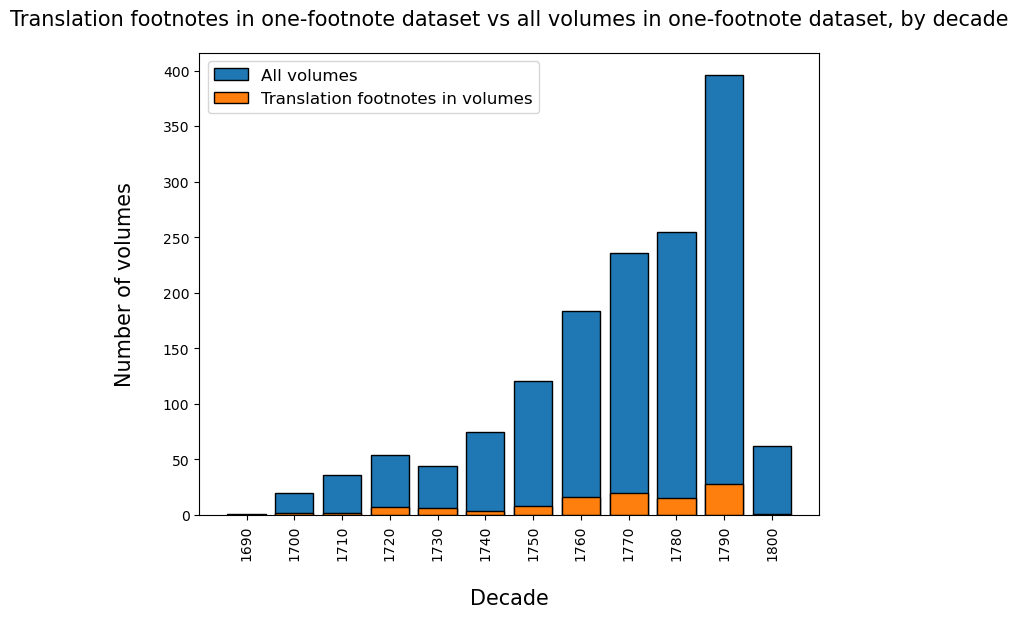

In [229]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

label = merged_T["decade"]

x = np.arange(len(label))

rect2 = ax.bar(x,
              merged_T["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax.bar(x,
              merged_T["footnotes_present"],
              label = "Translation footnotes in volumes",
              edgecolor = "black")

#add the labels to the axis
ax.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax.set_title("Translation footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)#add the legend
#using the labels of the bars
ax.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 10)


#### Ratios of translation footnotes to all volumes

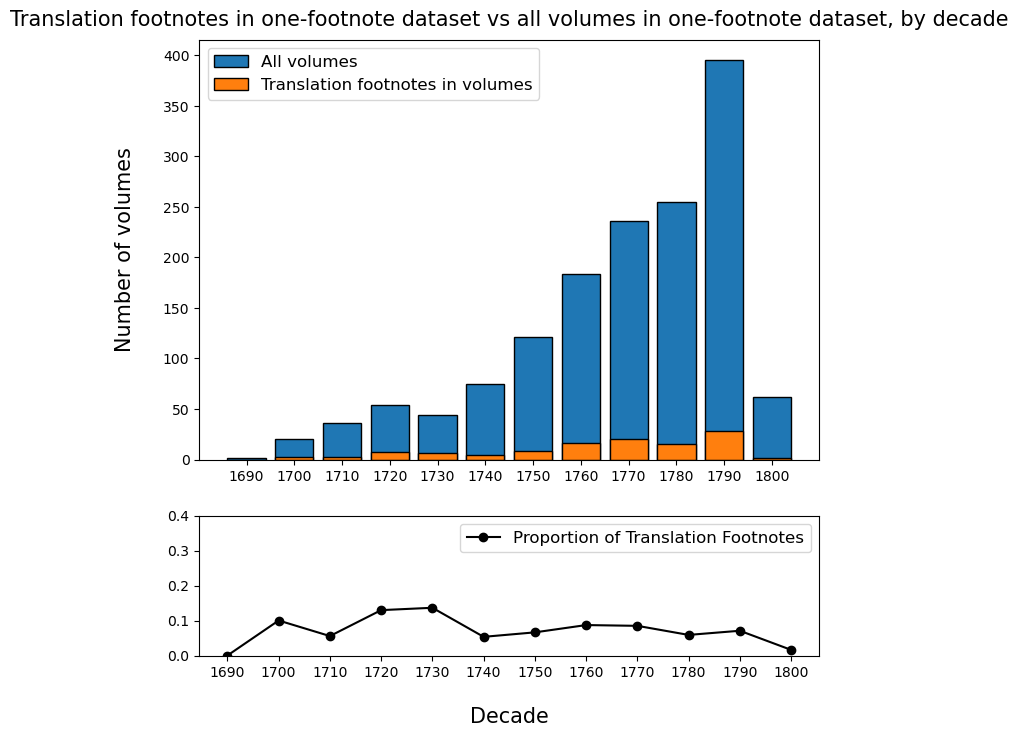

In [230]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (8,8))

label = merged_T["decade"]

x = np.arange(len(label))

rect2 = ax1.bar(x,
              merged_T["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax1.bar(x,
              merged_T["footnotes_present"],
              label = "Translation footnotes in volumes",
              edgecolor = "black")

rect3 = ax2.plot(x,
              merged_T["footnotes_present"]/merged_T["tag"],
              label = "Proportion of Translation Footnotes",
              marker="o",
              color="black",
              markeredgecolor="black")



#add the labels to the axis
ax1.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax2.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax1.set_title("Translation footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 10)
#set the ticks
ax1.set_xticks(x)
ax1.set_xticklabels(label)#add the legend
#using the labels of the bars
ax1.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax1.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)
ax1.tick_params(axis = "y",
              which = "both",
              labelsize = 10)
###
#add the labels to the axis

#set the ticks
ax2.set_xticks(x)
ax2.set_xticklabels(label)#add the legend
ax2.set_ylim(0, 0.4)
#using the labels of the bars
ax2.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax2.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)

0.01762430447207375

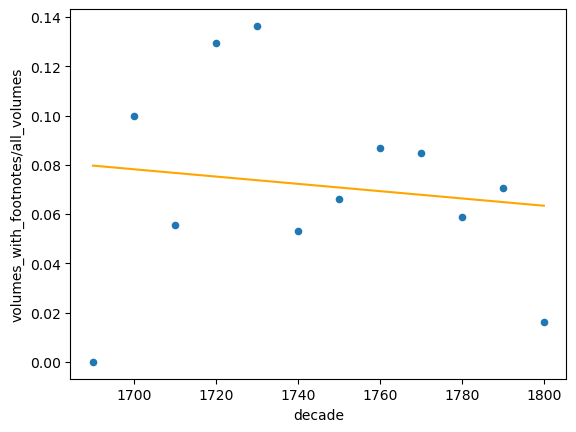

In [231]:
# Fitting a Linear Regression model to our data (binning by decade)
linear = LinearRegression()
linear.fit(merged_T[['decade']], merged_T['volumes_with_footnotes/all_volumes'])

# Creating a scatterplot of our data (in blue)
ax = merged_T.plot.scatter(x='decade', y='volumes_with_footnotes/all_volumes')

# Adding our plotted linear regression model (in orange)
ax.plot(merged_T['decade'], linear.predict(merged_T[['decade']]), c='orange')
linear.score(merged_T[['decade']], merged_T['volumes_with_footnotes/all_volumes'])

In [232]:

#define response variable
y = merged_T['volumes_with_footnotes/all_volumes']

#define predictor variables
x = merged_T[['decade']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     volumes_with_footnotes/all_volumes   R-squared:                       0.018
Model:                                            OLS   Adj. R-squared:                 -0.081
Method:                                 Least Squares   F-statistic:                    0.1794
Date:                                Fri, 28 Mar 2025   Prob (F-statistic):              0.681
Time:                                        17:10:04   Log-Likelihood:                 22.172
No. Observations:                                  12   AIC:                            -40.34
Df Residuals:                                      10   BIC:                            -39.37
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                 coef    std err          t      P

/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [233]:
#define response variable
y = merged_T_date['volumes_with_footnotes/all_volumes']

#define predictor variables
x = merged_T_date[['Date']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     volumes_with_footnotes/all_volumes   R-squared:                       0.002
Model:                                            OLS   Adj. R-squared:                 -0.008
Method:                                 Least Squares   F-statistic:                    0.1830
Date:                                Fri, 28 Mar 2025   Prob (F-statistic):              0.670
Time:                                        17:10:04   Log-Likelihood:                 93.976
No. Observations:                                 100   AIC:                            -184.0
Df Residuals:                                      98   BIC:                            -178.7
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                 coef    std err          t      P

In [234]:
#o          = rb.beast( merged_T['volumes_with_footnotes/all_volumes'], start=1690, deltat= 10, season='none')  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of translation footnotes per decade')
#rb.print(o)

In [235]:
#o          = rb.beast( merged_T_date['volumes_with_footnotes/all_volumes'], start=1690, season='none', period=1.0)  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of translation footnotes per year')
#rb.print(o)

In [236]:
x= list(merged_T['decade'])
y= list(merged_T['volumes_with_footnotes/all_volumes'])
pw_fit = piecewise_regression.Fit(x, y, n_breakpoints=1)
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       12
No. Model Parameters                    4
Degrees of Freedom                      8
Res. Sum of Squares            0.00837614
Total Sum of Squares            0.0177657
R Squared                        0.528522
Adjusted R Squared               0.259106
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                  -16.9         7.76      -2.1788         0.061      -34.786      0.98643
alpha1                  0.01      0.00458       2.1853        0.0604  -0.00055242     0.020552
beta1             -0.0106303      0.00459       -2.316             -    -0.021215  -4.5908e-05
breakpoint1          1700.99         3.93            -             -       1691.9       1710.1
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       12\nNo. Model Parameters                    4\nDegrees of Freedom                      8\nRes. Sum of Squares            0.00837614\nTotal Sum of Squares            0.0177657\nR Squared                        0.528522\nAdjusted R Squared               0.259106\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                  -16.9         7.76      -2.1788         0.061      -34.

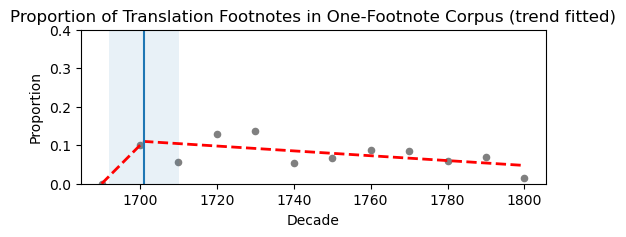

In [237]:
# Plot the data, fit, breakpoints and confidence intervals
plt.subplots(figsize=(6, 2))
pw_fit.plot_data(color="grey",  s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linestyle='dashed', linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Decade")
plt.ylabel("Proportion")
plt.ylim(0, 0.4)
plt.title("Proportion of Translation Footnotes in One-Footnote Corpus (trend fitted)")
plt.show()
plt.close()

### What are the titles of the works with translation footnotes?

In [238]:
print('Number of volumes with translation footnotes in our one-footnote dataset:')
translation_footnotes_df['Title'].count()

Number of volumes with translation footnotes in our one-footnote dataset:


109

In [239]:
print('Titles of volumes with translation footnotes (in our one-footnote dataset):')
translation_footnotes_df[['Title','Vol_Number']]

Titles of volumes with translation footnotes (in our one-footnote dataset):


Title Vol_Number
8     Galatea a pastoral romance; imitated from Cerv...          0
10    Lettres de Sophie et du Chevalier de **, pour ...   Volume 2
11    Les delices du sentiment; or the passionate lo...          0
12    Female banishment: or, the woman hater. Origin...   Volume 1
14    The illustrious French lovers; being the true ...   Volume 1
...                                                 ...        ...
1214  Arabian nights entertainments: consisting of o...   Volume 4
1241  The tusculan disputations of Marcus Tullius Ci...          0
1318  The indian cottage. By James Henry Bernardin d...          0
1336  A sentimental journey through France and Italy...   Volume 2
1468  The vicar of Wakefield, a tale supposed to be ...          0

[109 rows x 2 columns]

#### Export the list of filenames for translation footnotes

In [240]:
translation_footnotes_df['Filename'].to_csv('../translation_footnotes_filenames.csv')


### Genre terms in the Translation Footnote Titles
#### "Memoirs"

In [241]:
genre_term = "memoir|Memoir"
dataframe = translation_footnotes_df
corpus_name = "Translation Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_translation_memoirs = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir':
4
Percent of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir':
0.03669724770642202


#### "Letters"

In [242]:
genre_term = "letter|Letter|lettre|Lettre"
dataframe = translation_footnotes_df
corpus_name = "Translation Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_translation_letters = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
11
Percent of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
0.10091743119266056


#### "Novel"

In [243]:
genre_term = "novel|Novel|roman|Roman"
dataframe = translation_footnotes_df
corpus_name = "Translation Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
12
Percent of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
0.11009174311926606


#### "Tale"

In [244]:
genre_term = "tale|Tale|recit|Recit"
dataframe = translation_footnotes_df
corpus_name = "Translation Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_translation_tale = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
11
Percent of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
0.10091743119266056


#### "Romance"

In [245]:
genre_term = "romance|Romance"
dataframe = translation_footnotes_df
corpus_name = "Translation Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
5
Percent of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
0.045871559633027525


#### "History"

In [246]:
genre_term = "history|History|histories|Histories|histoire|Histoire"
dataframe = translation_footnotes_df
corpus_name = "Translation Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
31
Percent of volumes in the Translation Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
0.28440366972477066


In [247]:
# Proportions of Memoirs, Letters, Tales
proportions_translation = [proportion_translation_memoirs, proportion_translation_letters, proportion_translation_tale]
proportions_translation

[0.03669724770642202, 0.10091743119266056, 0.10091743119266056]

### Intertextual Footnotes

In [248]:
# Let's look at the 'IT' tag
intertextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'IT']

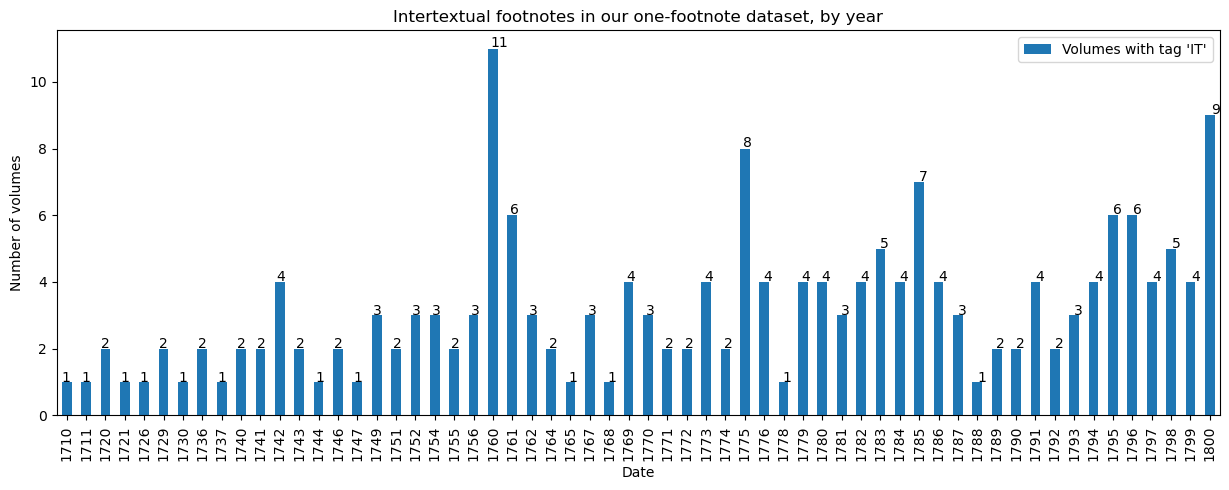

In [249]:
# Plot the nubmer of IT tagged footnotes in each year
ax = intertextual_footnotes_df.groupby('Date')[['footnotes_present']].sum().plot(kind="bar", figsize=(15, 5), title="Intertextual footnotes in our one-footnote dataset, by year")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'IT'"])

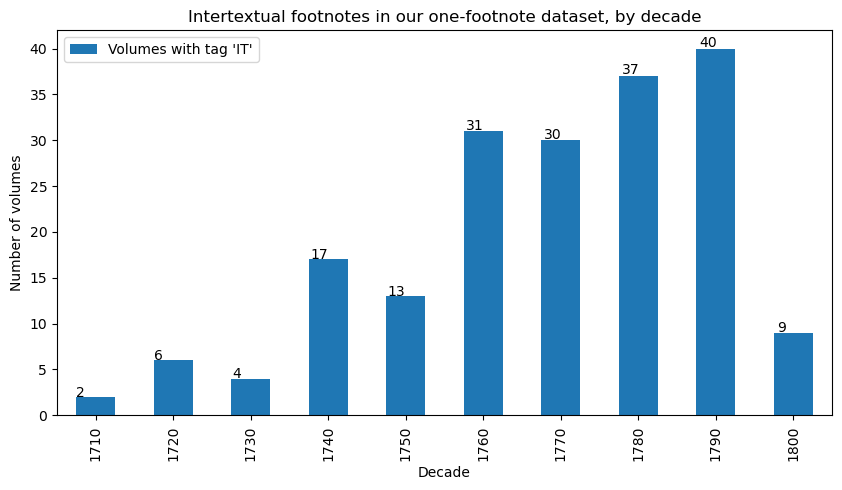

In [250]:
# Plot the nubmer of IT tagged footnotes in each decade

ax = intertextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Intertextual footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'IT'"])

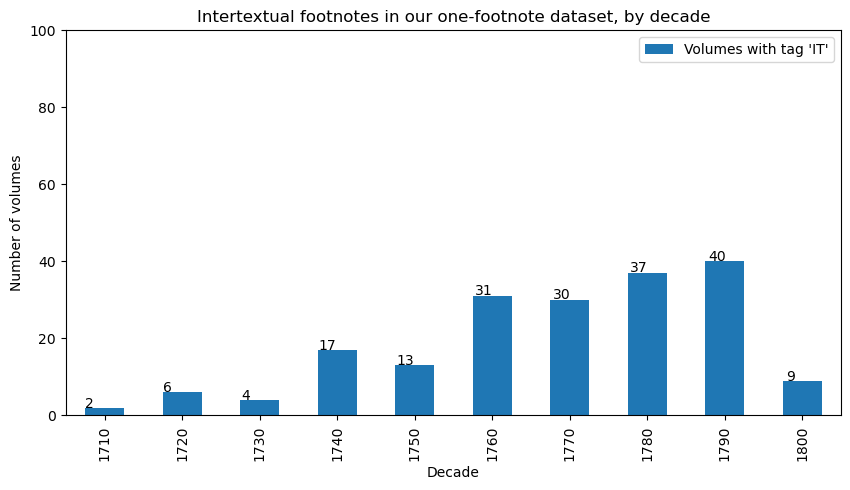

In [251]:
# Redo axis so it matches scale of contextual
ax = intertextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Intertextual footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
ax.set_ylim(0, 100)
plt.legend(["Volumes with tag 'IT'"])

### Statistical tests!

In [252]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dataset)
all_footnotes_by_decade = one_footnote_tagged_new_df.groupby('decade')[['tag']].count().reset_index()
#not_intertextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'IT']
#not_intertextual_footnotes_by_decade = not_intertextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
intertextual_footnotes_by_decade = intertextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_IT = pd.merge_ordered(all_footnotes_by_decade,intertextual_footnotes_by_decade, on='decade').fillna(0)


In [253]:
merged_IT['ratio'] = merged_IT['footnotes_present'] / merged_IT['tag']
merged_IT

decade  tag  footnotes_present     ratio
0     1690    1                0.0  0.000000
1     1700   20                0.0  0.000000
2     1710   36                2.0  0.055556
3     1720   54                6.0  0.111111
4     1730   44                4.0  0.090909
5     1740   75               17.0  0.226667
6     1750  121               13.0  0.107438
7     1760  184               31.0  0.168478
8     1770  236               30.0  0.127119
9     1780  255               37.0  0.145098
10    1790  396               40.0  0.101010
11    1800   62                9.0  0.145161

In [254]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dataset)
all_footnotes_by_date = one_footnote_tagged_new_df.groupby('Date')[['tag']].count().reset_index()
#not_intertextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'IT']
#not_intertextual_footnotes_by_decade = not_intertextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
intertextual_footnotes_by_date = intertextual_footnotes_df.groupby('Date')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_IT_date = pd.merge_ordered(all_footnotes_by_date,intertextual_footnotes_by_date, on='Date').fillna(0)
merged_IT_date['ratio'] = merged_IT_date['footnotes_present'] / merged_IT_date['tag']
merged_IT_date

Date  tag  footnotes_present     ratio
0   1697    1                0.0  0.000000
1   1701    2                0.0  0.000000
2   1702    3                0.0  0.000000
3   1703    2                0.0  0.000000
4   1704    1                0.0  0.000000
..   ...  ...                ...       ...
95  1796   51                6.0  0.117647
96  1797   41                4.0  0.097561
97  1798   35                5.0  0.142857
98  1799   47                4.0  0.085106
99  1800   62                9.0  0.145161

[100 rows x 4 columns]

In [255]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_IT['tag'], merged_IT['footnotes_present'])

#print Pearson rank correlation and p-value
print("Correlation between NUMBER OF VOLUMES and NUMBER OF INTERTEXUAL FOOTNOTES (by decade)")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between NUMBER OF VOLUMES and NUMBER OF INTERTEXUAL FOOTNOTES (by decade)
Pearson rank correlation:
0.947371250472528
p-value:
2.909949895016468e-06


In [256]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_IT_date['tag'], merged_IT_date['footnotes_present'])

#print Pearson rank correlation and p-value
print("Correlation between NUMBER OF VOLUMES and NUMBER OF INTERTEXUAL FOOTNOTES (by year)")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between NUMBER OF VOLUMES and NUMBER OF INTERTEXUAL FOOTNOTES (by year)
Pearson rank correlation:
0.7144346564218209
p-value:
7.05796926816569e-17


In [257]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
print("Correlation between DECADE and PROPORTION OF INTERTEXTUAL FOOTNOTES")
rho, p = pearsonr(merged_IT['decade'], merged_IT['ratio'])

#print Pearson rank correlation and p-value
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between DECADE and PROPORTION OF INTERTEXTUAL FOOTNOTES
Pearson rank correlation:
0.6396944201166889
p-value:
0.02508382719579203


In [258]:
xtrain = merged_IT['decade']
ytrain = merged_IT['ratio']
model = sm.Logit(ytrain, xtrain).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.177513
         Iterations 5


/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   12
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            0
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                     inf
Time:                        17:10:11   Log-Likelihood:                -2.1302
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
decade        -0.0012      0.001     -2.271      0.023      -0.002      -0.000
==============================================================================
"""

In [259]:
# Figure out what proportion of the larger population our subset is
proportion = merged_IT['tag'].sum() / merged_IT['footnotes_present'].sum()
proportion

7.851851851851852

In [260]:
# Let's run a chi2 goodness of fit test
#stats.chisquare(f_obs=merged_IT['tag_y'], f_exp=merged_IT['tag_x']/proportion)

In [261]:
#stats.ttest_ind(merged_IT['tag_y'],merged_IT['tag_x'])

### Intertextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade

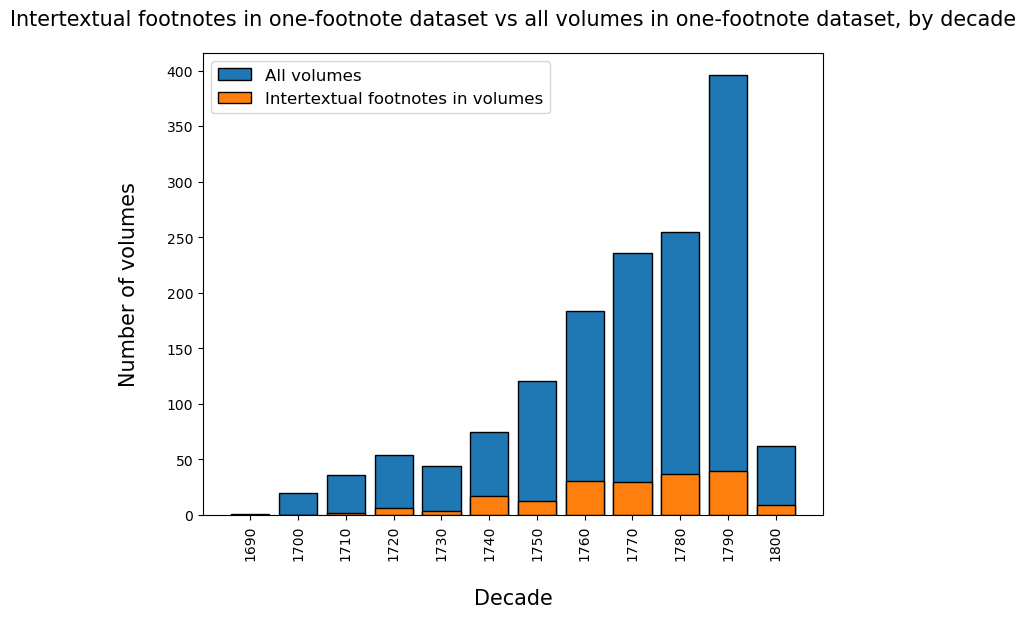

In [262]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

label = merged_IT["decade"]

x = np.arange(len(label))

rect2 = ax.bar(x,
              merged_IT["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax.bar(x,
              merged_IT["footnotes_present"],
              label = "Intertextual footnotes in volumes",
              edgecolor = "black")

#add the labels to the axis
ax.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax.set_title("Intertextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)#add the legend
#using the labels of the bars
ax.legend(#title = "Legend",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 10)

### Ratios of intertextual footnotes to all volumes

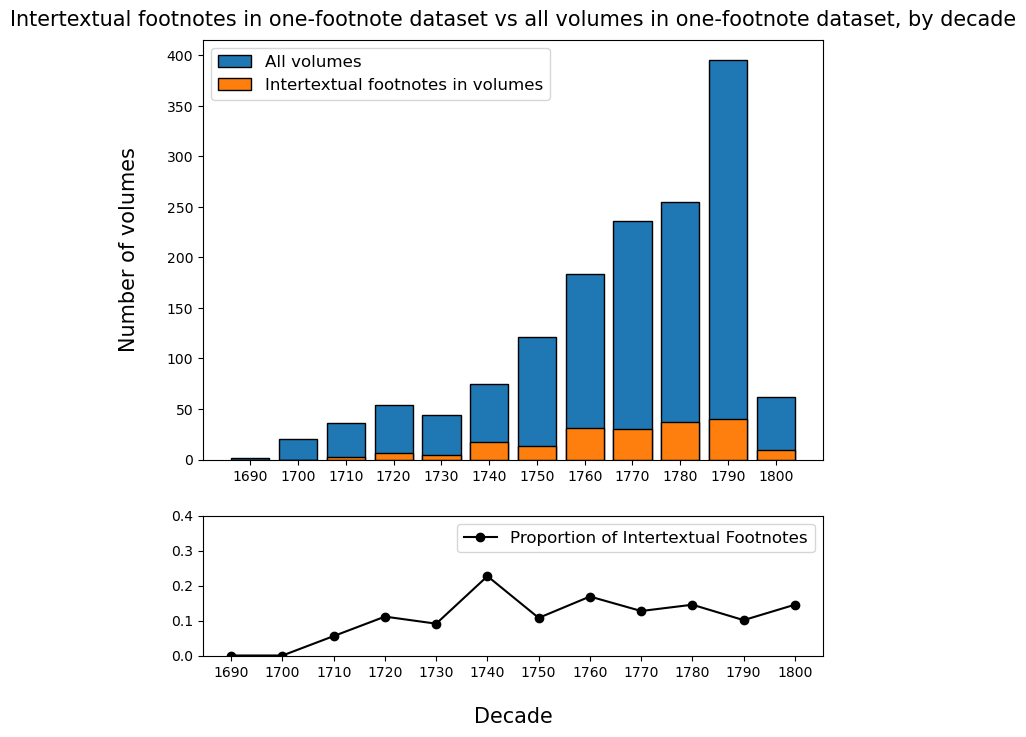

In [263]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (8,8))

label = merged_IT["decade"]

x = np.arange(len(label))

rect2 = ax1.bar(x,
              merged_IT["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax1.bar(x,
              merged_IT["footnotes_present"],
              label = "Intertextual footnotes in volumes",
              edgecolor = "black")

rect3 = ax2.plot(x,
              merged_IT["footnotes_present"]/merged_IT["tag"],
              label = "Proportion of Intertextual Footnotes",
              marker="o",
              color="black",
              markeredgecolor="black")

#add the labels to the axis
ax1.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax2.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax1.set_title("Intertextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 10)
#set the ticks
ax1.set_xticks(x)
ax1.set_xticklabels(label)#add the legend
#using the labels of the bars
ax1.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax1.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)
ax1.tick_params(axis = "y",
              which = "both",
              labelsize = 10)
###
#add the labels to the axis

#set the ticks
ax2.set_xticks(x)
ax2.set_xticklabels(label)#add the legend
ax2.set_ylim(0, 0.4)

#using the labels of the bars
ax2.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax2.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)


0.40920895112842604

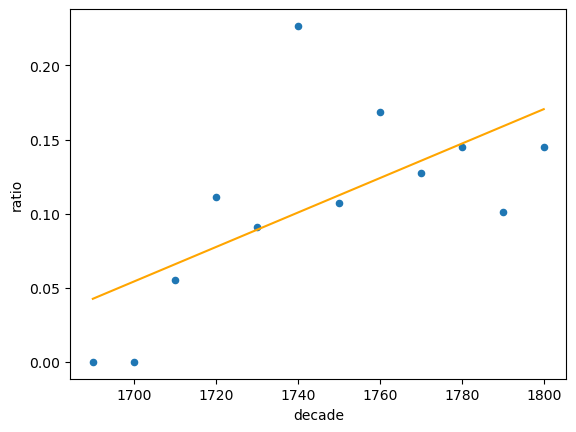

In [264]:
# Fitting a Linear Regression model to our data (binning by decade)
linear = LinearRegression()
linear.fit(merged_IT[['decade']], merged_IT['ratio'])

# Creating a scatterplot of our data (in blue)
ax = merged_IT.plot.scatter(x='decade', y='ratio')

# Adding our plotted linear regression model (in orange)
ax.plot(merged_IT['decade'], linear.predict(merged_IT[['decade']]), c='orange')
linear.score(merged_IT[['decade']], merged_IT['ratio'])

In [265]:
#define response variable
y = merged_IT['ratio']

#define predictor variables
x = merged_IT[['decade']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     6.926
Date:                Fri, 28 Mar 2025   Prob (F-statistic):             0.0251
Time:                        17:10:13   Log-Likelihood:                 19.352
No. Observations:                  12   AIC:                            -34.70
Df Residuals:                      10   BIC:                            -33.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9229      0.771     -2.493      0.0

/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [266]:
#o          = rb.beast( merged_IT['ratio'], start=1690, deltat= 10, season='none')  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of intertextual footnotes per decade')
#rb.print(o)

In [267]:
#o          = rb.beast( merged_IT_date['ratio'], start=1690, season='none', period=1.0)  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of intertextual footnotes per year')
#rb.print(o)

In [268]:
x= list(merged_IT['decade'])
y= list(merged_IT['ratio'])
pw_fit = piecewise_regression.Fit(x, y, n_breakpoints=2)
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       12
No. Model Parameters                    6
Degrees of Freedom                      6
Res. Sum of Squares             0.0133366
Total Sum of Squares            0.0472661
R Squared                        0.717841
Adjusted R Squared               0.379249
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const           -1.91306e-14         11.3  -1.6928e-15           1.0      -27.654       27.654
alpha1           1.13068e-17      0.00667   1.6958e-15           1.0    -0.016315     0.016315
beta1             0.00555556      0.00943      0.58918             -    -0.017517     0.028628
beta2            -0.00576615      0.00671     -0.85971             -    -0.022178     0.010645
breakpoint1      

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       12\nNo. Model Parameters                    6\nDegrees of Freedom                      6\nRes. Sum of Squares             0.0133366\nTotal Sum of Squares            0.0472661\nR Squared                        0.717841\nAdjusted R Squared               0.379249\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst           -1.91306e-14         11.3  -1.6928e-15           1.0      -27.

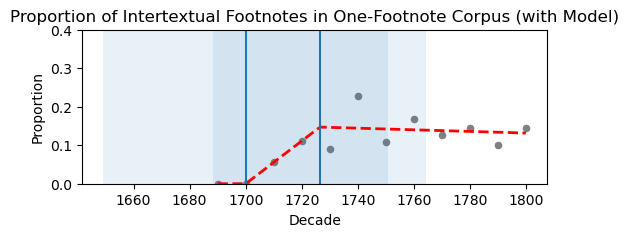

In [269]:
# Plot the data, fit, breakpoints and confidence intervals
plt.subplots(figsize=(6, 2))
pw_fit.plot_data(color="grey",  s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linestyle='dashed', linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Decade")
plt.ylabel("Proportion")
plt.ylim(0, 0.4)
plt.title("Proportion of Intertextual Footnotes in One-Footnote Corpus (with Model)")
plt.show()
plt.close()

In [270]:
x= list(merged_IT['decade'][1:])
y= list(merged_IT['ratio'][1:])
pw_fit = piecewise_regression.Fit(x, y, n_breakpoints=1)
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       11
No. Model Parameters                    4
Degrees of Freedom                      7
Res. Sum of Squares             0.0133366
Total Sum of Squares            0.0348822
R Squared                        0.617668
Adjusted R Squared               0.362779
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -9.44444         5.28      -1.7894         0.117      -21.925       3.0358
alpha1            0.00555556      0.00309          1.8         0.115   -0.0017427     0.012854
beta1            -0.00576615      0.00316      -1.8253             -    -0.013236    0.0017039
breakpoint1          1726.48         11.1            -             -       1700.1       1752.8
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       11\nNo. Model Parameters                    4\nDegrees of Freedom                      7\nRes. Sum of Squares             0.0133366\nTotal Sum of Squares            0.0348822\nR Squared                        0.617668\nAdjusted R Squared               0.362779\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst               -9.44444         5.28      -1.7894         0.117      -21.

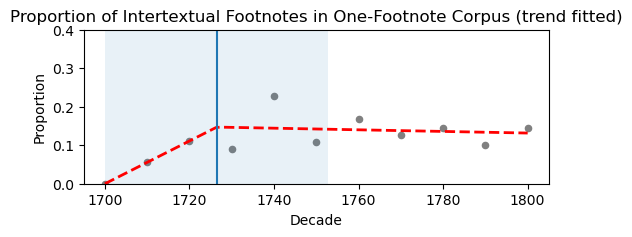

In [271]:
# Plot the data, fit, breakpoints and confidence intervals
plt.subplots(figsize=(6, 2))
pw_fit.plot_data(color="grey",  s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linestyle='dashed', linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Decade")
plt.ylabel("Proportion")
plt.ylim(0, 0.4)
plt.title("Proportion of Intertextual Footnotes in One-Footnote Corpus (trend fitted)")
plt.show()
plt.close()

### What are the titles of the works with intertextual footnotes?

In [272]:
print('Number of volumes with intertextual footnotes in our one-footnote dataset:')
intertextual_footnotes_df['Title'].count()

Number of volumes with intertextual footnotes in our one-footnote dataset:


185

In [273]:
print('Titles of volumes with intertextual footnotes (in our one-footnote dataset):')
intertextual_footnotes_df[['Title','Vol_Number']]

Titles of volumes with intertextual footnotes (in our one-footnote dataset):


Title Vol_Number
0     Prince Arthur: an allegorical romance. The sto...   Volume 1
11    Les delices du sentiment; or the passionate lo...          0
19               Pigmalion, ou la statue anim<c3><a9>e.          0
25    The confessions of James Baptiste Couteau, cit...   Volume 2
30    The farmer's son of Kent. A tale. In two volum...   Volume 2
...                                                 ...        ...
1438  Letters of the late Lord Lyttleton. In two vol...   Volume 1
1458  Les confessions d'une courtisane devenue philo...          0
1462  The trial of a student at the College of Cluth...          0
1466  The history of Tom Jones, a foundling. By Henr...   Volume 2
1477  Relation d'une insigne imposture litt<c3><a9>r...          0

[185 rows x 2 columns]

#### Export the list of filenames for intertextual footnotes

In [274]:
intertextual_footnotes_df['Filename'].to_csv('../intertextual_footnotes_filenames.csv')


### Genre terms in the Intertextual Footnote Titles
#### "Memoirs"

In [275]:
genre_term = "memoir|Memoir"
dataframe = intertextual_footnotes_df
corpus_name = "Intertextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_intertextual_memoirs = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir':
8
Percent of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir':
0.043243243243243246


#### "Letters"

In [276]:
genre_term = "letter|Letter|lettre|Lettre"
dataframe = intertextual_footnotes_df
corpus_name = "Intertextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_intertextual_letters = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
29
Percent of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
0.15675675675675677


#### "Novel"

In [277]:
genre_term = "novel|Novel|roman|Roman"
dataframe = intertextual_footnotes_df
corpus_name = "Intertextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
11
Percent of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
0.05945945945945946


#### "Tale"

In [278]:
genre_term = "tale|Tale|recit|Recit"
dataframe = intertextual_footnotes_df
corpus_name = "Intertextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_intertextual_tale = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
15
Percent of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
0.08108108108108109


#### "Romance"

In [279]:
genre_term = "romance|Romance"
dataframe = intertextual_footnotes_df
corpus_name = "Intertextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
4
Percent of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
0.021621621621621623


#### "History"

In [280]:
genre_term = "history|History|histories|Histories|histoire|Histoire"
dataframe = intertextual_footnotes_df
corpus_name = "Intertextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
29
Percent of volumes in the Intertextual Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
0.15675675675675677


In [281]:
# Proportions of Memoirs, Letters, Tales
proportions_intertextual = [proportion_intertextual_memoirs, proportion_intertextual_letters, proportion_intertextual_tale]
proportions_intertextual

[0.043243243243243246, 0.15675675675675677, 0.08108108108108109]

### Intratextual Footnotes

In [282]:
# Let's look at the 'IN' tag
intratextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'IN']

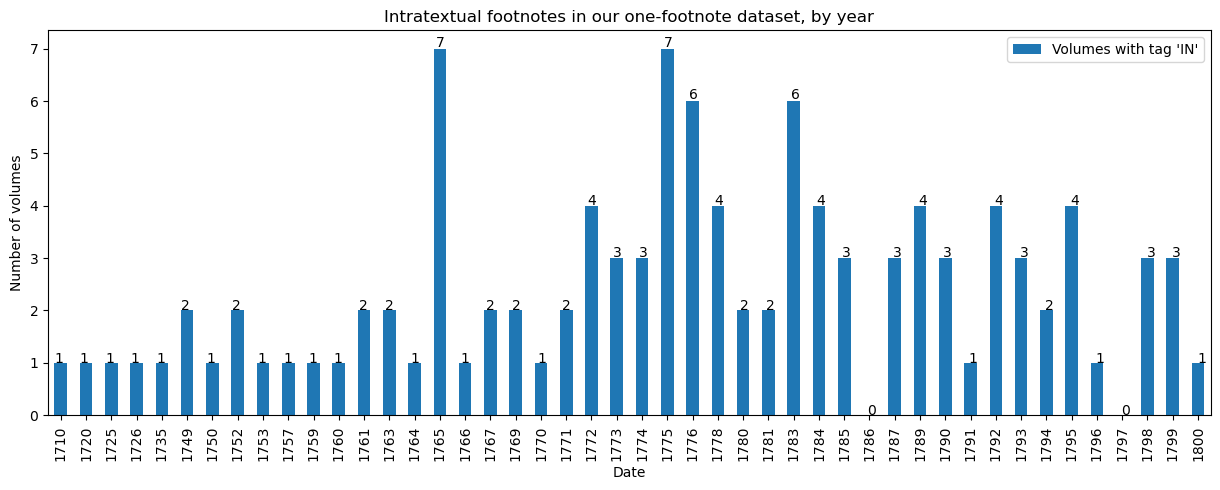

In [283]:
# Plot the nubmer of IT tagged footnotes in each year
ax = intratextual_footnotes_df.groupby('Date')[['footnotes_present']].sum().plot(kind="bar", figsize=(15, 5), title="Intratextual footnotes in our one-footnote dataset, by year")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'IN'"])

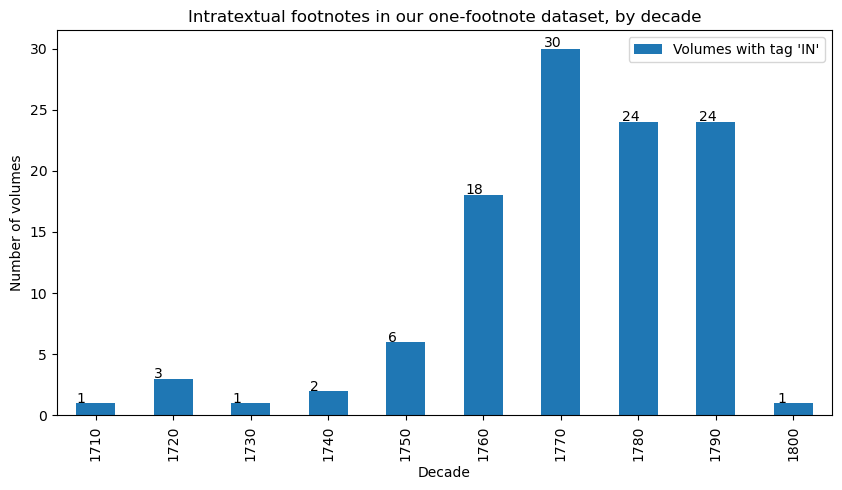

In [284]:
# Plot the nubmer of IN tagged footnotes in each decade

ax = intratextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Intratextual footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'IN'"])

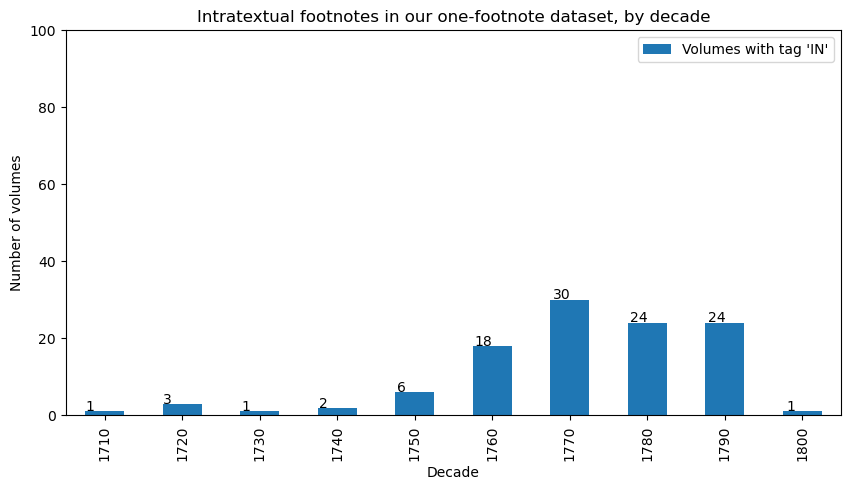

In [285]:
ax = intratextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Intratextual footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
ax.set_ylim(0,100)
plt.legend(["Volumes with tag 'IN'"])

### Statistical tests!

In [286]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dataset)
all_footnotes_by_decade = one_footnote_tagged_new_df.groupby('decade')[['tag']].count().reset_index()
#not_intratextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'IN']
#not_intratextual_footnotes_by_decade = not_intratextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
intratextual_footnotes_by_decade = intratextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_IN = pd.merge_ordered(all_footnotes_by_decade,intratextual_footnotes_by_decade, on='decade').fillna(0)

In [287]:
merged_IN['ratio'] = merged_IN['footnotes_present'] / merged_IN['tag']
merged_IN

decade  tag  footnotes_present     ratio
0     1690    1                0.0  0.000000
1     1700   20                0.0  0.000000
2     1710   36                1.0  0.027778
3     1720   54                3.0  0.055556
4     1730   44                1.0  0.022727
5     1740   75                2.0  0.026667
6     1750  121                6.0  0.049587
7     1760  184               18.0  0.097826
8     1770  236               30.0  0.127119
9     1780  255               24.0  0.094118
10    1790  396               24.0  0.060606
11    1800   62                1.0  0.016129

In [288]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dataset)
all_footnotes_by_date = one_footnote_tagged_new_df.groupby('Date')[['tag']].count().reset_index()
#not_intertextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'IT']
#not_intertextual_footnotes_by_decade = not_intertextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
intratextual_footnotes_by_date = intratextual_footnotes_df.groupby('Date')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_IN_date = pd.merge_ordered(all_footnotes_by_date,intratextual_footnotes_by_date, on='Date').fillna(0)
merged_IN_date['ratio'] = merged_IN_date['footnotes_present'] / merged_IN_date['tag']
merged_IN_date

Date  tag  footnotes_present     ratio
0   1697    1                0.0  0.000000
1   1701    2                0.0  0.000000
2   1702    3                0.0  0.000000
3   1703    2                0.0  0.000000
4   1704    1                0.0  0.000000
..   ...  ...                ...       ...
95  1796   51                1.0  0.019608
96  1797   41                0.0  0.000000
97  1798   35                3.0  0.085714
98  1799   47                3.0  0.063830
99  1800   62                1.0  0.016129

[100 rows x 4 columns]

In [289]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_IN['tag'], merged_IN['footnotes_present'])

#print Pearson rank correlation and p-value
print("Correlation between NUMBER OF VOLUMES and NUMBER OF INTRATEXUAL FOOTNOTES (by decade)")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between NUMBER OF VOLUMES and NUMBER OF INTRATEXUAL FOOTNOTES (by decade)
Pearson rank correlation:
0.9060555629281141
p-value:
4.9131974916967076e-05


In [290]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_IN_date['tag'], merged_IN_date['footnotes_present'])

#print Pearson rank correlation and p-value
print("Correlation between NUMBER OF VOLUMES and NUMBER OF INTRATEXUAL FOOTNOTES (by year)")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between NUMBER OF VOLUMES and NUMBER OF INTRATEXUAL FOOTNOTES (by year)
Pearson rank correlation:
0.5810292125489733
p-value:
2.333096080802051e-10


In [291]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_IN['decade'], merged_IN['ratio'])

#print Pearson rank correlation and p-value
print("Correlation between DECADE and PROPORTION OF OF INTRATEXUAL FOOTNOTES")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between DECADE and PROPORTION OF OF INTRATEXUAL FOOTNOTES
Pearson rank correlation:
0.5555841129625906
p-value:
0.0607305109077798


In [292]:
# Figure out what proportion of the larger population our subset is
proportion = merged_IN['tag'].sum() / merged_IN['footnotes_present'].sum()
proportion

13.49090909090909

In [293]:
# Let's run a chi2 goodness of fit test
#stats.chisquare(f_obs=merged_IN['tag_y'], f_exp=merged_IN['tag_x']/proportion)

In [294]:
xtrain = merged_IN['decade']
ytrain = merged_IN['ratio']
model = sm.Logit(ytrain, xtrain).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.067317
         Iterations 6


/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   12
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            0
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                     inf
Time:                        17:10:20   Log-Likelihood:               -0.80781
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
decade        -0.0017      0.001     -2.215      0.027      -0.003      -0.000
==============================================================================
"""

### Intratextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade 

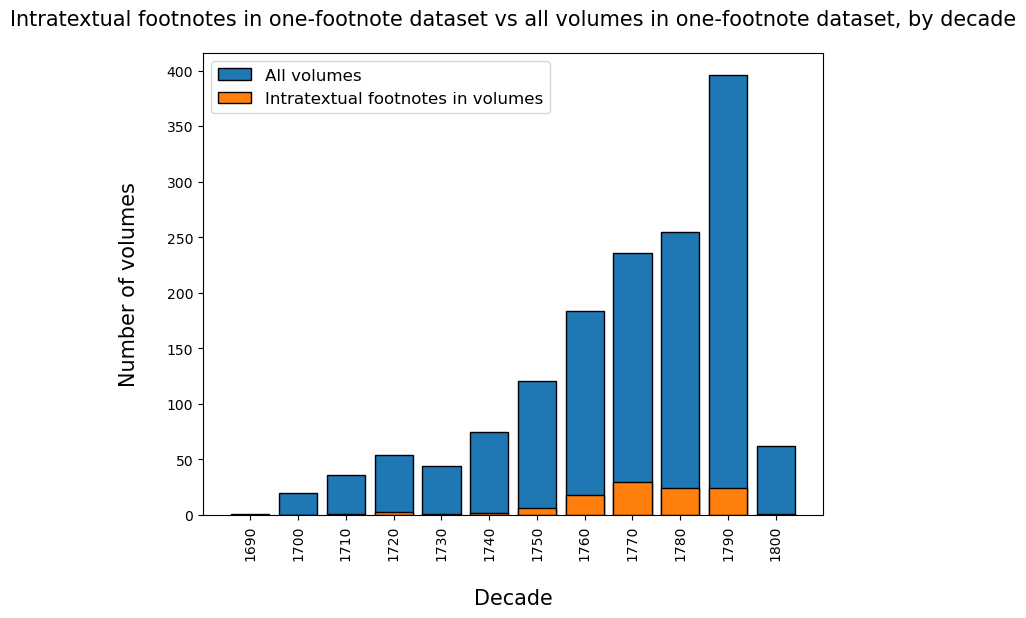

In [295]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

label = merged_IN["decade"]

x = np.arange(len(label))

rect2 = ax.bar(x,
              merged_IN["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax.bar(x,
              merged_IN["footnotes_present"],
              label = "Intratextual footnotes in volumes",
              edgecolor = "black")


#add the labels to the axis
ax.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax.set_title("Intratextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)#add the legend
#using the labels of the bars
ax.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 10)

### Ratio of intratextual footnotes to all volumes

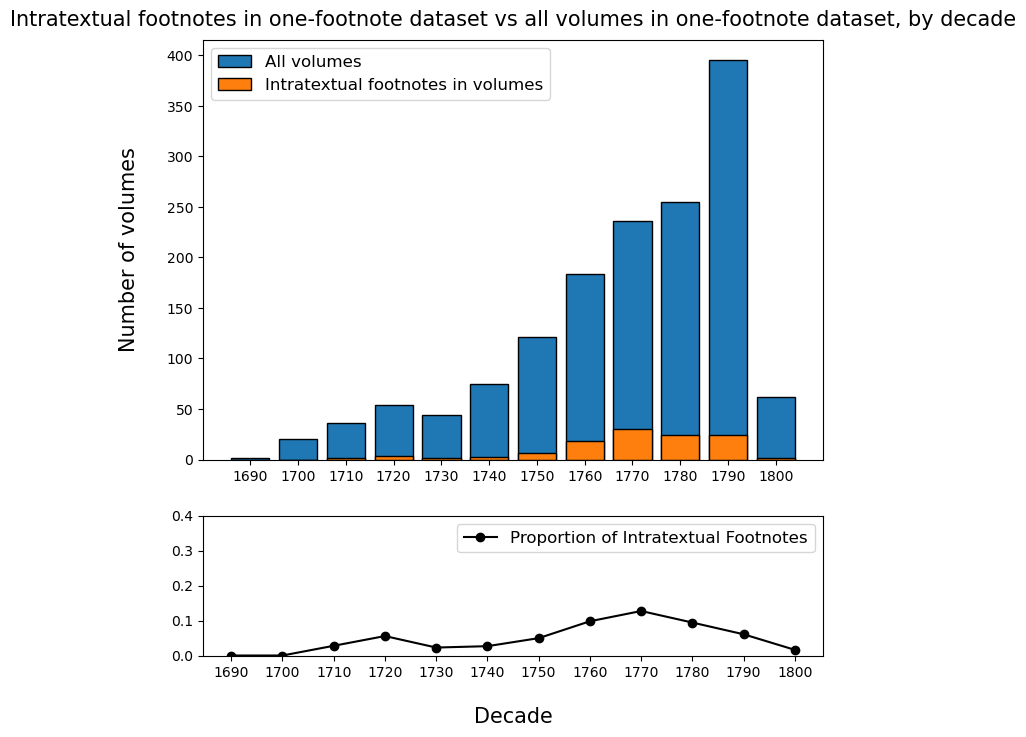

In [296]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (8,8))

label = merged_IN["decade"]

x = np.arange(len(label))



rect2 = ax1.bar(x,
              merged_IN["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax1.bar(x,
              merged_IN["footnotes_present"],
              label = "Intratextual footnotes in volumes",
              edgecolor = "black")

rect3 = ax2.plot(x,
              merged_IN["footnotes_present"]/merged_IN["tag"],
              label = "Proportion of Intratextual Footnotes",
              marker="o",
              color="black",
              markeredgecolor="black")


#add the labels to the axis
ax1.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax2.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax1.set_title("Intratextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 10)
#set the ticks
ax1.set_xticks(x)
ax1.set_xticklabels(label)#add the legend
#using the labels of the bars
ax1.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax1.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)
ax1.tick_params(axis = "y",
              which = "both",
              labelsize = 10)
###
#add the labels to the axis

#set the ticks
ax2.set_xticks(x)
ax2.set_xticklabels(label)#add the legend
ax2.set_ylim(0, 0.4)

#using the labels of the bars
ax2.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax2.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)


0.308673706576428

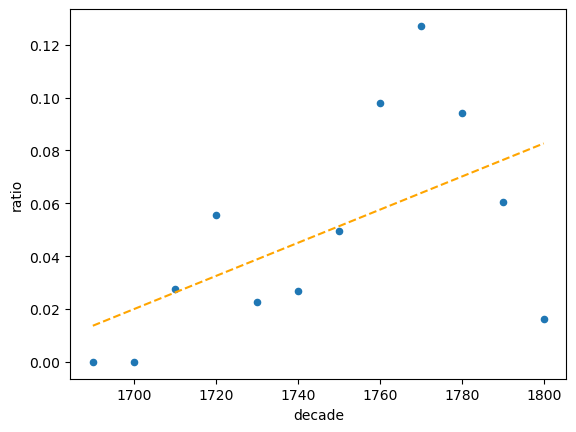

In [297]:
# Fitting a Linear Regression model to our data (binning by decade)
linear = LinearRegression()
linear.fit(merged_IN[['decade']], merged_IN['ratio'])

# Creating a scatterplot of our data (in blue)
ax = merged_IN.plot.scatter(x='decade', y='ratio')

# Adding our plotted linear regression model (in orange)
ax.plot(merged_IN['decade'], linear.predict(merged_IN[['decade']]), linestyle='dashed', c='orange')
linear.score(merged_IN[['decade']], merged_IN['ratio'])

In [298]:
#o          = rb.beast( merged_IN['ratio'], start=1690, deltat= 10, season='none')  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of intratextual footnotes per decade')
#rb.print(o)

In [299]:
#o          = rb.beast( merged_IN_date['ratio'], start=1690, season='none', period=1.0)  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of intratextual footnotes per year')
#rb.print(o)

In [300]:
x= list(merged_IN['decade'])
y= list(merged_IN['ratio'])
pw_fit = piecewise_regression.Fit(x, y, n_breakpoints=1)
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       12
No. Model Parameters                    4
Degrees of Freedom                      8
Res. Sum of Squares            0.00374863
Total Sum of Squares            0.0182139
R Squared                        0.794188
Adjusted R Squared               0.676582
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -2.30952        0.484      -4.7765        0.0014      -3.4245      -1.1945
alpha1            0.00136114     0.000279       4.8706       0.00124   0.00071671    0.0020056
beta1            -0.00526057      0.00156      -3.3809             -   -0.0088486   -0.0016725
breakpoint1           1776.7         5.35            -             -       1764.4       1789.0
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       12\nNo. Model Parameters                    4\nDegrees of Freedom                      8\nRes. Sum of Squares            0.00374863\nTotal Sum of Squares            0.0182139\nR Squared                        0.794188\nAdjusted R Squared               0.676582\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst               -2.30952        0.484      -4.7765        0.0014      -3.4

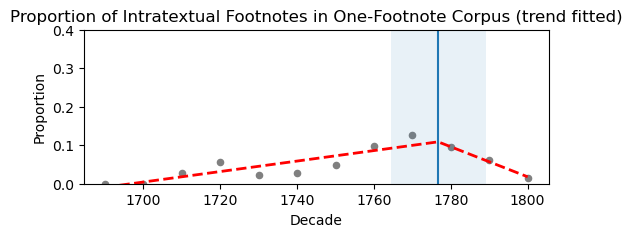

In [301]:
# Plot the data, fit, breakpoints and confidence intervals
plt.subplots(figsize=(6, 2))
pw_fit.plot_data(color="grey",  s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linestyle='dashed', linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Decade")
plt.ylabel("Proportion")
plt.ylim(0, 0.4)
plt.title("Proportion of Intratextual Footnotes in One-Footnote Corpus (trend fitted)")
plt.show()
plt.close()

### What are the titles of the works with intratextual footnotes?

In [302]:
print('Number of volumes with intratextual footnotes in our one-footnote dataset:')
intratextual_footnotes_df['Title'].count()

Number of volumes with intratextual footnotes in our one-footnote dataset:


116

In [303]:
print('Titles of volumes with intratextual footnotes (in our one-footnote dataset):')
intratextual_footnotes_df[['Title','Vol_Number']]

Titles of volumes with intratextual footnotes (in our one-footnote dataset):


Title Vol_Number
49    The life and strange surprising adventures of ...   Volume 2
54    Opuscule d'un c<c3><a9>l<c3><a9>bre auteur Egy...          0
89    L'art de corriger et de rendre les hommes cons...          0
113   The invasion; or, what might have been. A nove...   Volume 1
130   Delia, a pathetic and interesting tale. In Fou...   Volume 2
...                                                 ...        ...
1406  Frederica: or the memoirs of a young lady. A n...   Volume 2
1413  The history of Miss Melmoth. In two volumes. B...   Volume 1
1426                  Emma Corbett. In two volumes. ...   Volume 2
1438  Letters of the late Lord Lyttleton. In two vol...   Volume 1
1449                                The adventurer. ...   Volume 1

[116 rows x 2 columns]

#### Export the list of filenames for intraxtual footnotes

In [304]:
intratextual_footnotes_df['Filename'].to_csv('../intratextual_footnotes_filenames.csv')


### Genre terms in the Intratextual Footnote Titles
#### "Memoirs"

In [305]:
genre_term = "memoir|Memoir"
dataframe = intratextual_footnotes_df
corpus_name = "Intratextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_intratextual_memoirs = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir':
11
Percent of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir':
0.09482758620689655


#### "Letters"

In [306]:
genre_term = "letter|Letter|lettre|Lettre"
dataframe = intratextual_footnotes_df
corpus_name = "Intratextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_intratextual_letters = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
28
Percent of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
0.2413793103448276


#### "Novel"

In [307]:
genre_term = "novel|Novel|roman|Roman"
dataframe = intratextual_footnotes_df
corpus_name = "Intratextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
17
Percent of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
0.14655172413793102


#### "Tale"

In [308]:
genre_term = "tale|Tale|recit|Recit"
dataframe = intratextual_footnotes_df
corpus_name = "Intratextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_intratextual_tale = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
4
Percent of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
0.034482758620689655


#### "Romance"

In [309]:
genre_term = "romance|Romance"
dataframe = intratextual_footnotes_df
corpus_name = "Intratextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
3
Percent of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
0.02586206896551724


#### "History"

In [310]:
genre_term = "history|History|histories|Histories|histoire|Histoire"
dataframe = intratextual_footnotes_df
corpus_name = "Intratextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
27
Percent of volumes in the Intratextual Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
0.23275862068965517


In [311]:
# Proportions of Memoirs, Letters, Tales
proportions_intratextual = [proportion_intratextual_memoirs, proportion_intratextual_letters, proportion_intratextual_tale]
proportions_intratextual

[0.09482758620689655, 0.2413793103448276, 0.034482758620689655]

### Metatextual Footnotes

In [312]:
# Let's look at just the MT tags
metatextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'MT']

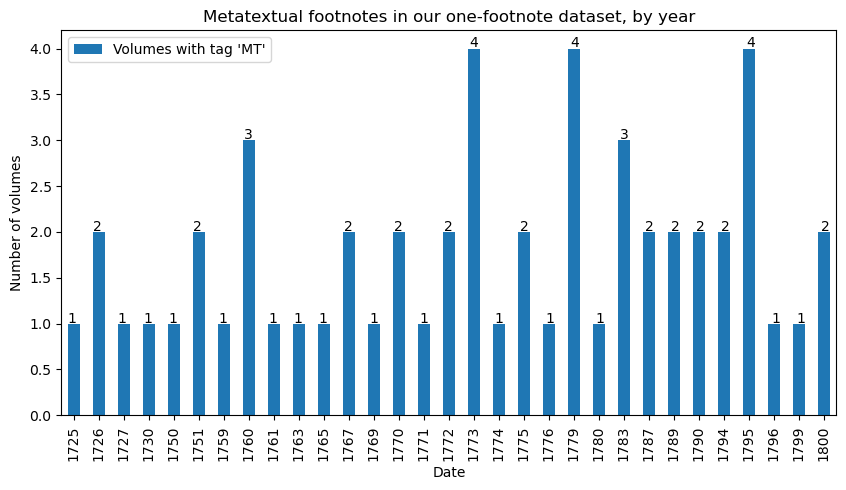

In [313]:
# Plot the nubmer of MT tagged footnotes in each year
ax = metatextual_footnotes_df.groupby('Date')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Metatextual footnotes in our one-footnote dataset, by year")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Date")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'MT'"])

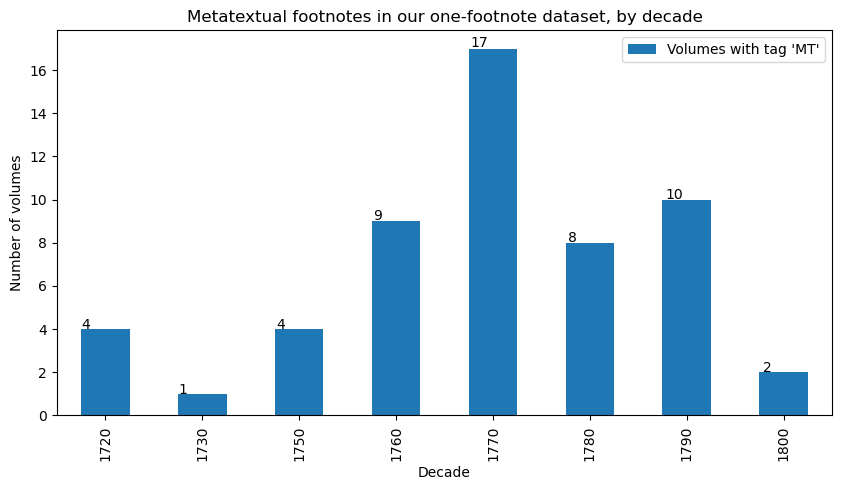

In [314]:
# Plot the number of MT tagged footnotes in each decade
ax = metatextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Metatextual footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'MT'"])

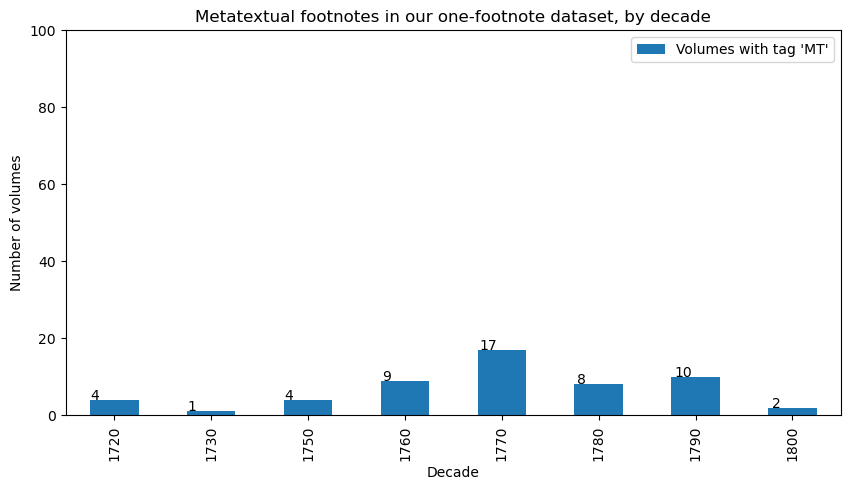

In [315]:
# Redo so scale matches contextual
ax = metatextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().plot(kind="bar", figsize=(10, 5), title="Metatextual footnotes in our one-footnote dataset, by decade")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
ax.set_ylim(0,100)
plt.legend(["Volumes with tag 'MT'"])

### Let's run a statistical test on these results

In [316]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dataset)
all_footnotes_by_decade = one_footnote_tagged_new_df.groupby('decade')[['tag']].count().reset_index()
#not_metatextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'MT']
#not_metatextual_footnotes_by_decade = not_metatextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
metatextual_footnotes_by_decade = metatextual_footnotes_df.groupby('decade')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_MT = pd.merge_ordered(all_footnotes_by_decade,metatextual_footnotes_by_decade, on='decade').fillna(0)

In [317]:
merged_MT['ratio'] = merged_MT['footnotes_present'] / merged_MT['tag']
merged_MT

decade  tag  footnotes_present     ratio
0     1690    1                0.0  0.000000
1     1700   20                0.0  0.000000
2     1710   36                0.0  0.000000
3     1720   54                4.0  0.074074
4     1730   44                1.0  0.022727
5     1740   75                0.0  0.000000
6     1750  121                4.0  0.033058
7     1760  184                9.0  0.048913
8     1770  236               17.0  0.072034
9     1780  255                8.0  0.031373
10    1790  396               10.0  0.025253
11    1800   62                2.0  0.032258

In [318]:
# Create a dataframe of all volumes (including those misclassified in one-footnote-dataset)
all_footnotes_by_date = one_footnote_tagged_new_df.groupby('Date')[['tag']].count().reset_index()
#not_metatextual_footnotes_df = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] != 'MT']
#not_metatextual_footnotes_by_decade = not_metatextual_footnotes_df.groupby('decade')[['tag']].count().reset_index()
metatextual_footnotes_by_date = metatextual_footnotes_df.groupby('Date')[['footnotes_present']].sum().reset_index()
# Merge the two dataframes
merged_MT_date = pd.merge_ordered(all_footnotes_by_date,metatextual_footnotes_by_date, on='Date').fillna(0)
merged_MT_date['ratio'] = merged_MT_date['footnotes_present'] / merged_MT_date['tag']
merged_MT_date

Date  tag  footnotes_present     ratio
0   1697    1                0.0  0.000000
1   1701    2                0.0  0.000000
2   1702    3                0.0  0.000000
3   1703    2                0.0  0.000000
4   1704    1                0.0  0.000000
..   ...  ...                ...       ...
95  1796   51                1.0  0.019608
96  1797   41                0.0  0.000000
97  1798   35                0.0  0.000000
98  1799   47                1.0  0.021277
99  1800   62                2.0  0.032258

[100 rows x 4 columns]

In [319]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_MT['tag'], merged_MT['footnotes_present'])

#print Pearson rank correlation and p-value
print("Correlation between NUMBER OF VOLUMES and NUMBER OF METATEXTUAL FOOTNOTES (by decade)")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between NUMBER OF VOLUMES and NUMBER OF METATEXTUAL FOOTNOTES (by decade)
Pearson rank correlation:
0.806469010075845
p-value:
0.0015294267255524278


In [320]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_MT_date['tag'], merged_MT_date['footnotes_present'])

#print Pearson rank correlation and p-value
print("Correlation between NUMBER OF VOLUMES and NUMBER OF METATEXTUAL FOOTNOTES (by year)")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between NUMBER OF VOLUMES and NUMBER OF METATEXTUAL FOOTNOTES (by year)
Pearson rank correlation:
0.5190495538264853
p-value:
3.154055022951281e-08


In [321]:
# Let's perform Pearson's test for correlation
# We assume the null hypthoesis: there is no association between the variables

#calculate Pearson correlation and corresponding p-value
rho, p = pearsonr(merged_MT['decade'], merged_MT['ratio'])

#print Pearson rank correlation and p-value
print("Correlation between DECADE and PROPORTION OF METATEXTUAL FOOTNOTES")
print("Pearson rank correlation:")                       
print(rho)

print("p-value:")   
print(p)

Correlation between DECADE and PROPORTION OF METATEXTUAL FOOTNOTES
Pearson rank correlation:
0.42965495072839
p-value:
0.16332590458793206


NOT STATISTICALLY SIGNIFICANT

While Pearson rank correlation of  0.42965495072839 indicates a **weak positive correlation**, the
p-value of 0.16332590458793206 is not under the threshold of 0.05, indicating this is not statisticatlly significant.

Here, the null test has failed to be rejected. This does not mean that metatextual footnotes necessarily keep pace with the number of volumes per year. See below for our piecewise analysis of the trend.

In [322]:
# Figure out what proportion of the larger population our subset is
proportion = merged_MT['tag'].sum() / merged_MT['footnotes_present'].sum()
proportion

26.98181818181818

In [323]:
# Let's run a chi2 goodness of fit test
#stats.chisquare(f_obs=merged_MT['tag_y'], f_exp=merged_MT['tag_x']/proportion)

In [324]:
xtrain = merged_MT['decade']
ytrain = merged_MT['ratio']
model = sm.Logit(ytrain, xtrain).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.035706
         Iterations 7


/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   12
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            0
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                     inf
Time:                        17:10:30   Log-Likelihood:               -0.42847
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
decade        -0.0020      0.001     -2.034      0.042      -0.004   -7.35e-05
==============================================================================
"""

### Metatextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade

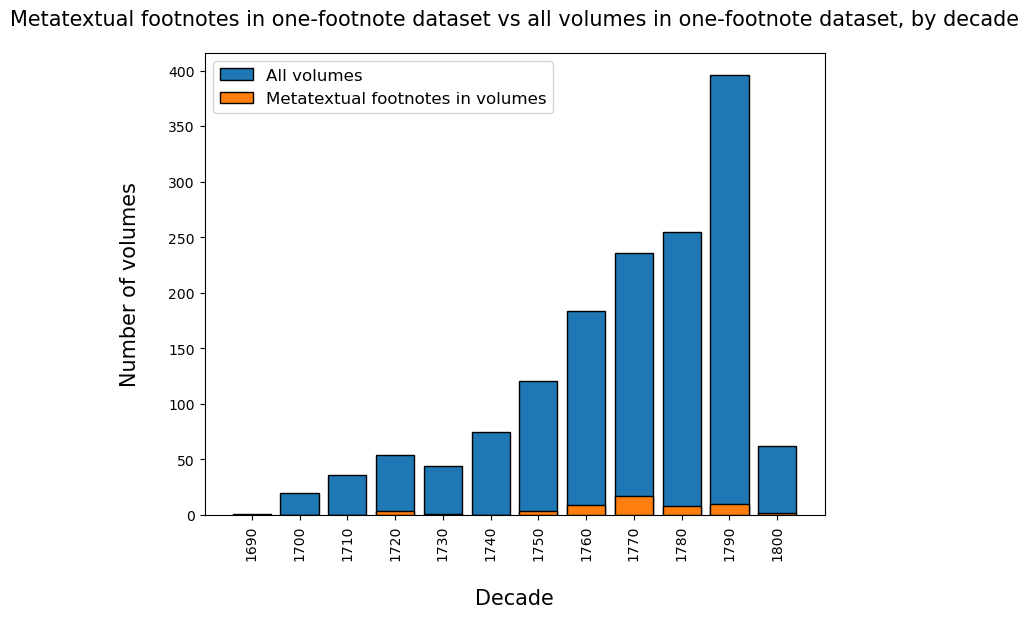

In [325]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

label = merged_MT["decade"]

x = np.arange(len(label))

rect2 = ax.bar(x,
              merged_MT["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax.bar(x,
              merged_MT["footnotes_present"],
              label = "Metatextual footnotes in volumes",
              edgecolor = "black")


#add the labels to the axis
ax.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax.set_title("Metatextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)#add the legend
#using the labels of the bars
ax.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 10)


### Ratios of metatextual footnotes to all volumes

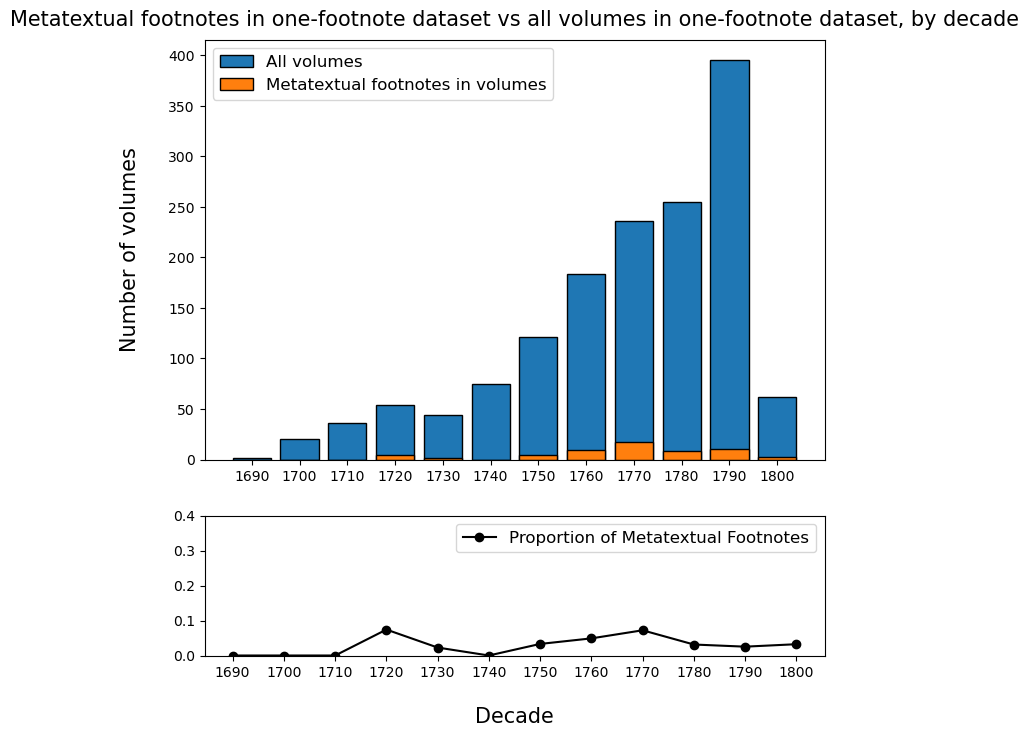

In [326]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (8,8))

label = merged_MT["decade"]

x = np.arange(len(label))

rect2 = ax1.bar(x,
              merged_MT["tag"],
              label = "All volumes",
              edgecolor = "black")

rect2 = ax1.bar(x,
              merged_MT["footnotes_present"],
              label = "Metatextual footnotes in volumes",
              edgecolor = "black")

rect3 = ax2.plot(x,
              merged_MT["footnotes_present"]/merged_MT["tag"],
              label = "Proportion of Metatextual Footnotes",
              marker="o",
              color="black",
              markeredgecolor="black")


#add the labels to the axis
ax1.set_ylabel("Number of volumes",
             fontsize = 15,
             labelpad = 20)
ax2.set_xlabel("Decade",
             fontsize = 15,
             labelpad =20)
ax1.set_title("Metatextual footnotes in one-footnote dataset vs all volumes in one-footnote dataset, by decade",
            fontsize = 15,
            pad = 10)
#set the ticks
ax1.set_xticks(x)
ax1.set_xticklabels(label)#add the legend
#using the labels of the bars
ax1.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax1.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)
ax1.tick_params(axis = "y",
              which = "both",
              labelsize = 10)
###
#add the labels to the axis

#set the ticks
ax2.set_xticks(x)
ax2.set_xticklabels(label)#add the legend
ax2.set_ylim(0,0.4)

#using the labels of the bars
ax2.legend(#title = "Datasets",
         fontsize = 12,
         title_fontsize = 15)#adjust the tick paramaters
ax2.tick_params(axis = "x",
              which = "both",
              labelrotation = 0)


0.18460337668541582

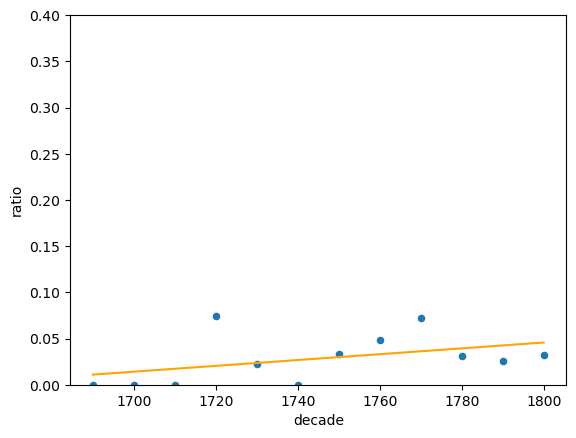

In [327]:
# Fitting a Linear Regression model to our data (binning by decade)
linear = LinearRegression()
linear.fit(merged_MT[['decade']], merged_MT['ratio'])

# Creating a scatterplot of our data (in blue)
ax = merged_MT.plot.scatter(x='decade', y='ratio')

# Adding our plotted linear regression model (in orange)
ax.plot(merged_MT['decade'], linear.predict(merged_MT[['decade']]), c='orange')
ax.set_ylim(0, 0.4)
linear.score(merged_MT[['decade']], merged_MT['ratio'])

In [328]:

#define response variable
y = merged_MT['ratio']

#define predictor variables
x = merged_MT[['decade']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.264
Date:                Fri, 28 Mar 2025   Prob (F-statistic):              0.163
Time:                        17:10:31   Log-Likelihood:                 28.287
No. Observations:                  12   AIC:                            -52.57
Df Residuals:                      10   BIC:                            -51.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5227      0.366     -1.427      0.1

/Users/sierraeckert/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [329]:
#o          = rb.beast( merged_MT['ratio'], start=1690, deltat= 10, season='none')  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of metatextual footnotes per decade')
#rb.print(o)

In [330]:
#o          = rb.beast( merged_MT_date['ratio'], start=1690, season='none', period=1.0)  # season='none' bcz the data has no seasonal/periodic component
#rb.plot(o, title='Proportion of metatextual footnotes per year')
#rb.print(o)

In [331]:
x= list(merged_MT['decade'])
y= list(merged_MT['ratio'])
pw_fit = piecewise_regression.Fit(x, y, n_breakpoints=2)
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       12
No. Model Parameters                    6
Degrees of Freedom                      6
Res. Sum of Squares            0.00474362
Total Sum of Squares           0.00772446
R Squared                        0.385897
Adjusted R Squared              -0.351027
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -0.68092         1.15     -0.59068         0.576      -3.5017       2.1398
alpha1           0.000406445     0.000672       0.6047         0.568   -0.0012382    0.0020511
beta1             0.00117907      0.00403      0.29237             -   -0.0086889     0.011047
beta2            -0.00283999      0.00417     -0.68097             -    -0.013045    0.0073649
breakpoint1      

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       12\nNo. Model Parameters                    6\nDegrees of Freedom                      6\nRes. Sum of Squares            0.00474362\nTotal Sum of Squares           0.00772446\nR Squared                        0.385897\nAdjusted R Squared              -0.351027\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst               -0.68092         1.15     -0.59068         0.576      -3.5

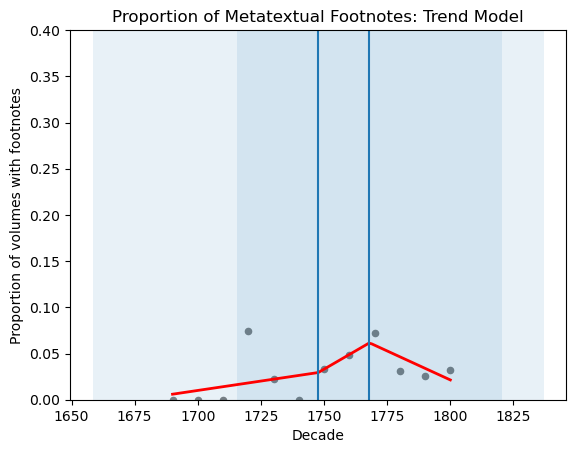

In [332]:
# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="grey",  s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Decade")
plt.ylim(0, 0.4)
plt.ylabel("Proportion of volumes with footnotes")
plt.title("Proportion of Metatextual Footnotes: Trend Model")
plt.show()
plt.close()

### What are the titles of the works with metatextual footnotes?

In [333]:
pd.options.display.max_colwidth = 100
print('Number of volumes with metatexual footnotes in our one-footnote dataset:')
metatextual_footnotes_df['Title'].count()

Number of volumes with metatexual footnotes in our one-footnote dataset:


55

In [334]:
pd.set_option('display.max_rows', 200)
print('Titles of volumes with metatexual footnotes (in our one-footnote dataset):')
metatextual_footnotes_df[['Title', 'Vol_Number']]

Titles of volumes with metatexual footnotes (in our one-footnote dataset):


Title  \
30                                                  The farmer's son of Kent. A tale. In two volumes. ...   
57                  The life of the Countess of G. By Gellert. Translated from the German, by a lady. ...   
89                                      L'art de corriger et de rendre les hommes constans. Prix 30 sols.   
130                                           Delia, a pathetic and interesting tale. In Four Volumes ...   
140   Letters between an English lady and her friend at Paris. In which are contained, The memoirs of ...   
142            The history of a woman of quality: or, the adventures of Lady Frail. By an impartial hand.   
163                          He is found at last: or, memoirs of the Beverley family. In two volumes. ...   
218                            The life and opinions of Tristram Shandy, gentleman. In three volumes. ...   
263         History of Lady Bettesworth and Captain Hastings. In a series of letters. In two volumes. ...   
271     Radzivil, a romance. Translated from the Russ of the celebrated M. Wocklow. In three volumes. ...   
272   The history of Sir Charles Grandison; in a series of letters. By Mr. Samuel Richardson, Author o...   
273                 The life and opinions of Tristram Shandy, gentleman. With The Life of the Author. ...   
274                 The life and opinions of Tristram Shandy, gentleman. With The Life of the Author. ...   
275                 The life and opinions of Tristram Shandy, gentleman. With The Life of the Author. ...   
276                 The life and opinions of Tristram Shandy, gentleman. With The Life of the Author. ...   
302                    The story of the Methodist-Lady: or the injur'd husband's revenge. A true history.   
313                                                    The self-Tormentor, a novel. In three volumes. ...   
337                                             The life and opinions of Tristram Shandy, gentleman. |...   
340   The female American; or, the adventures of Unca Eliza Winkfield. Compiled by herself. In two vol...   
361   The history of Joseph Andrews, and his friend Mr. Abraham Adams. Written in Imitation of the Man...   
402     The adventures of Mr. Loveill, interspers'd with many real amours of the modern polite world. ...   
414           Virtue made easy; or, a tablet of morality: being a collection of maxims and moral sayings.   
451   Authentic and interesting memoirs of Miss Ann Sheldon; (now Mrs. Archer:) A Lady who figured, du...   
469   The history of Sir Charles Grandison. In a series of letters. By Mr. Samuel Richardson. In seven...   
481   The citizen of the world, or letters from a Chinese philosopher, residing in London, to his frie...   
491   The will of a certain northern vicar. The second edition, with corrections. To which is annex'd ...   
494   A learned dissertation on dumpling: its dignity, antiquity, and excellence. With a word upon pud...   
503   A learned dissertation on dumpling; its dignity, antiquity, and excellence. With a word upon pud...   
522   Elisa Powell, or trials of sensibility: a series of original letters, collected by a Welsh curat...   
528   The hermit: or, the unparallel'd sufferings and surprising adventures of Mr. Philip Quarll, an E...   
542   The hermit: or, the unparallel'd sufferings and surprising adventures of Mr. Philip Quarll, an E...   
580                                             The life and opinions of Tristram Shandy, gentleman. |...   
585   Letters of the Right Honourable Lady My W---y M----e: written, during her travels in Europe, Asi...   
603                                              The life and opinions of Tristram Shandy, gentleman. ...   
619   The citizen of the world: or, letters from a Chinese philosopher, residing in London, to his fri...   
626             Honny soit qui mal y pense, ou histoires des filles c<c3><a9>lebres du XVIIIe siecle. ...   
649                                                  The intelligen

#### Export the list of filenames for metatextual footnotes

In [335]:
metatextual_footnotes_df['Filename'].to_csv('../metatextual_footnotes_filenames.csv')

In [336]:
metatextual_footnotes_df[['Title', 'Field_Headings']].to_csv('../metatextual_footnotes_titles.csv')


### Genre terms in the Metatextual Footnote Titles
#### "Memoirs"

In [337]:
genre_term = "memoir|Memoir|memoirs"
dataframe = metatextual_footnotes_df
corpus_name = "Metatextual Footnotes (One-Footnote Corpus)"

print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_metatextual_memoirs = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir|memoirs':
4
Percent of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'memoir|Memoir|memoirs':
0.07272727272727272


#### "Letters"

In [338]:
genre_term = "letter|Letter|lettre|Lettre"
dataframe = metatextual_footnotes_df
corpus_name = "Metatextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_metatextual_letters = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
13
Percent of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'letter|Letter|lettre|Lettre':
0.23636363636363636


#### "Novel"

In [339]:
genre_term = "novel|Novel|roman|Roman"
dataframe = metatextual_footnotes_df
corpus_name = "Metatextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
2
Percent of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'novel|Novel|roman|Roman':
0.03636363636363636


#### "Tale"

In [340]:
genre_term = "tale|Tale|recit|Recit"
dataframe = metatextual_footnotes_df
corpus_name = "Metatextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())
proportion_metatextual_tale = dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count()

Number of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
6
Percent of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'tale|Tale|recit|Recit':
0.10909090909090909


#### "Romance"

In [341]:
genre_term = "romance|Romance"
dataframe = metatextual_footnotes_df
corpus_name = "Metatextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
1
Percent of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'romance|Romance':
0.01818181818181818


#### "History"

In [342]:
genre_term = "history|History|histories|Histories|histoire|Histoire"
dataframe = metatextual_footnotes_df
corpus_name = "Metatextual Footnotes (One-Footnote Corpus)"
print(f"Number of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count())
print(f"Percent of volumes in the {corpus_name} that contain the words '{genre_term}':")
print(dataframe[dataframe["Title"].str.contains(f"{genre_term}")]['Title'].count()/dataframe['DocumentID'].count())

Number of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
12
Percent of volumes in the Metatextual Footnotes (One-Footnote Corpus) that contain the words 'history|History|histories|Histories|histoire|Histoire':
0.21818181818181817


In [343]:
# Proportions of Memoirs, Letters, Tales
proportions_metatextual = [proportion_metatextual_memoirs, proportion_metatextual_letters, proportion_metatextual_tale]
proportions_metatextual

[0.07272727272727272, 0.23636363636363636, 0.10909090909090909]

### Genre breakdown across footnote types

Memoirs, Letters, Tales

In [344]:
genre_proportions = pd.DataFrame(
    {'ECCO': proportions_ECCO,
     'One-Footnote': proportions_one_fn,
     'One-Footnote (with footnotes)': proportions_one_fn_footnoted,
     'Contextual': proportions_contextual,
     'Translation': proportions_translation,
     'Intertextual': proportions_intertextual,
     'Intratextual': proportions_intratextual,
     'Metatextual': proportions_metatextual
    })
genre_proportions

ECCO  One-Footnote  One-Footnote (with footnotes)  Contextual  \
0  0.055891      0.065364                       0.048544    0.032698   
1  0.132931      0.125337                       0.135922    0.092643   
2  0.077039      0.080189                       0.087379    0.098093   

   Translation  Intertextual  Intratextual  Metatextual  
0     0.036697      0.043243      0.094828     0.072727  
1     0.100917      0.156757      0.241379     0.236364  
2     0.100917      0.081081      0.034483     0.109091

In [345]:
genre_proportions_as_percentage = genre_proportions*100
genre_proportions_as_percentage

ECCO  One-Footnote  One-Footnote (with footnotes)  Contextual  \
0   5.589124      6.536388                       4.854369    3.269755   
1  13.293051     12.533693                      13.592233    9.264305   
2   7.703927      8.018868                       8.737864    9.809264   

   Translation  Intertextual  Intratextual  Metatextual  
0     3.669725      4.324324      9.482759     7.272727  
1    10.091743     15.675676     24.137931    23.636364  
2    10.091743      8.108108      3.448276    10.909091

In [346]:
genre_proportions_tranposed = genre_proportions.transpose()
genre_proportions_tranposed

0         1         2
ECCO                           0.055891  0.132931  0.077039
One-Footnote                   0.065364  0.125337  0.080189
One-Footnote (with footnotes)  0.048544  0.135922  0.087379
Contextual                     0.032698  0.092643  0.098093
Translation                    0.036697  0.100917  0.100917
Intertextual                   0.043243  0.156757  0.081081
Intratextual                   0.094828  0.241379  0.034483
Metatextual                    0.072727  0.236364  0.109091

In [347]:
genre_proportions_tranposed.rename(columns={0: 'Memoirs', 1: 'Letters', 2: 'Tales'}, inplace=True)
genre_proportions_tranposed

Memoirs   Letters     Tales
ECCO                           0.055891  0.132931  0.077039
One-Footnote                   0.065364  0.125337  0.080189
One-Footnote (with footnotes)  0.048544  0.135922  0.087379
Contextual                     0.032698  0.092643  0.098093
Translation                    0.036697  0.100917  0.100917
Intertextual                   0.043243  0.156757  0.081081
Intratextual                   0.094828  0.241379  0.034483
Metatextual                    0.072727  0.236364  0.109091

In [348]:
genre_proportions_tranposed_as_percent = genre_proportions_tranposed*100
genre_proportions_tranposed_as_percent

Memoirs    Letters      Tales
ECCO                           5.589124  13.293051   7.703927
One-Footnote                   6.536388  12.533693   8.018868
One-Footnote (with footnotes)  4.854369  13.592233   8.737864
Contextual                     3.269755   9.264305   9.809264
Translation                    3.669725  10.091743  10.091743
Intertextual                   4.324324  15.675676   8.108108
Intratextual                   9.482759  24.137931   3.448276
Metatextual                    7.272727  23.636364  10.909091

In [349]:
genre_proportions_tranposed_as_percent.transpose()

ECCO  One-Footnote  One-Footnote (with footnotes)  Contextual  \
Memoirs   5.589124      6.536388                       4.854369    3.269755   
Letters  13.293051     12.533693                      13.592233    9.264305   
Tales     7.703927      8.018868                       8.737864    9.809264   

         Translation  Intertextual  Intratextual  Metatextual  
Memoirs     3.669725      4.324324      9.482759     7.272727  
Letters    10.091743     15.675676     24.137931    23.636364  
Tales      10.091743      8.108108      3.448276    10.909091

In [350]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=genre_proportions_tranposed['Memoirs'], f_exp=(genre_proportions_tranposed['Memoirs'].mean()))

Power_divergenceResult(statistic=0.05348566635013759, pvalue=0.9999997366379034)

In [351]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=genre_proportions_tranposed_as_percent['Memoirs'][3:], f_exp=(genre_proportions_tranposed_as_percent['Memoirs'][3:].mean()))

Power_divergenceResult(statistic=5.113818122317871, pvalue=0.2758171494850087)

In [352]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=genre_proportions_tranposed_as_percent['Tales'], f_exp=(genre_proportions_tranposed_as_percent['Tales'].mean()))

Power_divergenceResult(statistic=4.366475358551824, pvalue=0.7367304585784749)

In [353]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=genre_proportions_tranposed_as_percent['Tales'][3:], f_exp=(genre_proportions_tranposed_as_percent['Tales'][3:].mean()))

Power_divergenceResult(statistic=4.215769975469303, pvalue=0.3775914223709852)

In [354]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=genre_proportions_tranposed_as_percent['Letters'], f_exp=(genre_proportions_tranposed_as_percent['Letters'].mean()))

Power_divergenceResult(statistic=14.785427796717439, pvalue=0.03885040765985401)

In [355]:
# Let's run a chi2 goodness of fit test
stats.chisquare(f_obs=genre_proportions_tranposed_as_percent['Letters'][3:], f_exp=(genre_proportions_tranposed_as_percent['Letters'][3:].mean()))

Power_divergenceResult(statistic=12.278545490999921, pvalue=0.015395780036639222)

In this chi-squared test, our null hypothesis was an queaitable distribution of footntoe proportions
The p-value for Letters is lower than 0.05, indicating that the distribution deviates from the expected outcome of equal proportions.

In [356]:
genre_proportions_tranposed['Letters'].mean()

0.15278124466812146

In [357]:
genre_proportions_tranposed['Tales'].mean()

0.08353392724794562

In [358]:
stats.ks_2samp(genre_proportions_tranposed['Memoirs'], genre_proportions_tranposed['Letters'])

KstestResult(statistic=0.875, pvalue=0.002486402486402486, statistic_location=0.07272727272727272, statistic_sign=1)

In [359]:
stats.ks_2samp(genre_proportions_tranposed['Memoirs'], genre_proportions_tranposed['Tales'])

KstestResult(statistic=0.75, pvalue=0.018648018648018645, statistic_location=0.07272727272727272, statistic_sign=1)

In [360]:
stats.ks_2samp(genre_proportions_tranposed['Letters'], genre_proportions_tranposed['Tales'])

KstestResult(statistic=0.75, pvalue=0.018648018648018645, statistic_location=0.10909090909090909, statistic_sign=-1)

In [361]:
genre_proportions_tranposed_one_fn = genre_proportions_tranposed.loc[['One-Footnote', 'Contextual', 'Translation', 'Intertextual', 'Intratextual','Metatextual']]

In [362]:
genre_proportions_tranposed_one_fn_as_percent = genre_proportions_tranposed_one_fn*100
genre_proportions_tranposed_one_fn_as_percent

Memoirs    Letters      Tales
One-Footnote  6.536388  12.533693   8.018868
Contextual    3.269755   9.264305   9.809264
Translation   3.669725  10.091743  10.091743
Intertextual  4.324324  15.675676   8.108108
Intratextual  9.482759  24.137931   3.448276
Metatextual   7.272727  23.636364  10.909091

In [363]:
stats.chisquare(f_obs=genre_proportions_tranposed_one_fn_as_percent['Memoirs'], f_exp=(genre_proportions_tranposed_one_fn_as_percent['Memoirs'].mean()))

Power_divergenceResult(statistic=5.101642785598843, pvalue=0.4036020303770298)

In [364]:
stats.chisquare(f_obs=genre_proportions_tranposed_one_fn_as_percent['Letters'], f_exp=(genre_proportions_tranposed_one_fn_as_percent['Letters'].mean()))

Power_divergenceResult(statistic=13.647924522688669, pvalue=0.018007499282828337)

In [365]:
stats.chisquare(f_obs=genre_proportions_tranposed_one_fn_as_percent['Tales'], f_exp=(genre_proportions_tranposed_one_fn_as_percent['Tales'].mean()))

Power_divergenceResult(statistic=4.2742848540647564, pvalue=0.5106385567502736)

In [366]:
stats.ks_2samp(genre_proportions_tranposed_one_fn_as_percent['Memoirs'], genre_proportions_tranposed_one_fn_as_percent['Letters'])

KstestResult(statistic=0.8333333333333334, pvalue=0.025974025974025972, statistic_location=7.2727272727272725, statistic_sign=1)

In [367]:
stats.ks_2samp(genre_proportions_tranposed_one_fn_as_percent['Memoirs'], genre_proportions_tranposed_one_fn_as_percent['Tales'])

KstestResult(statistic=0.6666666666666666, pvalue=0.14285714285714285, statistic_location=7.2727272727272725, statistic_sign=1)

In [368]:
stats.ks_2samp(genre_proportions_tranposed_one_fn_as_percent['Letters'], genre_proportions_tranposed_one_fn_as_percent['Tales'])

KstestResult(statistic=0.6666666666666666, pvalue=0.14285714285714285, statistic_location=10.909090909090908, statistic_sign=-1)

In [369]:
stats.ks_2samp(genre_proportions_tranposed['Memoirs'][2:], genre_proportions_tranposed['Letters'][2:])

KstestResult(statistic=0.8333333333333334, pvalue=0.025974025974025972, statistic_location=0.07272727272727272, statistic_sign=1)

In [370]:
stats.ks_2samp(genre_proportions_tranposed['Memoirs'][1:], genre_proportions_tranposed['Tales'][1:])

KstestResult(statistic=0.7142857142857143, pvalue=0.05303030303030303, statistic_location=0.07272727272727272, statistic_sign=1)

In [371]:
stats.ks_2samp(genre_proportions_tranposed['Letters'][1:], genre_proportions_tranposed['Tales'][1:])

KstestResult(statistic=0.7142857142857143, pvalue=0.05303030303030303, statistic_location=0.10909090909090909, statistic_sign=-1)

## Multi-tagged pages

What tags appear with other tags?

In [372]:
multi_tagged_footnotes

Count                Tag
0      103              FN, C
1       91                 CW
2       82                  C
3       64               C, T
4       51                 IT
..     ...                ...
404      1             LB, CW
405      1             CW, PO
406      1     LB, TY, CW, SM
407      1  BQ, P, CW, TY, PB
408      1      C, IT, IN, MT

[409 rows x 2 columns]

### What tags appear on pages with CATCHWORDS (tag 'CW')?

In [373]:
# Let's look at the CW tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("CW")].Tag.value_counts()

BQ, P, CW, TY               13
BQ, P, CW, TY, SM           11
BQ, P, CW, TY, PB           11
CW, PB, TY, O                7
CW, PB, TY                   6
SM, PB, CW                   6
LB, P, TY, CW                5
CW, LB, TY                   5
TY, CW                       5
SM, CW, TY, O                4
PB, SM, CW, TY               4
SE, SM, CW                   4
CW, SM, TY                   4
RQ, CW                       3
SM, CW                       3
M, CW                        3
BQ, CW, TY                   3
BQ, P, CW, SM                3
TE, CW, TY                   3
CW, TY, O                    3
SE, CW                       3
LB, SM, CW                   3
LS, CW                       3
CW, PO, TY                   3
CW, IN                       2
CW, P, TY                    2
LB, TY, CW, SM               2
SM, CW, LB, P, TY            2
BQ, P, CW, SM, TY, O         2
PB, P, CW                    2
BQ, CW, TY, PB               2
LB, SE, CW                   2
CW, SD  

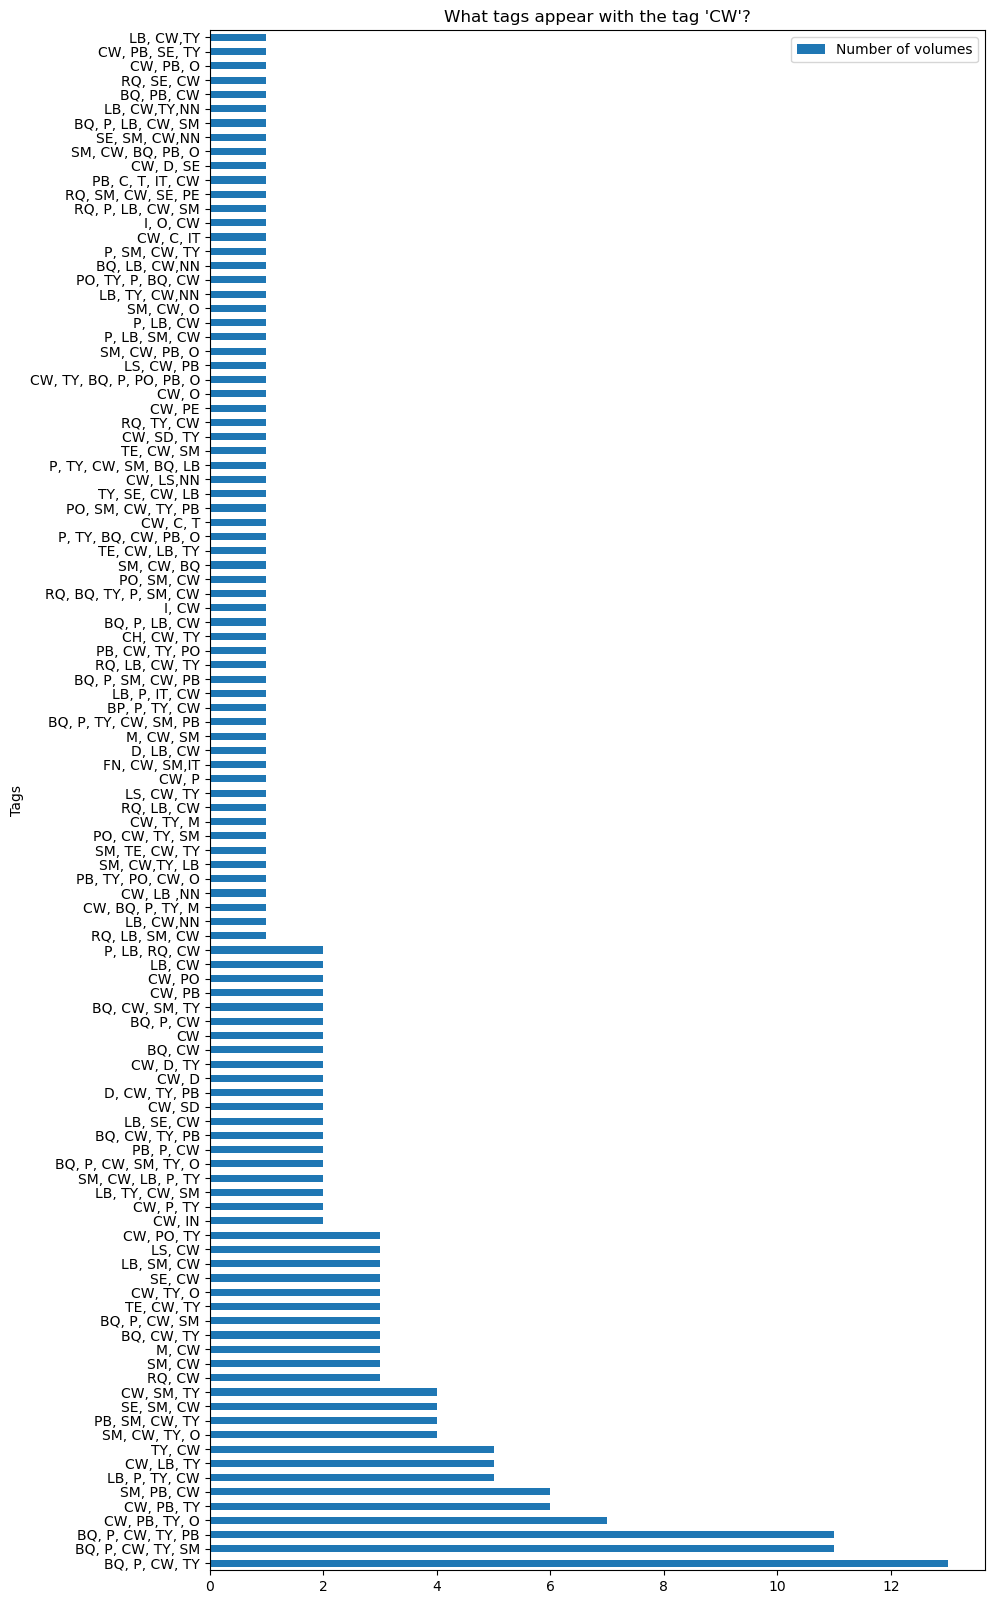

In [374]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("CW")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'CW'?", figsize=(10, 20))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

### What tags appear with TYPOGRAPHY (the tag 'TY')?

In [375]:
# Let's look at the TY tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("TY")].Tag.value_counts()

BQ, P, CW, TY               13
BQ, P, CW, TY, PB           11
BQ, P, CW, TY, SM           11
CW, PB, TY, O                7
BQ, P, TY                    7
CW, PB, TY                   6
TY, CW                       5
LB, P, TY, CW                5
CW, LB, TY                   5
PB, SM, CW, TY               4
SM, CW, TY, O                4
LS, TY, TE, PB               4
LB, P, TY                    4
CW, SM, TY                   4
O, TE, PO, TY                3
CW, PO, TY                   3
O, TY, PB                    3
CW, TY, O                    3
LB, TY, SM                   3
BQ, CW, TY                   3
TY, LB                       3
TE, CW, TY                   3
SE , TY                      2
TE, TY                       2
PB, TY, TE                   2
LB, TY, CW, SM               2
CW, D, TY                    2
BQ, TY                       2
RQ, BQ, TY, P                2
BQ, P, CW, SM, TY, O         2
LB, LS, TY                   2
BQ, P, TY, LB                2
SM, CW, 

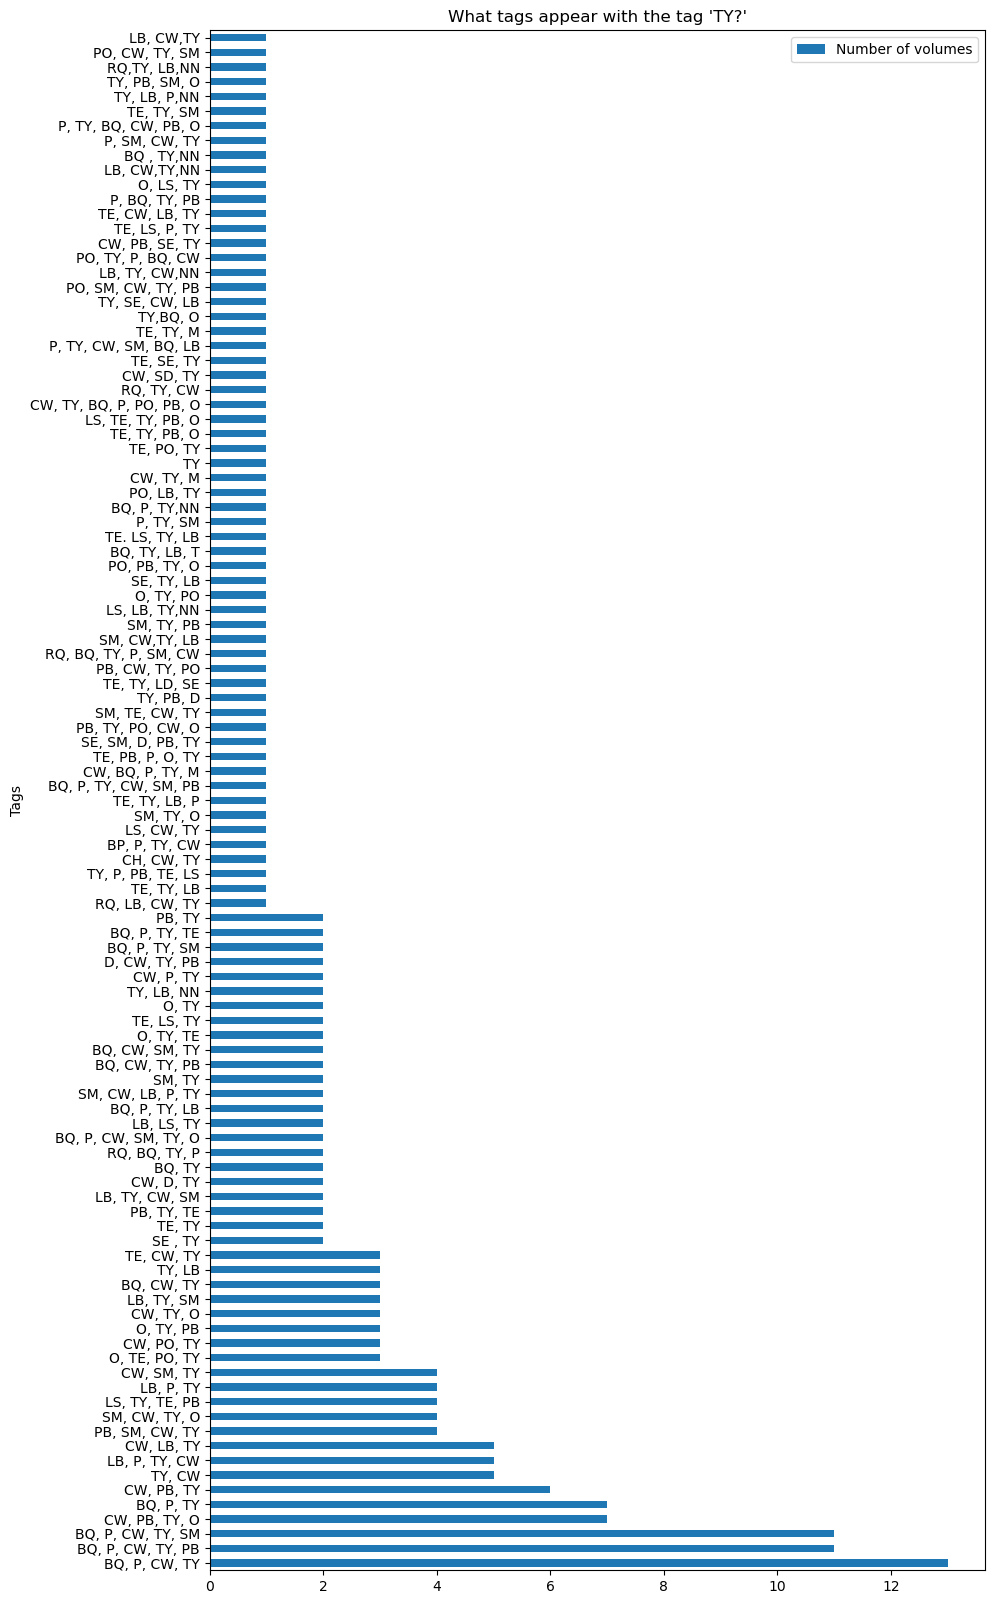

In [376]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("TY")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'TY?'", figsize=(10, 20))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

### What tags appear with PARAGRAPH BREAKS (the tag 'PB')?

In [377]:
# Let's look at the PB tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("PB")].Tag.value_counts()

BQ, P, CW, TY, PB           11
CW, PB, TY, O                7
CW, PB, TY                   6
SM, PB, CW                   6
LS, TY, TE, PB               4
PB, SM, CW, TY               4
O, TY, PB                    3
BQ, CW, TY, PB               2
PB, TY, TE                   2
D, CW, TY, PB                2
PB, P, CW                    2
PB, PO                       2
CW, PB                       2
PB, TY                       2
TY, PB, SM, O                1
LB, PB                       1
PO, PB, TY, O                1
SM, TY, PB                   1
PB, P                        1
TE, PB, P, O, TY             1
BQ, P, SM, CW, PB            1
BQ, P, TY, CW, SM, PB        1
TY, P, PB, TE, LS            1
SE, SM, D, PB, TY            1
LB, PB, SM                   1
PB, CW, TY, PO               1
TY, PB, D                    1
BQ, PB, CW                   1
P, TY, BQ, CW, PB, O         1
CW, TY, BQ, P, PO, PB, O     1
TE, TY, PB, O                1
PB                           1
LS, TE, 

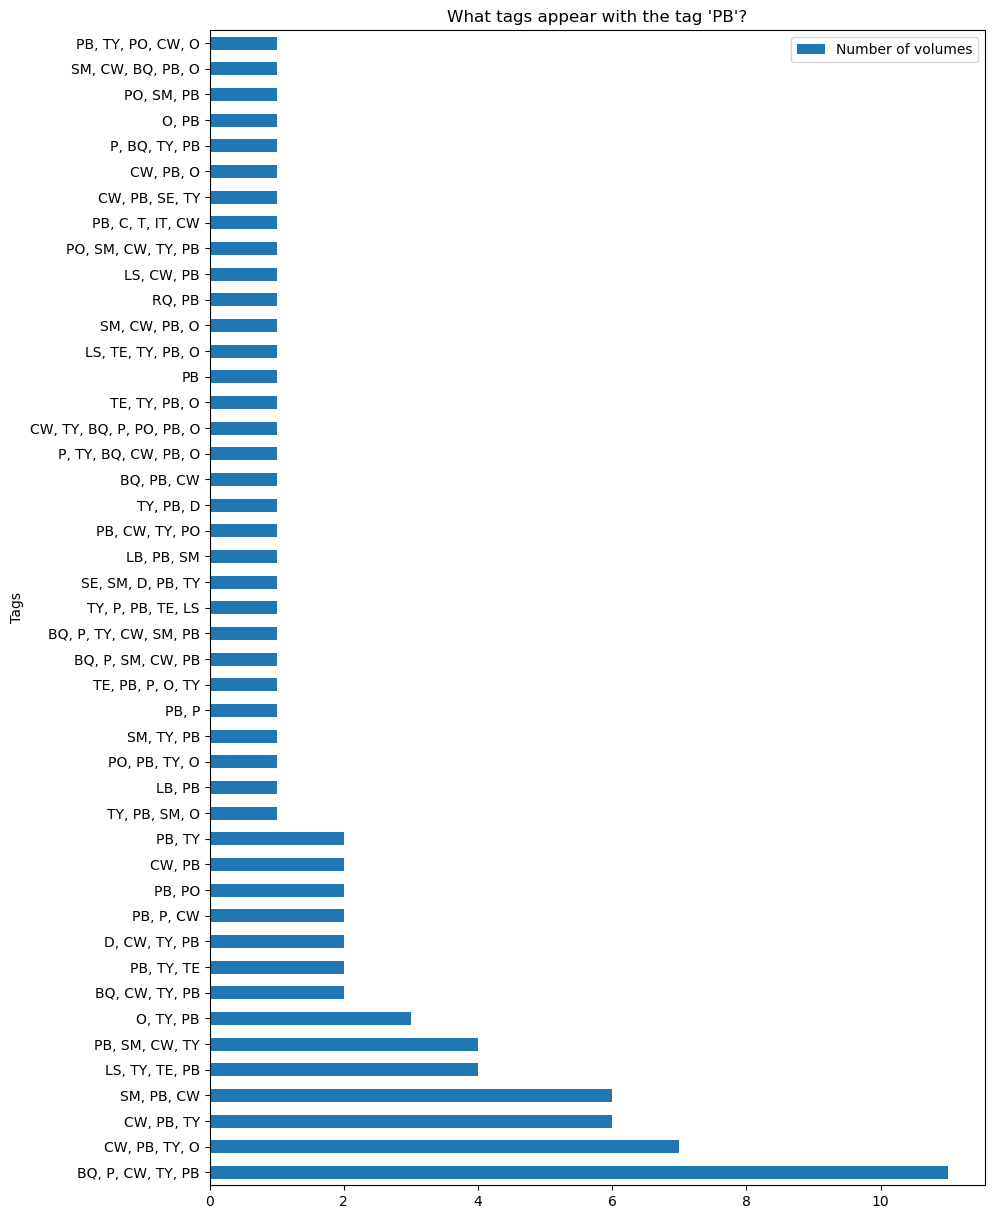

In [378]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("PB")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'PB'?", figsize=(10, 15))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

### What tags appear with BLOCK QUOTES (the tag 'BQ')?

In [379]:
# Let's look at the BQ tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("BQ")].Tag.value_counts()

BQ, P, CW, TY               13
BQ, P, CW, TY, PB           11
BQ, P, CW, TY, SM           11
BQ, P, TY                    7
BQ, P, CW, SM                3
BQ, CW, TY                   3
BQ, CW                       2
BQ, CW, TY, PB               2
BQ, P, TY, LB                2
RQ, BQ, TY, P                2
BQ, P, CW, SM, TY, O         2
BQ, TY                       2
BQ, P, TY, TE                2
BQ, P, TY, SM                2
BQ, CW, SM, TY               2
BQ, P, CW                    2
RQ, BQ, P                    1
CW, BQ, P, TY, M             1
RQ, BQ, TY, P, SM, CW        1
BQ, P, LB, CW                1
BQ, TY, LB, T                1
BQ, P, SM, CW, PB            1
BQ, P, TY, CW, SM, PB        1
BQ, NY, LB                   1
BQ, SE,NN                    1
BQ, P, SE                    1
BQ, PB, CW                   1
SM, CW, BQ                   1
P, TY, BQ, CW, PB, O         1
SM, CW, BQ, PB, O            1
BQ, P, LB, CW, SM            1
BQ , TY,NN                   1
BQ, P, T

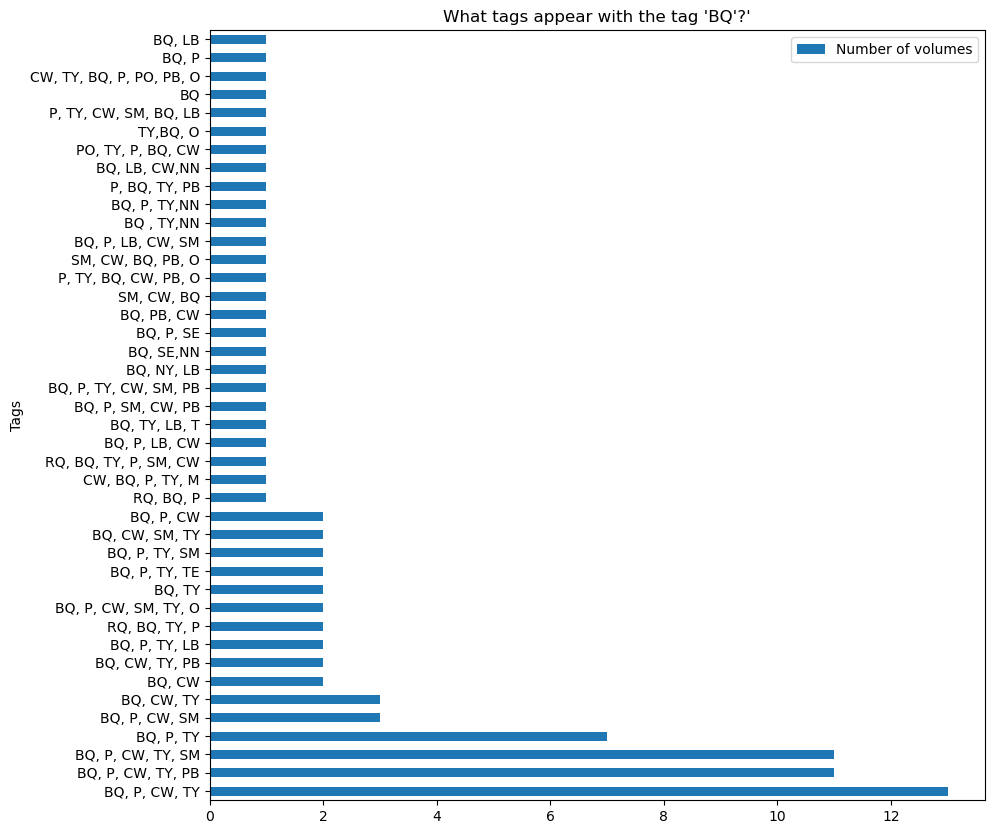

In [380]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("BQ")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'BQ'?'", figsize=(10, 10))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

### What tags appear with SIGNATURE MARKS (the tag 'SM')?

In [381]:
# Let's look at the SM tag
pd.set_option('display.max_rows', 500)
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("SM")].Tag.value_counts()

BQ, P, CW, TY, SM        11
SM, PB, CW                6
CW, SM, TY                4
SM, CW, TY, O             4
SE, SM, CW                4
PB, SM, CW, TY            4
SM, CW                    3
LB, TY, SM                3
LB, SM, CW                3
BQ, P, CW, SM             3
BQ, P, TY, SM             2
BQ, P, CW, SM, TY, O      2
LB, TY, CW, SM            2
SM, CW, LB, P, TY         2
SM, TY                    2
BQ, CW, SM, TY            2
TY, PB, SM, O             1
P, TY, SM                 1
FN, CW, SM,IT             1
BQ, P, TY, CW, SM, PB     1
SM, TE, CW, TY            1
BQ, P, SM, CW, PB         1
SM, TY, O                 1
SM, TY, PB                1
D, SM                     1
PO, SM, CW                1
M, CW, SM                 1
RQ, BQ, TY, P, SM, CW     1
RQ, LB, SM, CW            1
SM, CW,TY, LB             1
LB, PB, SM                1
SE, SM, D, PB, TY         1
PO, CW, TY, SM            1
SM, CW, BQ, PB, O         1
SM, CW, BQ                1
SE, SM, CW,NN       

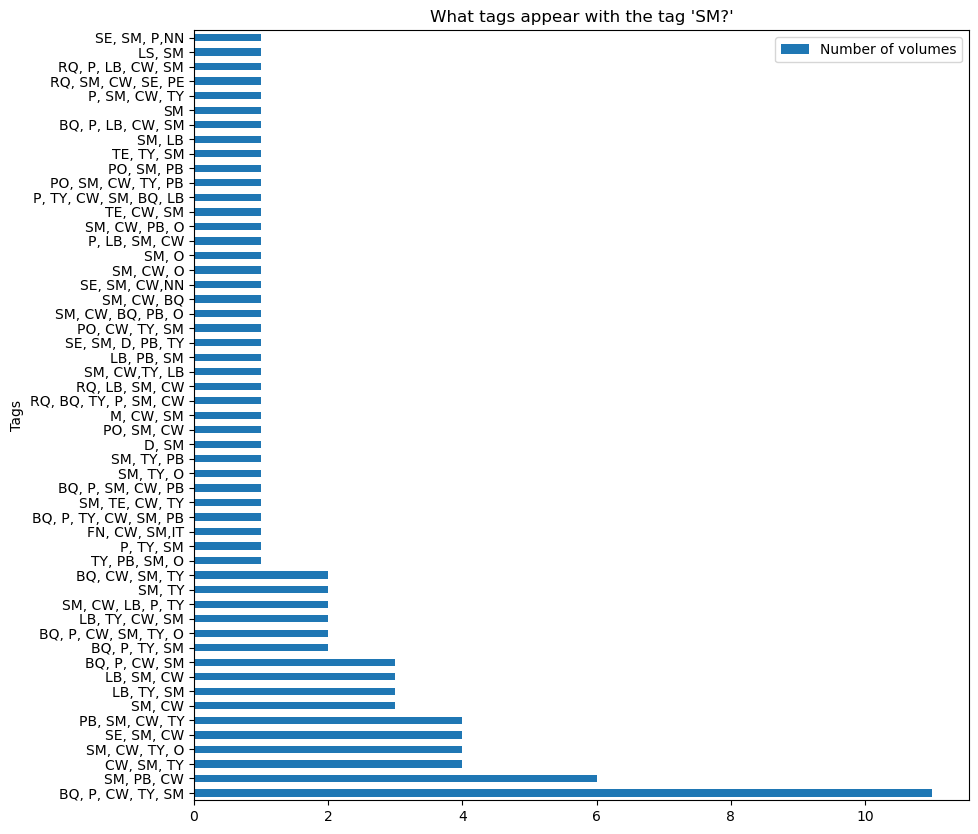

In [382]:
multi_tagged_footnotes[multi_tagged_footnotes['Tag'].astype(str).str.contains("SM")].Tag.value_counts().plot(kind="barh", title="What tags appear with the tag 'SM?'", figsize=(10, 10))\
.set_ylabel("Tags")
plt.legend(["Number of volumes"])

## Decade-by-decade breakdown of tags

### Catchwords

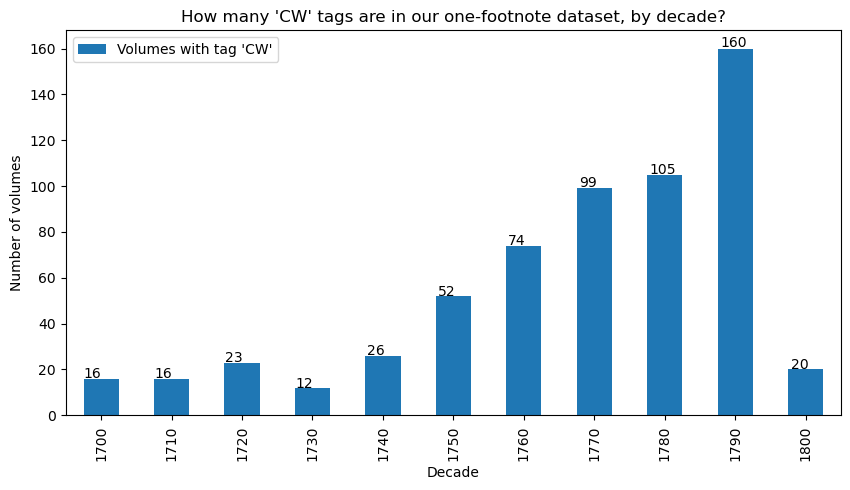

In [383]:
# Let's check how 'CW' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'CW'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'CW' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'CW'"])

### Signature Marks

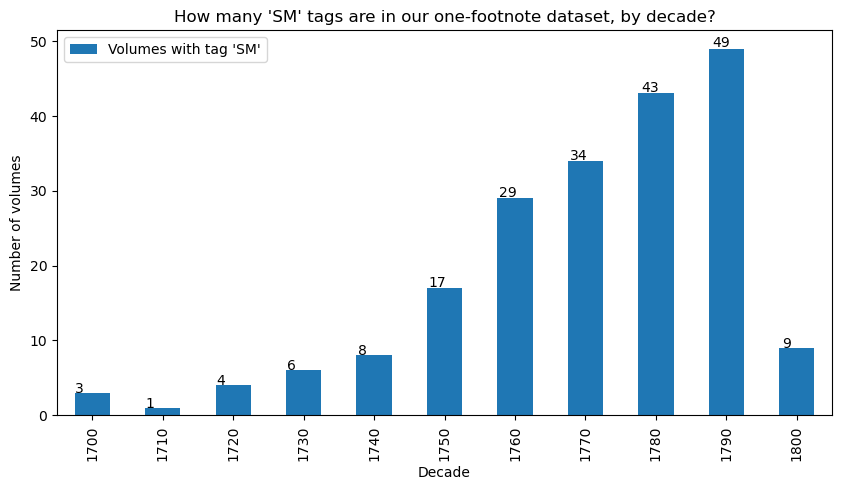

In [384]:
# Let's check how 'SM' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'SM'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'SM' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'SM'"])

### "The End"

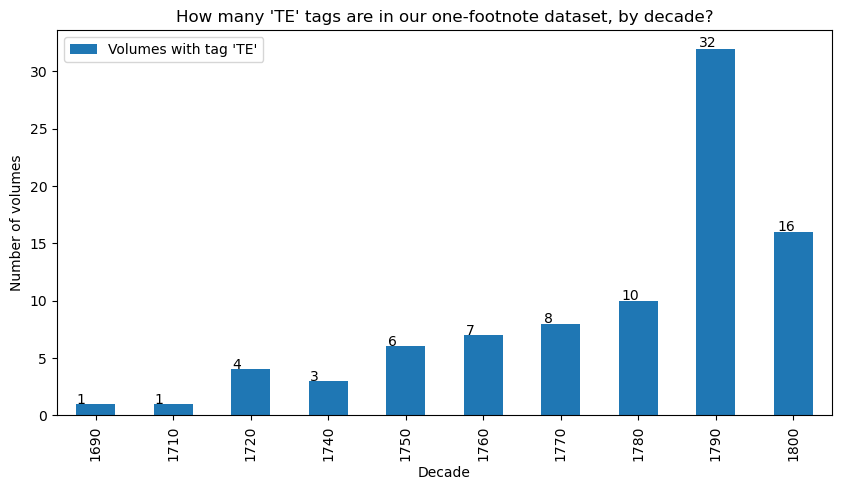

In [385]:
# Let's check how 'TE' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'TE'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'TE' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'TE'"])

### Typography

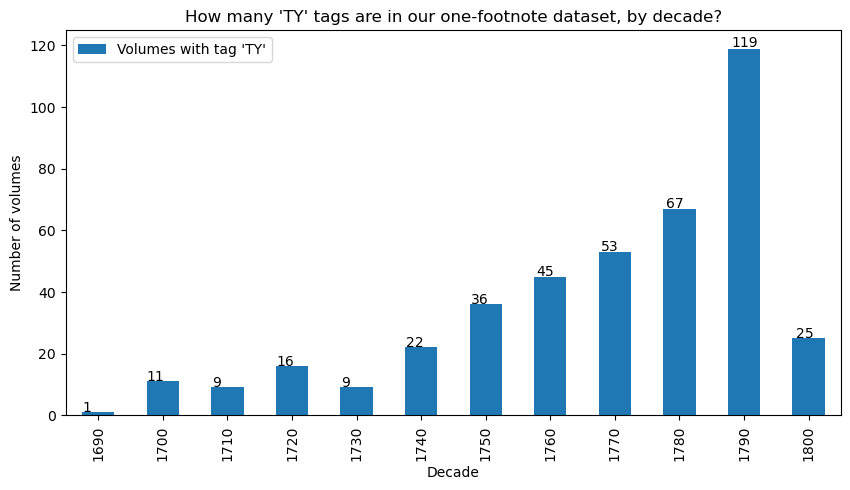

In [386]:
# Let's check how 'TE' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'TY'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'TY' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'TY'"])

### Paragraph Breaks

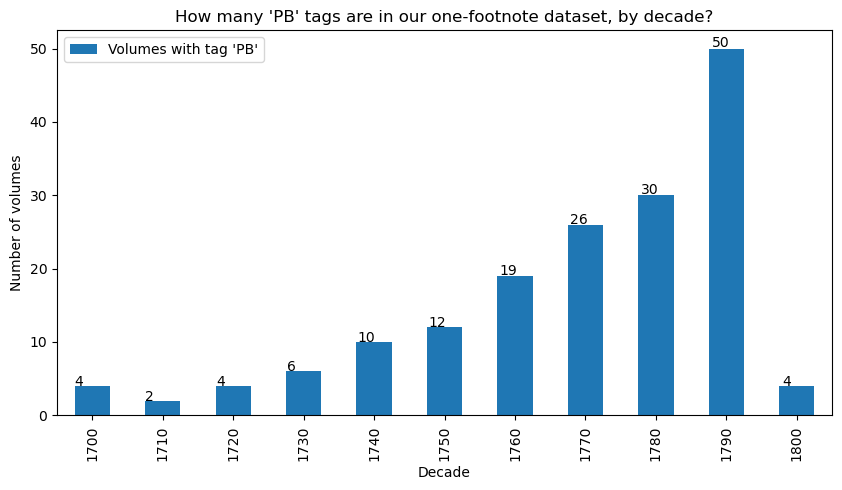

In [387]:
# Let's check how 'PB' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'PB'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'PB' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'PB'"])

### Block Quotes

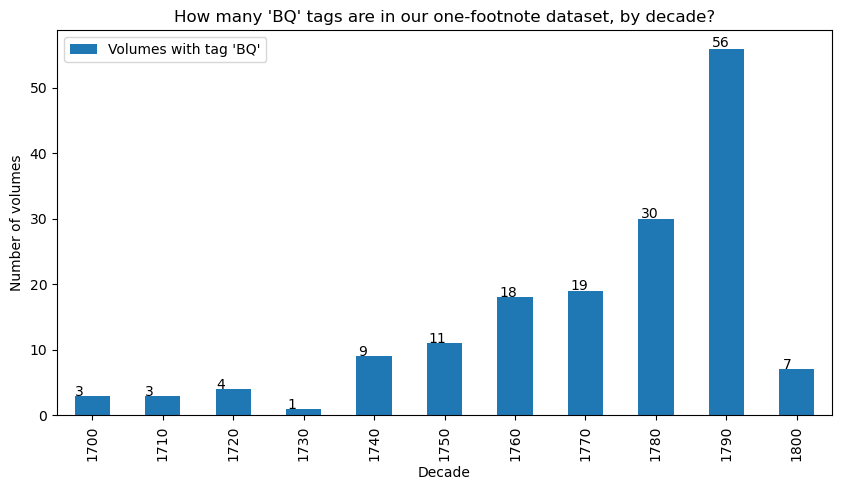

In [388]:
# Let's check how 'BQ' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'BQ'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'BQ' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'BQ'"])

### Poetry

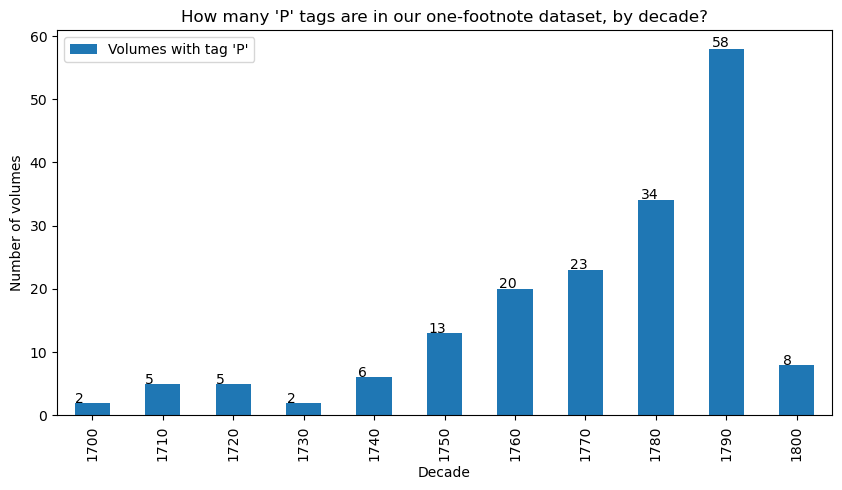

In [389]:
# Let's check how 'P' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'P'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'P' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'P'"])

### Stage Dialogue

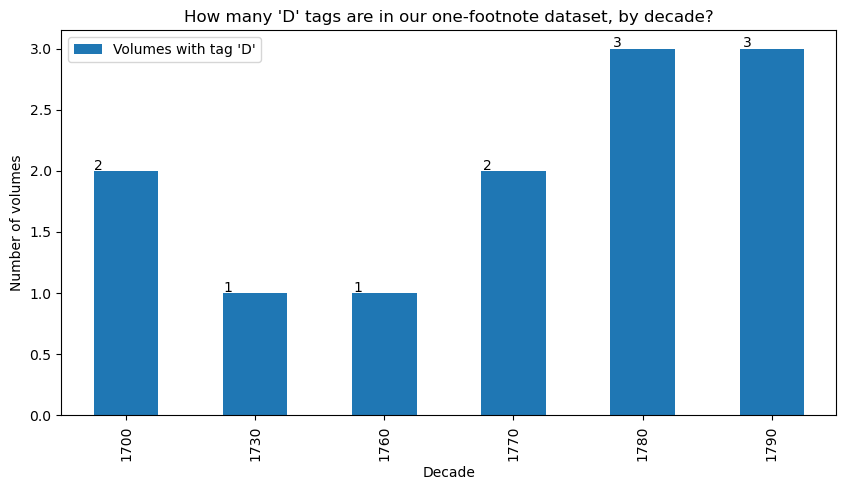

In [390]:
# Let's check how 'D' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'D'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'D' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'D'"])

### Printer's Ornaments

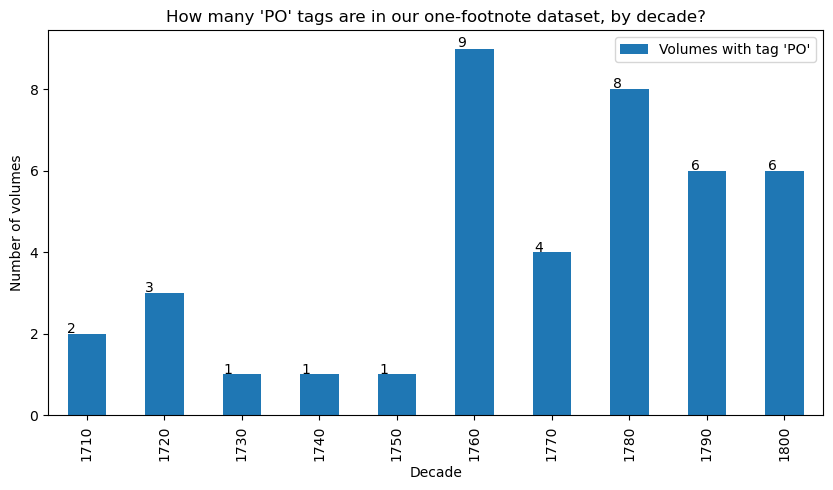

In [391]:
# Let's check how 'PO' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'PO'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'PO' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'PO'"])

### Library Stamps

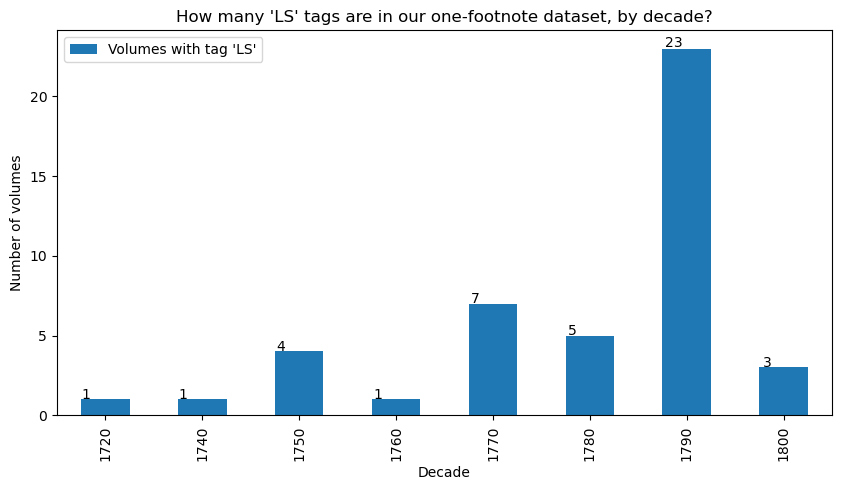

In [392]:
# Let's check how 'LS' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'LS'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'LS' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'LS'"])

### Scanning Error

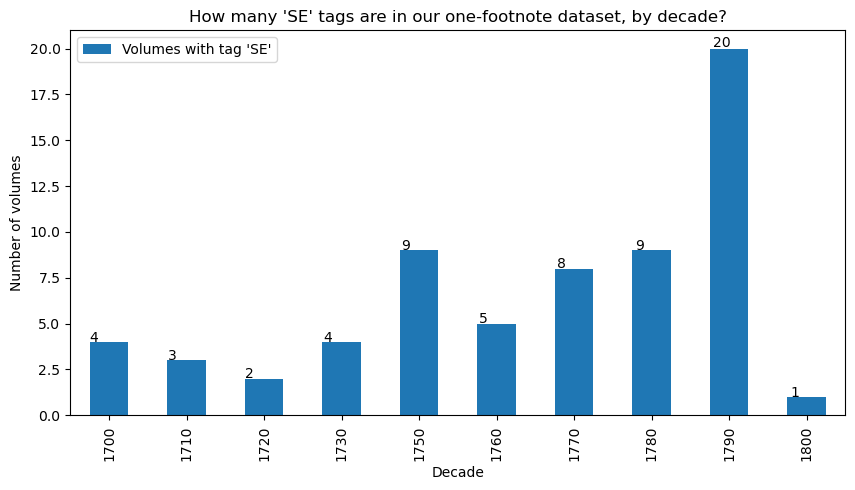

In [393]:
# Let's check how 'SE' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'SE'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'SE' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'SE'"])

### Printing Error

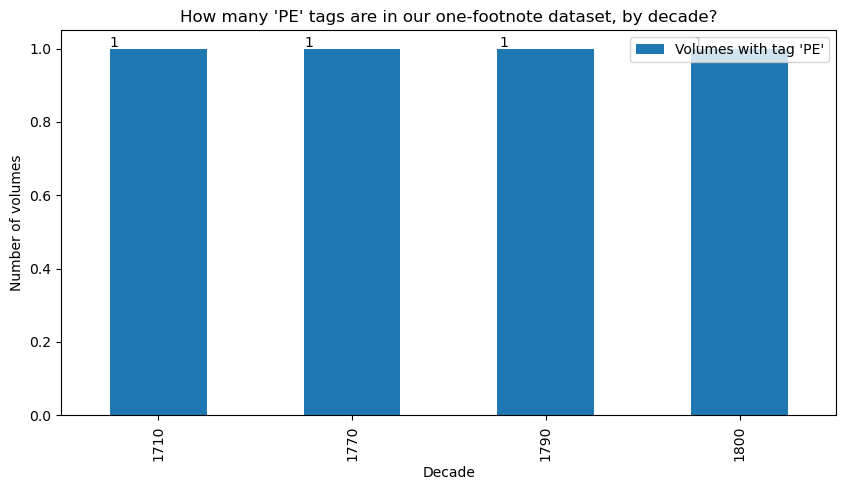

In [394]:
# Let's check how 'PE' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'PE'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'PE' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'PE'"])

### Other

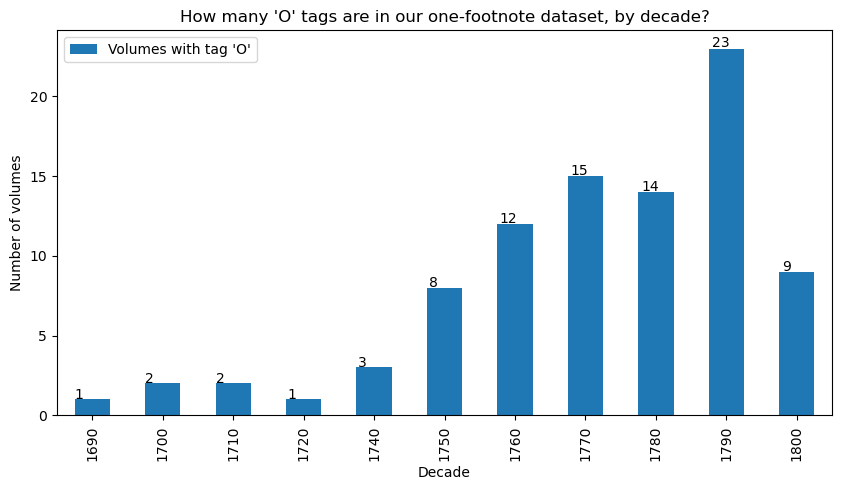

In [395]:
# Let's check how the 'O' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'O'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'O' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'O'"])

### Marginalia

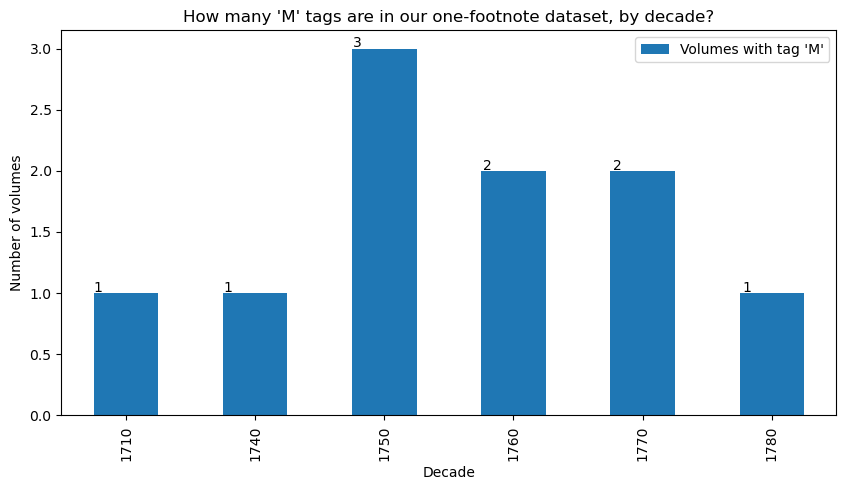

In [396]:
# Let's check how the 'M' tag is distributed in our corpus
ax = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'M'].groupby('decade')[['tag']].count().plot(kind="bar", figsize=(10, 5), title="How many 'M' tags are in our one-footnote dataset, by decade?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Decade")
ax.set_ylabel("Number of volumes")
plt.legend(["Volumes with tag 'M'"])

## Decade-level analysis
### 1750s

In [397]:
volumes_of_1750s = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['decade'] == 1750]

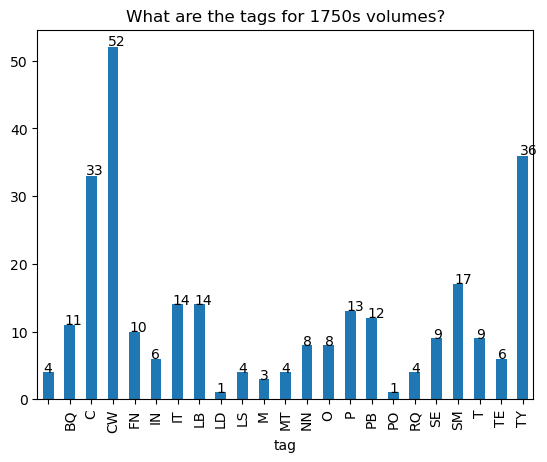

In [398]:
ax = volumes_of_1750s.groupby('tag')['Title'].count().plot(kind='bar', title="What are the tags for 1750s volumes?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### 1760s

In [399]:
volumes_of_1760s = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['decade'] == 1760]

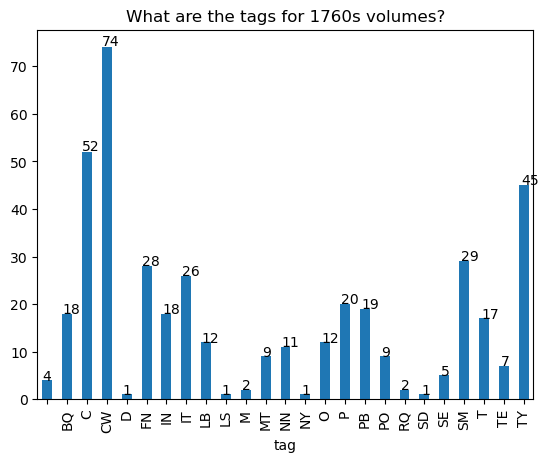

In [400]:
ax = volumes_of_1760s.groupby('tag')['Title'].count().plot(kind='bar', title="What are the tags for 1760s volumes?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### 1770s

In [401]:
volumes_of_1770s = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['decade'] == 1770]

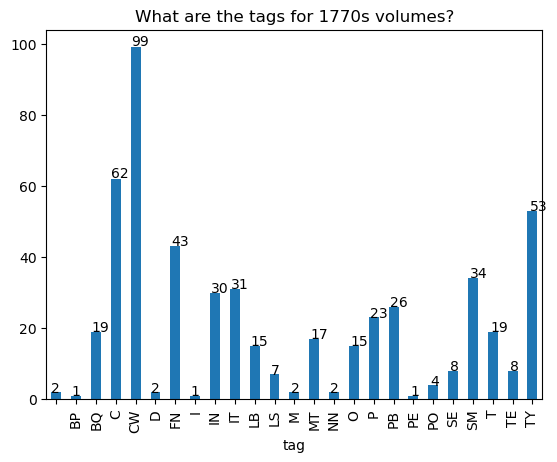

In [402]:
ax = volumes_of_1770s.groupby('tag')['Title'].count().plot(kind='bar', title="What are the tags for 1770s volumes?")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Visualizations of where single footnotes appear in our one-footnote dataset
Where within novels do instances of single footnotes appear? And in the case of multi-volume works, does our dataset contain more instances of footnotes in certain volumes?

### How many volumes in our set have exactly one footnote?

In [403]:
## (We'll need to exclude intsancew where there are 2, 3, 4, or 5 footnotes on a single page)
print('Number of volumes in our one-footnote dataset with exactly one footnote:')
one_footnote_df[one_footnote_df['footnotes_present'] == 1].footnotes_present.count()


Number of volumes in our one-footnote dataset with exactly one footnote:


582

### In what volumes do these footnotes appear?

In [404]:
print('Where do single footnotes appear inv various volumes?')
one_footnote_df[one_footnote_df['footnotes_present'] == 1].Vol_Number.value_counts()

Where do single footnotes appear inv various volumes?


0            231
Volume 2     141
Volume 1     122
Volume 3      35
Volume 4      18
Volume 5      17
Volume 6       7
Volume 7       5
Volume 8       3
Volume 12      1
Volume 22      1
Volume 15      1
Name: Vol_Number, dtype: int64

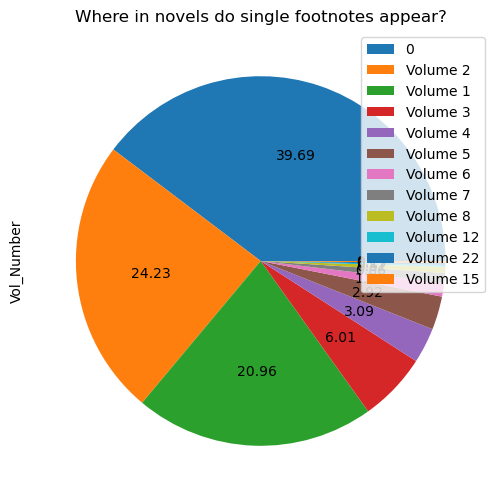

In [405]:
# Turn the table above into a dataframe
vol_dist_df = one_footnote_df[one_footnote_df['footnotes_present'] == 1].Vol_Number.value_counts()
# Plot our single footnotes data as a pie chart
ax = vol_dist_df.plot(kind='pie', autopct='%.2f', labels=None, figsize=(11,6), title="Where in novels do single footnotes appear?")
ax.legend(loc=1, labels=vol_dist_df.index) 


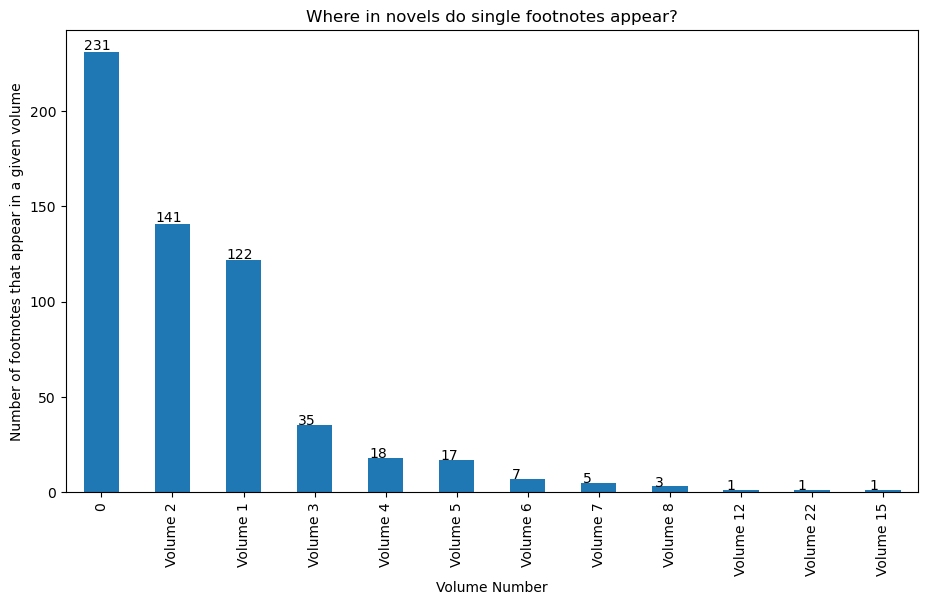

In [406]:
# Plot our single footnotes data as bar chart
ax = vol_dist_df.plot(kind='bar', figsize=(11,6), title="Where in novels do single footnotes appear?")
ax.set_xlabel("Volume Number")
ax.set_ylabel("Number of footnotes that appear in a given volume")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### In what volumes do these footnotes appear? (just multi-volume works)
Let's look at the same dataset, but filter out all the single-volume works, which appear as "0" in our dataset. 

In [407]:
#Let's drop the 0 values
multi_vol_dist_df = vol_dist_df[1:]

In [408]:
print('Where do single footnoes appear inv various volumes?')
multi_vol_dist_df

Where do single footnoes appear inv various volumes?


Volume 2     141
Volume 1     122
Volume 3      35
Volume 4      18
Volume 5      17
Volume 6       7
Volume 7       5
Volume 8       3
Volume 12      1
Volume 22      1
Volume 15      1
Name: Vol_Number, dtype: int64

### Plotting the position of single footnotes in multi-volume works within our one-footnote subset

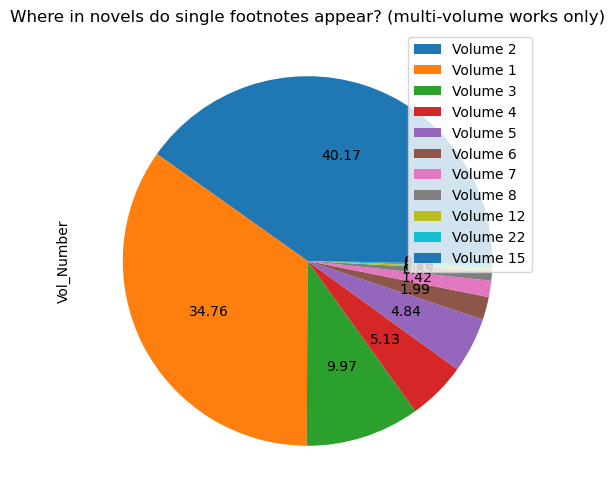

In [409]:
# Plot our single footnotes data as a pie chart
ax = multi_vol_dist_df.plot(kind='pie', autopct='%.2f', labels=None, figsize=(11,6), title="Where in novels do single footnotes appear? (multi-volume works only)")
ax.legend(loc=1, labels=multi_vol_dist_df.index) 


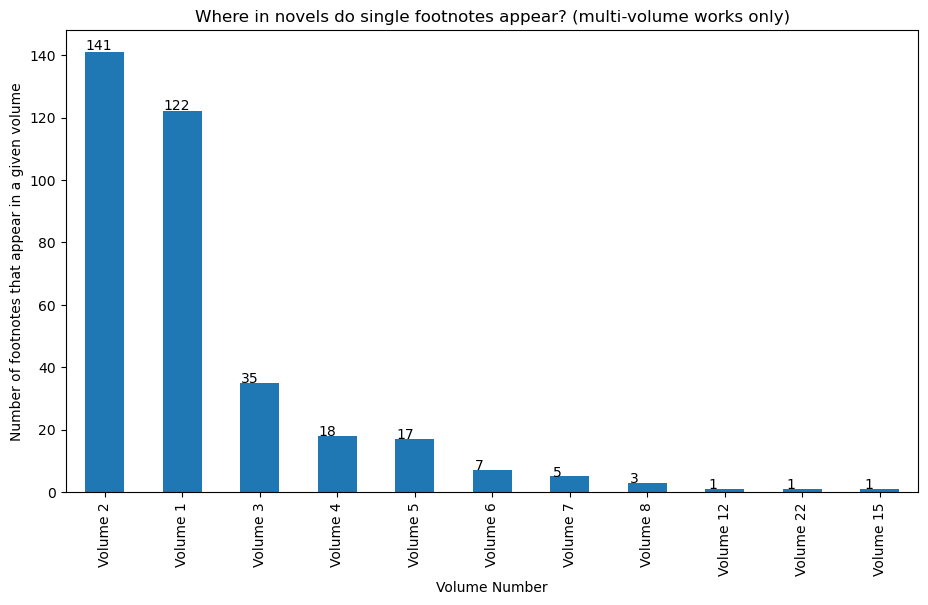

In [410]:
# Plot our single footnotes data as bar chart
ax = multi_vol_dist_df.plot(kind='bar', figsize=(11,6), title="Where in novels do single footnotes appear? (multi-volume works only)")
ax.set_xlabel("Volume Number")
ax.set_ylabel("Number of footnotes that appear in a given volume")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [411]:
# Let's compare these distributions with the general distribution of volumes
# What is the distribution of volumes in our one-footnote corpus that RB and NA have verfied have footnotes present?
print("Distriubtion of volumes in our one-footnote subset with footnotes present")
print ("(includes volumes that RB and NA have verfied DO have footnotes present, '0' = single volume):")
vol_dist_df

Distriubtion of volumes in our one-footnote subset with footnotes present
(includes volumes that RB and NA have verfied DO have footnotes present, '0' = single volume):


0            231
Volume 2     141
Volume 1     122
Volume 3      35
Volume 4      18
Volume 5      17
Volume 6       7
Volume 7       5
Volume 8       3
Volume 12      1
Volume 22      1
Volume 15      1
Name: Vol_Number, dtype: int64

In [412]:
# Now let's compare that to the one-footnote subset as a whole 
# (this includes volumes identified by computer vision as having footnotes that did not in facct have footnotes
print("Distriubtion of volumes in our one-footnote subset")
print("(includes ALL volumes identified by algorithm):")
one_footnote_df.Vol_Number.value_counts()

Distriubtion of volumes in our one-footnote subset
(includes ALL volumes identified by algorithm):


0            537
Volume 2     370
Volume 1     332
Volume 3     124
Volume 4      53
Volume 5      32
Volume 6      11
Volume 7      10
Volume 8       8
Volume 9       3
Volume 12      1
Volume 22      1
Volume 10      1
Volume 15      1
Name: Vol_Number, dtype: int64

In [413]:
print("Distriubtion of volumes in ECCO footnote corpus NOT in one-footnote subset:")
footnotes_df[footnotes_df['fn_pages'] != 1].Vol_Number.value_counts()

Distriubtion of volumes in ECCO footnote corpus NOT in one-footnote subset:


0            3247
Volume 1     1361
Volume 2     1305
Volume 3      489
Volume 4      331
Volume 5      111
Volume 6       78
Volume 7       58
Volume 8       41
Volume 9       17
Volume 10      16
Volume 12      10
Volume 11      10
Volume 14       7
Volume 16       7
Volume 13       6
Volume 17       6
Volume 15       5
Volume 18       5
Volume 19       4
Volume 20       2
Volume 21       2
Volume 23       2
Volume 22       1
Volume 24       1
Name: Vol_Number, dtype: int64

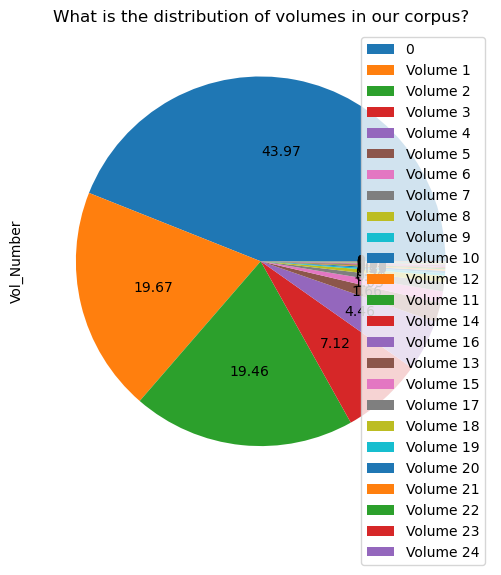

In [414]:

ax = footnotes_df.Vol_Number.value_counts().plot(kind='pie', autopct='%.2f', labels=None, figsize=(11,6), title="What is the distribution of volumes in our corpus?")
ax.legend(loc=1, labels=footnotes_df.Vol_Number.value_counts().index) 

### Statistical comparison of volume distribution in one-footnote subset with footnotes not in one-footnote subset

 Because we don't want to compare the one-footnote subset to the whole footnotes dataframe (which would muck up any attempt to run statistical tests to see if there's evidence of a difference, we're going to compare the distribution of volumes in our one footnote dataset to the corpus as a whole

In [561]:
# Let's make sure mark the absence of footnotes in volumes 9-11, 13, 14, 16-21, 23, 24)
vols_dist_in_one_footnote_corpus_with_footnotes_present = vol_dist_df
vols_dist_in_footnotes_corpus_excluding_one_footnote_subset = footnotes_df[footnotes_df['fn_pages'] != 1].Vol_Number.value_counts()

vols_dist_in_one_footnote_corpus_with_footnotes_present_series = pd.Series(vols_dist_in_one_footnote_corpus_with_footnotes_present)
vols_dist_in_footnotes_corpus_excluding_one_footnote_subset_series = pd.Series(vols_dist_in_footnotes_corpus_excluding_one_footnote_subset)
test_1 = vols_dist_in_one_footnote_corpus_with_footnotes_present

In [562]:
test_1.append(pd.Series(0, index=['Volume 9']))
test_1 = test_1.append(pd.Series(0, index=['Volume 9']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/1437714004.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1.append(pd.Series(0, index=['Volume 9']))
/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/1437714004.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 9']))


In [563]:
test_1 = test_1.append(pd.Series(0, index=['Volume 10']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/2812324794.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 10']))


In [564]:
test_1 = test_1.append(pd.Series(0, index=['Volume 11']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/3196432227.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 11']))


In [565]:
test_1 = test_1.append(pd.Series(0, index=['Volume 13']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/3833397998.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 13']))


In [566]:
test_1 = test_1.append(pd.Series(0, index=['Volume 14']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/2755060057.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 14']))


In [567]:
test_1 = test_1.append(pd.Series(0, index=['Volume 16']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/3855072254.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 16']))


In [568]:
test_1 = test_1.append(pd.Series(0, index=['Volume 17']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/952062530.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 17']))


In [569]:
test_1 = test_1.append(pd.Series(0, index=['Volume 18']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/2656581165.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 18']))


In [570]:
test_1 = test_1.append(pd.Series(0, index=['Volume 19']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/1036213031.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 19']))


In [571]:
test_1 = test_1.append(pd.Series(0, index=['Volume 20']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/1544008085.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 20']))


In [572]:
test_1 = test_1.append(pd.Series(0, index=['Volume 21']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/2714299107.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 21']))


In [573]:
test_1 = test_1.append(pd.Series(0, index=['Volume 23']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/363136250.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 23']))


In [574]:
test_1 = test_1.append(pd.Series(0, index=['Volume 24']))

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/280527973.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_1 = test_1.append(pd.Series(0, index=['Volume 24']))


In [575]:
vols_dist_in_one_footnote_corpus_with_footnotes_present = test_1

#### ANOVA (Analysis of Variance)
The standard threshold for confidence in variance is a p-value of < 0.05 

If the p-value:
- P-value <0.001: Strong certainty in the result
-    P-value <0.05:  Moderate certainty in the result
-    P-value <0.1: Weak certainty in the result
-    P-value > 0.1: No certainty in the result

In [11]:
#f_val, p_val = stats.f_oneway(vols_dist_in_one_footnote_corpus_with_footnotes_present, vols_dist_in_footnotes_corpus_excluding_one_footnote_subset)
#print("One-way ANOVA test comparing one-footnote subset with ECCO footnotes corpus")
#print("p-value:", p_val)

### What this means: 
We have *weak* statistical evidence. If we set our standard of significance at 5%, this would fall below statistical significance. If we set level of significance at 10%, then this *would* be statistically significant.

### Let's run some other tests:
#### T-Test
This is just another way of running the t-test (which the ANOVA test is a version of). Again,  standard threshold for difference is 0.05.

In [284]:
stats.ttest_ind(vols_dist_in_footnotes_corpus_excluding_one_footnote_subset, vols_dist_in_one_footnote_corpus_with_footnotes_present)

Ttest_indResult(statistic=1.1260904278537194, pvalue=0.2677895775992684)

#### Pearson's Test
If  the correltation coefficient is close to +1: Large Positive relationship,  close to -1: Large Negative relationship is close to 0: No relationship.

In [577]:
vols_dist_in_footnotes_corpus_excluding_one_footnote_subset = footnotes_df[footnotes_df['fn_pages'] != 1].Vol_Number.value_counts()
#vols_dist_in_one_footnote_corpus_with_footnotes_present = vol_dist_df 

In [578]:
print("Correlation coefficient and p-value comparing one-footnote subset with ECCO footnotes corpus:")
stats.pearsonr(vols_dist_in_footnotes_corpus_excluding_one_footnote_subset, vols_dist_in_one_footnote_corpus_with_footnotes_present)

Correlation coefficient and p-value comparing one-footnote subset with ECCO footnotes corpus:


PearsonRResult(statistic=0.9853346738182929, pvalue=3.628243739690664e-19)

#### Chi-Squared

In [298]:
vols_dist_in_one_footnote_corpus_with_footnotes_present_series = pd.Series(vols_dist_in_one_footnote_corpus_with_footnotes_present)
vols_dist_in_footnotes_corpus_excluding_one_footnote_subset_series = pd.Series(vols_dist_in_footnotes_corpus_excluding_one_footnote_subset)

In [300]:
array1 = np.array([vols_dist_in_one_footnote_corpus_with_footnotes_present_series]) 
array2 = np.array([vols_dist_in_footnotes_corpus_excluding_one_footnote_subset_series])
final_array = np.concatenate((array1, array2))

print(final_array)

[[ 231  141  122   35   18   17    7    5    3    1    1    1    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [3247 1361 1305  489  331  111   78   58   41   17   16   10   10    7
     7    6    6    5    5    4    2    2    2    1    1]]


In [301]:

chi2, p, dof, expected = chi2_contingency(final_array)

In [302]:
print("Chi2 Test for volumes distribution in general footnotes corpus and one-footnote subset")
print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

Chi2 Test for volumes distribution in general footnotes corpus and one-footnote subset
chi2 statistic:     27.906
p-value:            0.26405
degrees of freedom: 24
expected frequencies:
[[2.62746106e+02 1.13468847e+02 1.07802960e+02 3.95856698e+01
  2.63652648e+01 9.66978193e+00 6.42133956e+00 4.75934579e+00
  3.32398754e+00 1.35981308e+00 1.28426791e+00 8.30996885e-01
  7.55451713e-01 5.28816199e-01 5.28816199e-01 4.53271028e-01
  4.53271028e-01 3.77725857e-01 3.77725857e-01 3.02180685e-01
  1.51090343e-01 1.51090343e-01 1.51090343e-01 7.55451713e-02
  7.55451713e-02]
 [3.21525389e+03 1.38853115e+03 1.31919704e+03 4.84414330e+02
  3.22634735e+02 1.18330218e+02 7.85786604e+01 5.82406542e+01
  4.06760125e+01 1.66401869e+01 1.57157321e+01 1.01690031e+01
  9.24454829e+00 6.47118380e+00 6.47118380e+00 5.54672897e+00
  5.54672897e+00 4.62227414e+00 4.62227414e+00 3.69781931e+00
  1.84890966e+00 1.84890966e+00 1.84890966e+00 9.24454829e-01
  9.24454829e-01]]


In [303]:
one_footnote_present = one_footnote_df[one_footnote_df['footnotes_present'] == 1]

In [304]:
one_footnote_present[one_footnote_present['Vol_Number'] == 'Volume 2']

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
10           476  0000500202.xml      500202  T131172  1765   
13           483  0000500702.xml      500702  T131197  1759   
25           524  0000900502.xml      900502  T129718  1794   
30           543  0001100402.xml     1100402  T100068  1769   
34           564  0001300602.xml     1300602  T098006  1767   
49           634  0005300302.xml     5300302  T072280  1753   
53           645  0005400502.xml     5400502  T092965  1762   
56           658  0005500302.xml     5500302  T129707  1792   
69          5118  0006001102.xml     6001102  T093334  1795   
79           778  0006500102.xml     6500102  T138418  1797   
88          5123  0008900202.xml     8900202  T097240  1735   
109          948  0012400202.xml    12400202  T057349  1761   
110          950  0012400302.xml    12400302  T066389  1787   
118          972  0012600302.xml    12600302  T070705  1800   
130         1041  0013200202.xml    13200202  T107742  1790   
133         1054  0013300202.xml    13300202  T064750  1784   
146         1125  0013800602.xml    13800602  T129736  1773   
159         1187  0016400402.xml    16400402  T055340  1799   
163         1233  0016700602.xml    16700602  T066370  1775   
173         1265  0017000302.xml    17000302  T064733  1789   
186         1335  0018600502.xml    18600502  T114124  1773   
187         1338  0018700102.xml    18700102  T070729  1793   
191         1348  0018700502.xml    18700502  T014778  1770   
195         1383  0019100302.xml    19100302  T073514  1785   
223         5151  0020000402.xml    20000402  T064188  1785   
232         1485  0020300402.xml    20300402  T131171  1788   
241         1523  0020600302.xml    20600302  T055310  1769   
251         1566  0020900402.xml    20900402  T066911  1756   
269         1658  0022300102.xml    22300102  T068746  1771   
273         1688  0022600102.xml    22600102  T014825  1779   
296         1800  0023500102.xml    23500102  T014766  1768   
303         1825  0023700302.xml    23700302  T057451  1793   
305         1828  0023700402.xml    23700402  T057438  1778   
307         1844  0023800402.xml    23800402  T057351  1769   
313         1882  0024100602.xml    24100602  T108371  1789   
317         1905  0024300402.xml    24300402  T070712  1769   
319         5158  0026900202.xml    26900202  T107041  1782   
328         1955  0027600602.xml    27600602  T094266  1799   
337         1993  0028000202.xml    28000202  T014812  1760   
340         2005  0028400402.xml    28400402  T066366  1767   
345         2015  0028500302.xml    28500302  T089903  1780   
361         2075  0029000602.xml    29000602  T089897  1795   
364         2106  0032600102.xml    32600102  T080601  1772   
377         2160  0033000402.xml    33000402  T064911  1796   
378         2166  0033100202.xml    33100202  T090856  1795   
389         2207  0033400502.xml    33400502  T067640  1765   
399         2236  0036500302.xml    36500302  T094332  1799   
402         2240  0036500402.xml    36500402  T068056  1750   
408         2260  0036700502.xml    36700502  T108636  1794   
413         2283  0037000302.xml    37000302  T062265  1765   
426         2322  0049600302.xml    49600302  T055331  1781   
432         2382  0055500302.xml    55500302  T094635  1768   
440         2422  0073300202.xml    73300202  T072290  1790   
444           28  0098900302.xml    98900302  N000718  1737   
447         8529  0147502802.xml   147502802  N014289  1798   
456           66  0237100902.xml   237100902  T100449  1776   
460         5204  0244900602.xml   244900602  T106165  1788   
463           73  0248600602.xml   248600602  N001522  1786   
472         5235  0272700202.xml   272700202  T010033  1781   
481         8424  0298100202.xml   298100202  T163094  1794   
489         5289  0326900902.xml   326900902  T134536  1775   
490         5290  0327000102.xml   327000102  T122381  1764   
500         5348  0335900702.xml   33

## Footnote positions in END data
Data source: The 2018 END dataset paratext data: https://github.com/earlynovels/end-dataset/blob/master/end-dataset-master-11282018/11282018-full-paratexts.tsv 

In [579]:
# Import the tsv file
END_footnotes_data = pd.read_csv('../11282018-full-paratexts.txt',  sep='\t')

In [580]:
END_footnotes_data['type'].value_counts()

['Footnotes']                                                                    271
['Preface']                                                                      244
['Table of contents']                                                            213
['Errata']                                                                       124
['Dedication']                                                                   114
['Advertisement']                                                                 83
['Introduction']                                                                  69
['Footnote']                                                                      67
['To the Reader']                                                                 55
['Note']                                                                          52
['Colophon']                                                                      51
['Poem']                                                         

In [581]:
#Filter to include just footnote paratexts
END_footnotes_data_just_footnotes = END_footnotes_data[END_footnotes_data['type'].str.contains('Foot').fillna(False)]

### Where are footnotes positioned within volumes?

In [582]:
print("Location of footnotes within END volumes:")
END_footnotes_data_just_footnotes.position.value_counts()

Location of footnotes within END volumes:


['Middle']                                                                              301
['Front']                                                                                15
['Back']                                                                                  9
['Front', 'Middle']                                                                       8
['Front', 'Middle', 'Back']                                                               2
['Middle, page 92']                                                                       1
['Middle', 'Some provide commentary on narrative; others seem to be indexing tools']      1
['Middle', 'Back']                                                                        1
Name: position, dtype: int64

#### What does "Middle" mean for END catalogers?

In [583]:
END_footnotes_data_just_footnotes.notes.value_counts()

['pp. 24, 65,']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### Extracting the numerical data from these END catalog notes

In [584]:
# Extract just the 1-3 digit numbers 
# NOTE: this method will also end up catching *VOLUME NUMBERS* (e.g. the "2" in "v.2") 
#  see later section on plotting for how we handle the 76 instances of volume numbers
END_footnotes_data_just_footnotes.notes.str.findall(r'[0-9]{1,3}')
END_footnotes_data_just_digits = END_footnotes_data_just_footnotes.notes.str.findall(r'[0-9]{1,3}')

In [585]:
# Let's look at just the roman numerals in the page numbers 
# NOTE: we'll also expect to see 'v's" from the volume markers
# see later section on how why the "v's" are removed
END_footnotes_data_just_footnotes.notes.str.findall(r'(?i)\b(?=[ivxlcdm]+)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})\b')

230                                                                                                      []
240                                                                                                      []
285                                                                                                      []
301                                                                                                      []
312                                                                                                    [, ]
319                                                                                                      []
339                                                                                                  [, , ]
348                                                                                                      []
370                                                                                                      []
390                         

In [586]:
END_footnotes_data_just_roman_numerals = END_footnotes_data_just_footnotes.notes.str.findall(r'(?i)\b(?=[ivxlcdm]+)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})\b')

In [587]:
END_footnotes_data_just_digits

230                                                                                                    [64]
240                                                                                                      []
285                                                                                                    [61]
301                                                                                                      []
312                                                                                                      []
319                                                                                                      []
339                                                                                                      []
348                                                                                                      []
370                                                                                                     [3]
390                         

In [588]:
END_footnotes_data_just_digits.to_csv('END_footnotes_data_just_digits.csv')

In [589]:
END_footnotes_data_just_digits_cleaned = pd.read_csv('END_footnotes_data_just_digits-cleaned.csv', encoding='utf-8')

In [590]:
END_footnotes_data_just_digits_cleaned['notes'] = END_footnotes_data_just_digits_cleaned.notes.dropna()

In [591]:
END_footnotes_data_just_digits_cleaned['notes'] = END_footnotes_data_just_digits_cleaned.notes.dropna().astype(int)

In [592]:
END_footnotes_data_just_digits_cleaned = END_footnotes_data_just_digits_cleaned.dropna()

In [593]:
END_footnotes_data_just_digits_cleaned['notes'] = END_footnotes_data_just_digits_cleaned['notes'].astype(int)

In [594]:
END_footnotes_data_just_digits_cleaned

Column  notes
0        230     64
2        285     61
8        370      3
14       524    243
15       579      3
...      ...    ...
2678    1656     67
2679    1656    105
2680    1656    127
2681    1656    195
2683    1658    434

[2599 rows x 2 columns]

In [595]:
# Import in file cleaned in open refine to r# Import in file cleaned in open refine to remove uppercase roman numerals (volume numbers) and extra characters
END_footnotes_data_just_roman_numerals.to_csv('END_footnotes_data_roman_numerals.csv')

In [596]:
END_footnotes_data_just_roman_numerals_cleaned = pd.read_csv('END_footnotes_data_roman_numerals-cleaned.csv', encoding='utf-8')

In [597]:
END_footnotes_data_just_roman_numerals_cleaned = END_footnotes_data_just_roman_numerals_cleaned.dropna()

In [598]:
# Notice how 'v' is much higher–– this is likely due to END catalogers writing "v.1" or v2" 
END_footnotes_data_just_roman_numerals_cleaned['notes'].value_counts().head(5)

v      83
vii     6
iv      5
xi      5
vi      4
Name: notes, dtype: int64

In [599]:
# Dropping the "v's" from our roman numerals data, since the majority of these refer to VOLUME not page numbers
END_footnotes_data_just_roman_numerals_cleaned = END_footnotes_data_just_roman_numerals_cleaned[END_footnotes_data_just_roman_numerals_cleaned['notes'] != 'v']

In [600]:
END_footnotes_data_just_digits_cleaned.notes.dtype

dtype('int64')

In [601]:
END_footnotes_data_just_roman_numerals_cleaned.head()

Column notes
0     585   vii
1     585   xii
2     587    iv
4     587    xi
5     587   xii

In [602]:
END_footnotes_data_all_page_numbers_cleaned = END_footnotes_data_just_digits_cleaned.append(END_footnotes_data_just_roman_numerals_cleaned)

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_81952/417160157.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  END_footnotes_data_all_page_numbers_cleaned = END_footnotes_data_just_digits_cleaned.append(END_footnotes_data_just_roman_numerals_cleaned)


In [603]:
END_footnotes_data_all_page_numbers_cleaned

Column notes
0       230    64
2       285    61
8       370     3
14      524   243
15      579     3
..      ...   ...
154    1627    xi
155    1627   xiv
156    1657   vii
157    1657    ix
158    1657    xi

[2675 rows x 2 columns]

### Locations of footnotes within END volumes

In [604]:
print("Page Number, count")
END_footnotes_data_all_page_numbers_cleaned.notes.value_counts()

Page Number, count


2         54
1         50
3         39
8         33
5         31
4         29
9         28
7         22
49        17
178       16
65        15
22        15
153       15
72        15
126       15
137       15
148       14
70        14
145       13
57        13
15        13
61        13
189       13
37        13
11        13
6         13
35        12
214       12
56        12
44        12
54        12
113       12
50        12
142       12
129       12
182       12
28        12
185       12
24        12
164       12
20        12
59        12
43        11
79        11
30        11
216       11
67        11
92        11
130       11
86        11
218       11
85        11
232       11
21        11
173       11
128       11
90        11
10        11
23        11
127       10
209       10
225       10
235       10
12        10
69        10
217       10
211       10
186       10
19        10
76        10
81        10
166       10
177       10
75        10
207       10
194        9
183        9

### Top 25 locations for footnotes in END volumes 

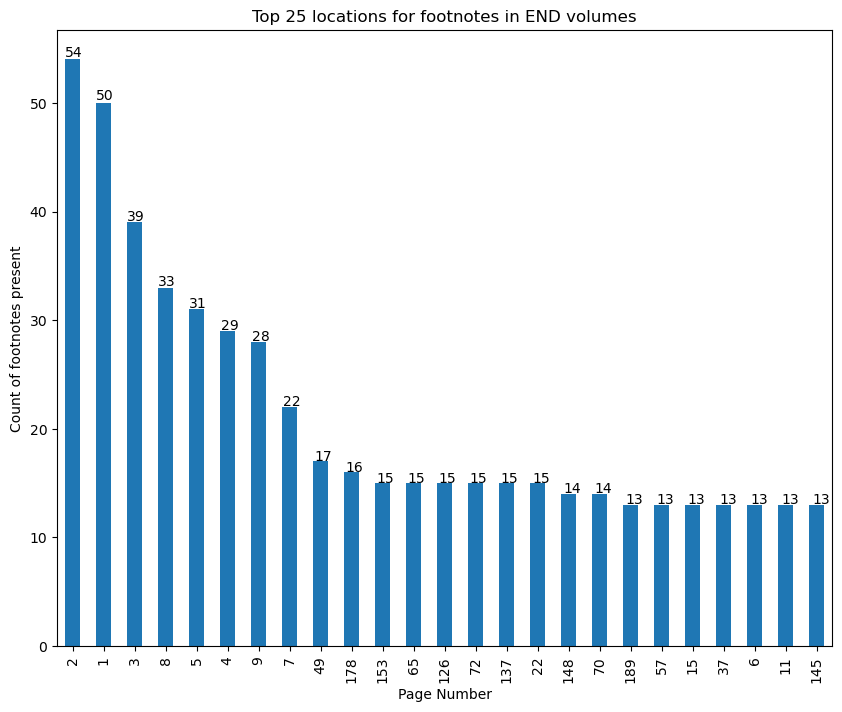

In [605]:
ax = END_footnotes_data_just_digits_cleaned.notes.value_counts().head(25).plot(kind='bar', title ='Top 25 locations for footnotes in END volumes', figsize=(10,8))
ax.set_xlabel("Page Number")
ax.set_ylabel("Count of footnotes present")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [606]:
print("Top 25 locations for footnotes in END volumes")
print("")
print("Page Number, count")
END_footnotes_data_all_page_numbers_cleaned.notes.value_counts().head(25)

Top 25 locations for footnotes in END volumes

Page Number, count


2      54
1      50
3      39
8      33
5      31
4      29
9      28
7      22
49     17
178    16
65     15
22     15
153    15
72     15
126    15
137    15
148    14
70     14
145    13
57     13
15     13
61     13
189    13
37     13
11     13
Name: notes, dtype: int64

In [607]:
# It looks like the first 10 pages have higher amounts of recorded footnotes-–let's confirm this 
# Let's create a new data column binning our footnote data into 10-page chunks and catch-all categories for volumes with 300+pages
page_number_categories = []
for page_number in END_footnotes_data_all_page_numbers_cleaned['notes']:
    if type(page_number) == int:
        if 0 < page_number < 10:
             page_number_categories.append("001s")
        elif 20 > page_number >= 10:
            page_number_categories.append("010s")
        elif 30 > page_number >= 20:
            page_number_categories.append("020s")
        elif 40 > page_number >= 30:
            page_number_categories.append("030s")
        elif 50 > page_number >= 40:
            page_number_categories.append("040s")
        elif 60 > page_number >= 50:
            page_number_categories.append("050s")
        elif 70 > page_number >= 60:
            page_number_categories.append("060s")
        elif 80 > page_number >= 70: 
            page_number_categories.append("070s")
        elif 90 > page_number >= 80:
            page_number_categories.append("080s")
        elif 100 > page_number >= 90:
            page_number_categories.append("090s")
        elif 110 > page_number >= 100:
            page_number_categories.append("100s")
        elif 120 > page_number >= 110:
             page_number_categories.append("110s")
        elif 130 > page_number >= 120:
            page_number_categories.append("120s")
        elif 140 > page_number >= 130:
            page_number_categories.append("130s")
        elif 150 > page_number >= 140:
            page_number_categories.append("140s")
        elif 160 > page_number >= 150:
            page_number_categories.append("150s")
        elif 170 > page_number >= 160:
            page_number_categories.append("160s")
        elif 180 > page_number >= 170: 
            page_number_categories.append("170s")
        elif 190 > page_number >= 180:
            page_number_categories.append("180s")
        elif 200 > page_number >= 190:
            page_number_categories.append("190s")
        elif 210 > page_number >= 200:
            page_number_categories.append("200s")
        elif 220 > page_number >= 210:
            page_number_categories.append("210s")
        elif 230 > page_number >= 220:
            page_number_categories.append("220s")
        elif 240 > page_number >= 230:
            page_number_categories.append("230s")
        elif 250 > page_number >= 240:
            page_number_categories.append("240s")
        elif 260 > page_number >= 250:
            page_number_categories.append("250s")
        elif 270 > page_number >= 260:
            page_number_categories.append("260s")
        elif 280 > page_number >= 270: 
            page_number_categories.append("270s")
        elif 290 > page_number >= 280:
            page_number_categories.append("280s")
        elif 300 > page_number >= 290:
            page_number_categories.append("290s")
        elif 310 > page_number >= 300:
            page_number_categories.append("300s")
        elif 320 > page_number >= 310:
            page_number_categories.append("310s")
        elif 330 > page_number >= 320:
            page_number_categories.append("320s")
        elif 340 > page_number >= 330:
            page_number_categories.append("330s")
        elif 350 > page_number >= 340:
            page_number_categories.append("340s")
        elif 360 > page_number >= 350:
            page_number_categories.append("350s")
        elif 370 > page_number >= 360:
            page_number_categories.append("360s")
        elif 380 > page_number >= 370: 
            page_number_categories.append("370s")
        elif 390 > page_number >= 380:
            page_number_categories.append("380s")
        elif 400 > page_number >= 390:
            page_number_categories.append("390s")
        elif 500 > page_number >= 400:
            page_number_categories.append("400s")
        elif 600 > page_number >= 500:
            page_number_categories.append("500s")
        elif page_number >= 600:
            page_number_categories.append("600s+")
    else:
        page_number_categories.append("000-Frontmatter")

In [608]:
END_footnotes_data_all_page_numbers_cleaned['page_number_categories'] = page_number_categories

### Plotting locations for footnotes in END volumes, binning by 10

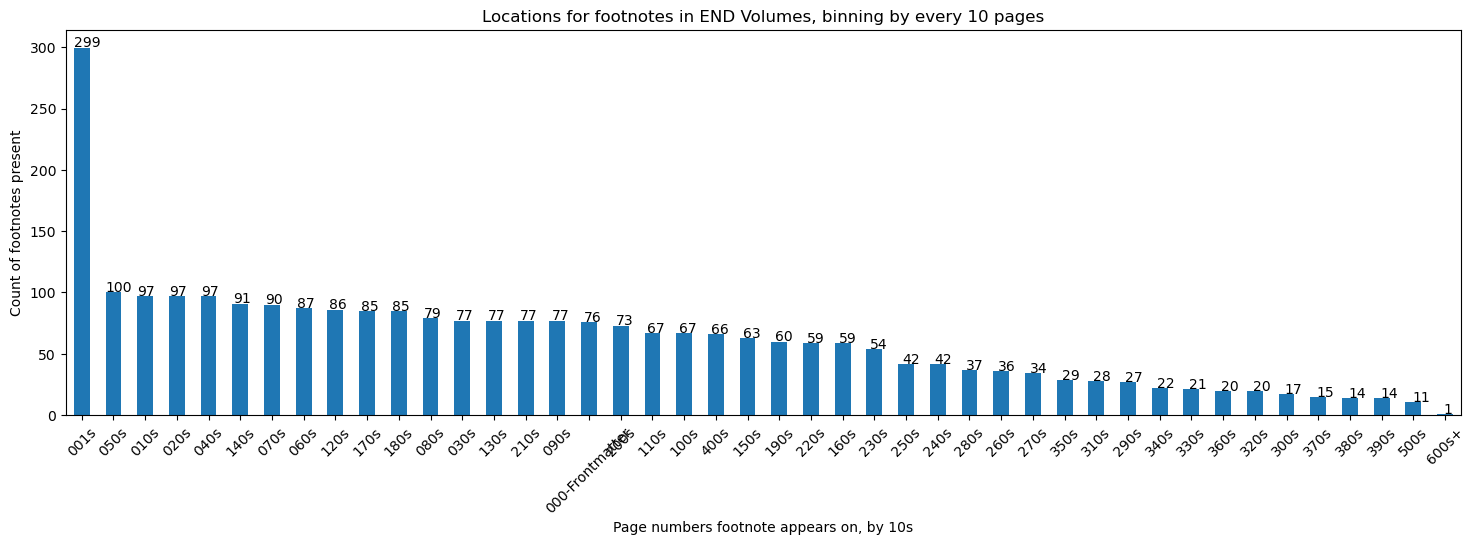

In [609]:
ax = END_footnotes_data_all_page_numbers_cleaned.page_number_categories.value_counts()\
.plot(kind='bar', rot=45, figsize=(18,5), title="Locations for footnotes in END Volumes, binning by every 10 pages")
ax.set_xlabel("Page numbers footnote appears on, by 10s")
ax.set_ylabel("Count of footnotes present")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**NOTES ON THE ABOVE CHART:** The above numbers need to be qualified somewhat: 76 of the page numbers that appear to be in the "1s" category are the product of volume numbers in the cataloger notes -- eg "v.3" (see [full text of cataloger notes here](#What-does-"Middle"-mean-for-END-catalogers?)). 

This would mean there are **223** (not 299) **footnotes that appear in pages 1-10**.

Even so, if we include the number of footnotes that appear on pages paginated with Roman numerals (appearing in the prefatory matter), that would be **299 footnotes that appear in the first ten pages and in the prefatory material of the novel**, three times the amount that appear in any other 10 page chunk of the text.

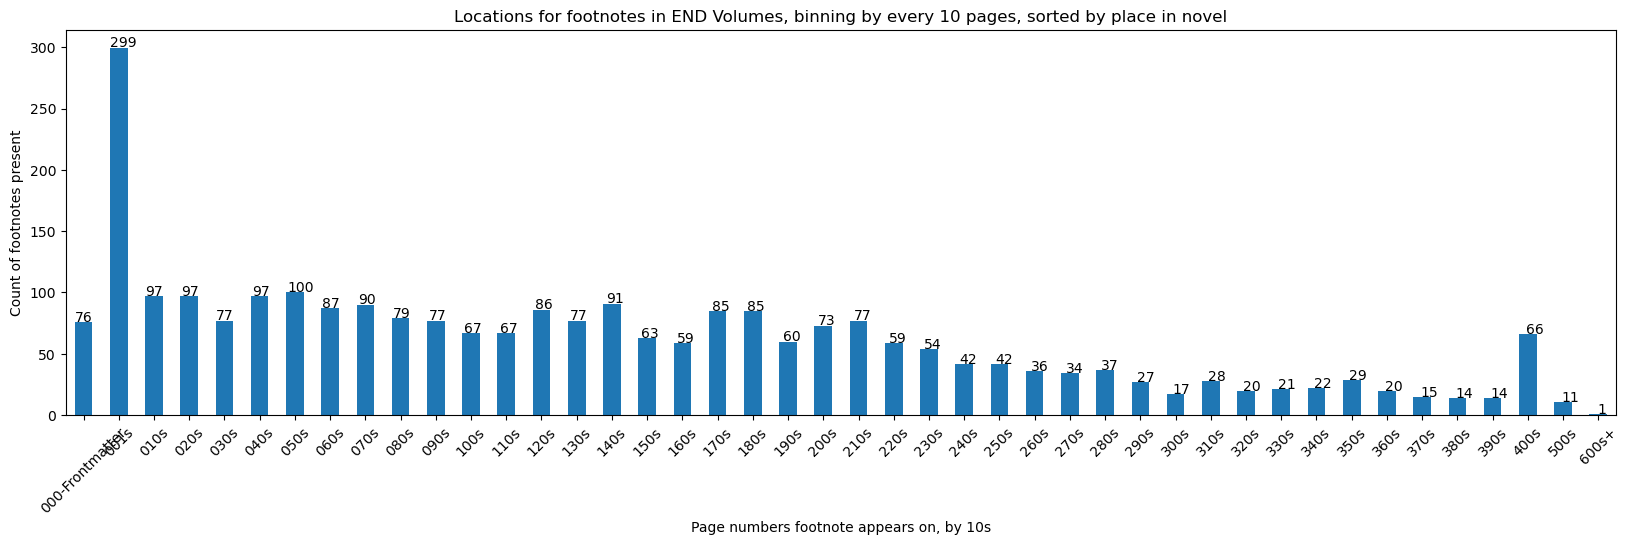

In [610]:
ax = END_footnotes_data_all_page_numbers_cleaned.page_number_categories.value_counts().sort_index()\
.plot(kind='bar', rot=45, figsize=(20,5), title="Locations for footnotes in END Volumes, binning by every 10 pages, sorted by place in novel")
ax.set_xlabel("Page numbers footnote appears on, by 10s")
ax.set_ylabel("Count of footnotes present")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))